In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from dateutil.relativedelta import relativedelta, MO
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.ar_model import AutoReg

In [2]:
!pip install statsmodels --upgrade

In [3]:
# Loading data    
data=pd.read_csv("train.csv",parse_dates=True)

In [4]:
# Data display
data

date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

[913000 rows x 4 columns]

In [5]:
#Checking null values

data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [6]:
#Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
#Store unique values

data['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [8]:
#item unique values

data['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [9]:
#Daily dates

day_wise=data.date.apply(lambda x: str(x)[:])
day_wise

0         2013-01-01
1         2013-01-02
2         2013-01-03
3         2013-01-04
4         2013-01-05
             ...    
912995    2017-12-27
912996    2017-12-28
912997    2017-12-29
912998    2017-12-30
912999    2017-12-31
Name: date, Length: 913000, dtype: object

In [10]:
#Monthly dates

monthly_dates=data.date.apply(lambda y: str(y)[:-3])
monthly_dates

0         2013-01
1         2013-01
2         2013-01
3         2013-01
4         2013-01
           ...   
912995    2017-12
912996    2017-12
912997    2017-12
912998    2017-12
912999    2017-12
Name: date, Length: 913000, dtype: object

In [11]:
#Yearly dates

yearly_dates=data.date.apply(lambda z: str(z)[:-6])
yearly_dates

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
912995    2017
912996    2017
912997    2017
912998    2017
912999    2017
Name: date, Length: 913000, dtype: object

In [12]:
#Function to group sales with date and store
def date_store_sales(df,time=["daily","monthly","yearly"]):
    df=df.copy()
    if time=="daily":
        df.date==df.date.apply(lambda x: str(x)[:])
    elif time=="monthly":
        df.date=df.date.apply(lambda y: str(y)[:-3])
    else:
        df.date=df.date.apply(lambda z: str(z)[:-6])
 
    df=df.groupby(["date","store"])['sales'].sum().reset_index()
 
    return df

In [13]:
#Daily sales
df_day=date_store_sales(data,"daily")
df_day


date  store  sales
0      2013-01-01      1   1316
1      2013-01-01      2   1742
2      2013-01-01      3   1588
3      2013-01-01      4   1423
4      2013-01-01      5   1032
...           ...    ...    ...
18255  2017-12-31      6   2009
18256  2017-12-31      7   1831
18257  2017-12-31      8   3205
18258  2017-12-31      9   2774
18259  2017-12-31     10   2939

[18260 rows x 3 columns]

In [14]:
#Daily sales
df_day=date_store_sales(data,"daily")
df_day


date  store  sales
0      2013-01-01      1   1316
1      2013-01-01      2   1742
2      2013-01-01      3   1588
3      2013-01-01      4   1423
4      2013-01-01      5   1032
...           ...    ...    ...
18255  2017-12-31      6   2009
18256  2017-12-31      7   1831
18257  2017-12-31      8   3205
18258  2017-12-31      9   2774
18259  2017-12-31     10   2939

[18260 rows x 3 columns]

In [15]:
df_month=date_store_sales(data,"monthly")
df_month

date  store  sales
0    2013-01      1  41077
1    2013-01      2  58520
2    2013-01      3  51972
3    2013-01      4  47720
4    2013-01      5  34405
..       ...    ...    ...
595  2017-12      6  52496
596  2017-12      7  48245
597  2017-12      8  85376
598  2017-12      9  73267
599  2017-12     10  77850

[600 rows x 3 columns]

In [16]:
df_year=date_store_sales(data,"yearly")
df_year.head()


date  store    sales
0  2013      1   717840
1  2013      2  1020238
2  2013      3   903936
3  2013      4   835059
4  2013      5   603783

Text(0.5, 1.0, 'Daily Sales Data of Each Store')

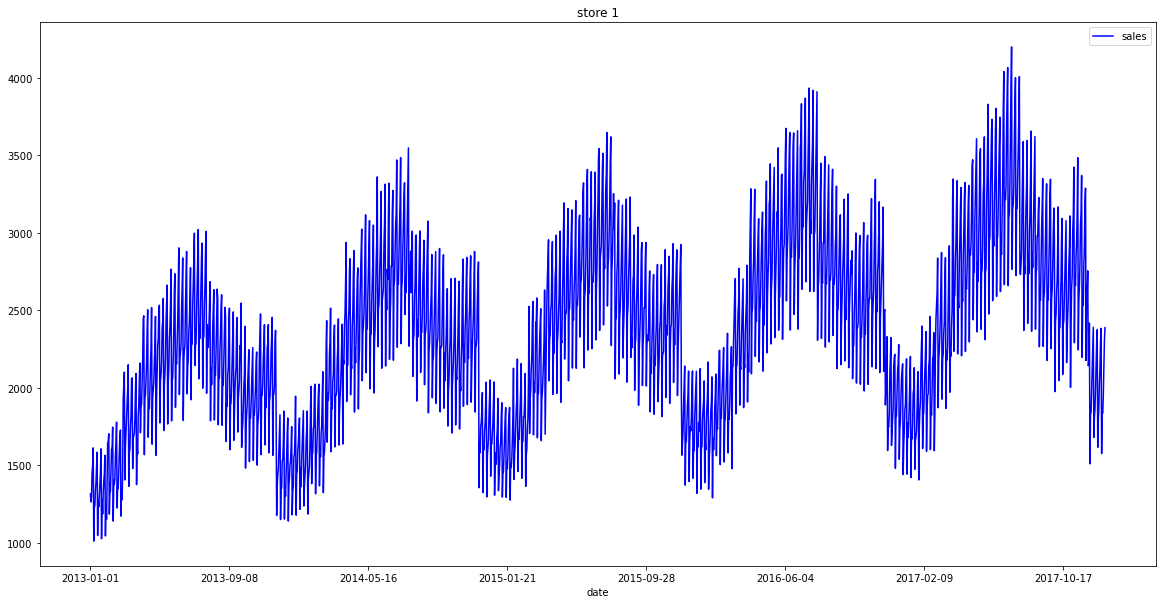

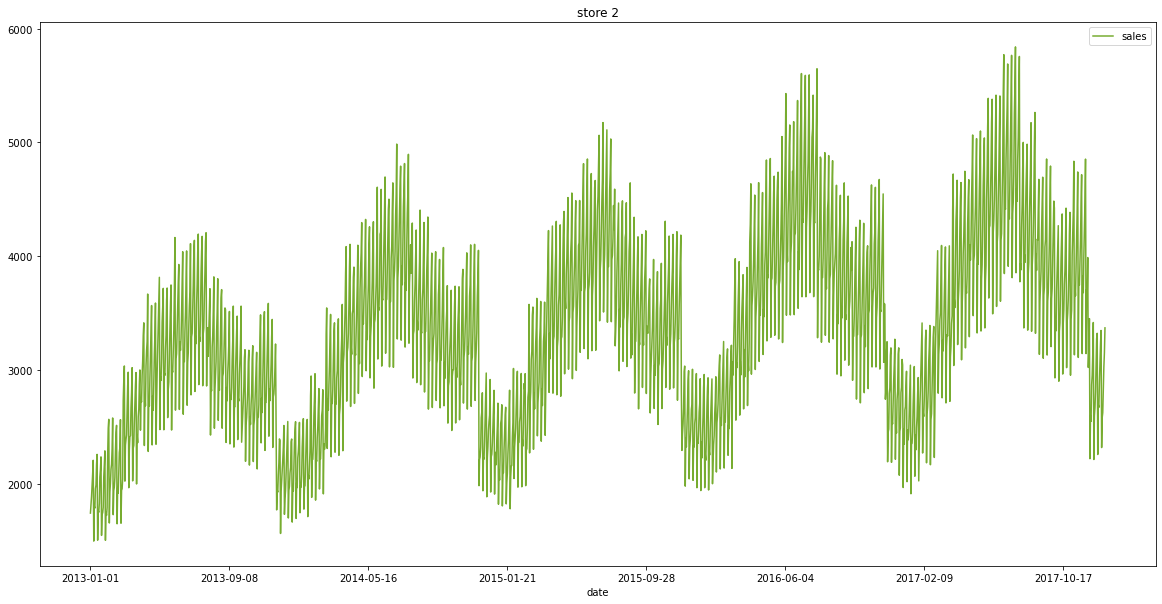

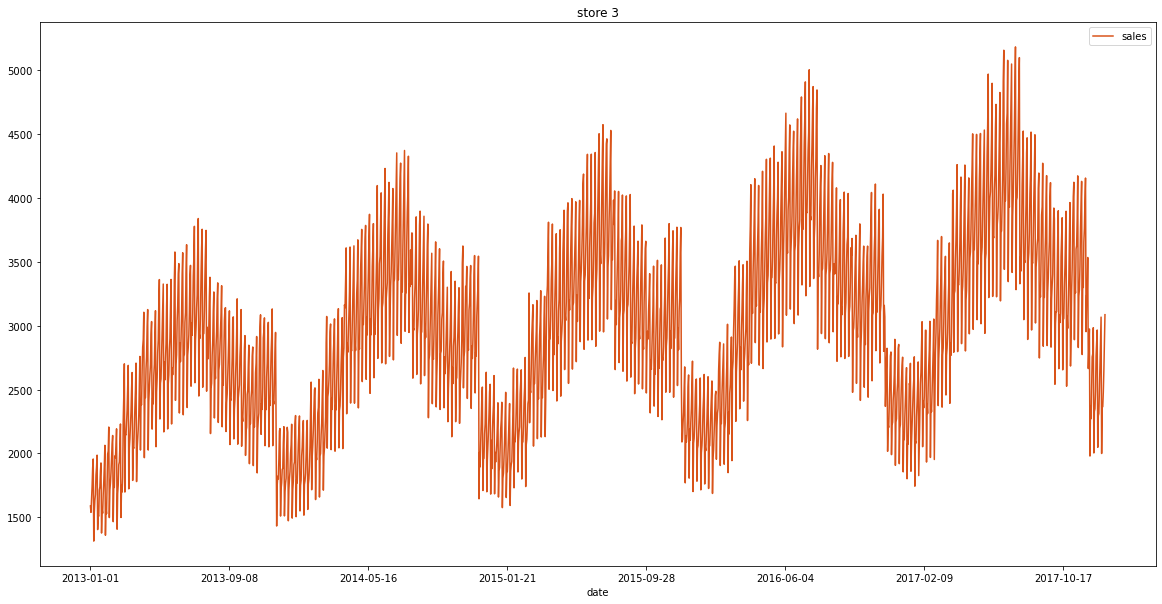

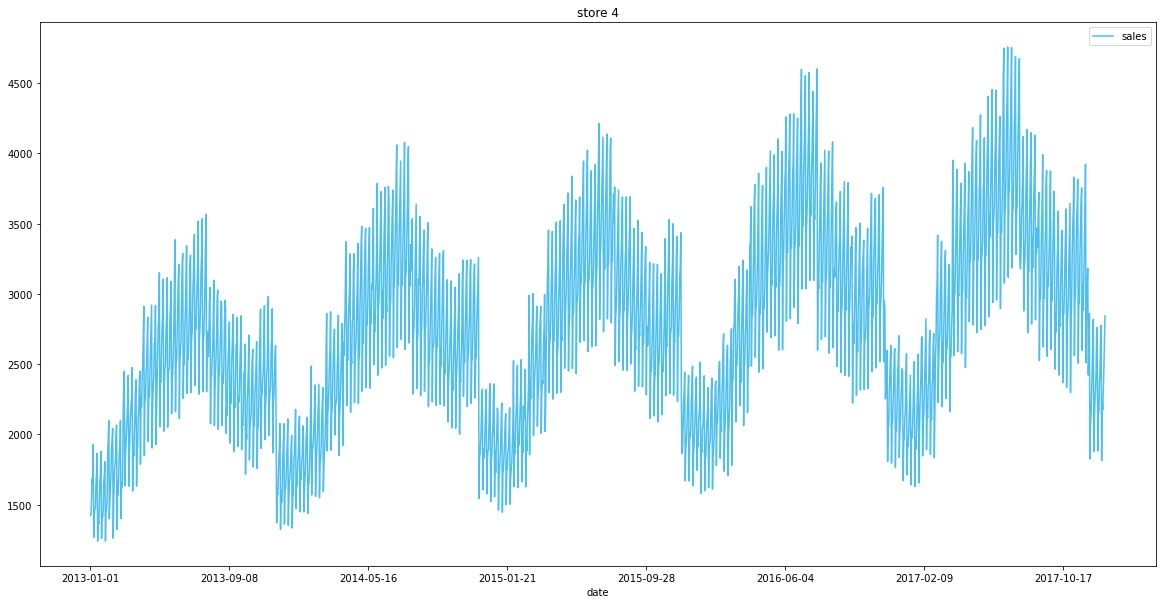

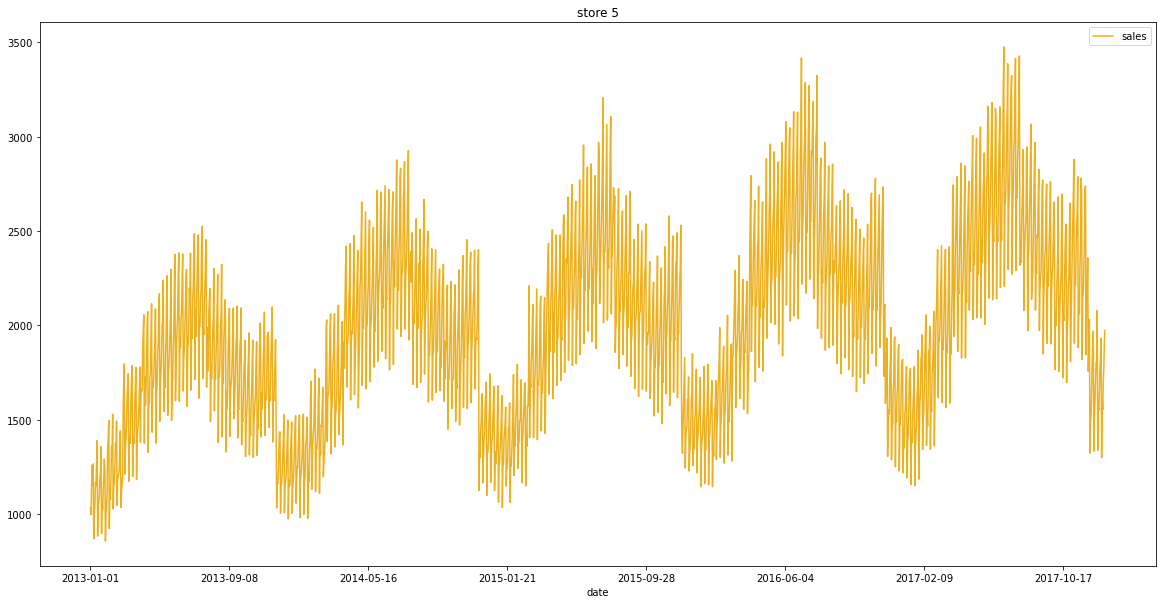

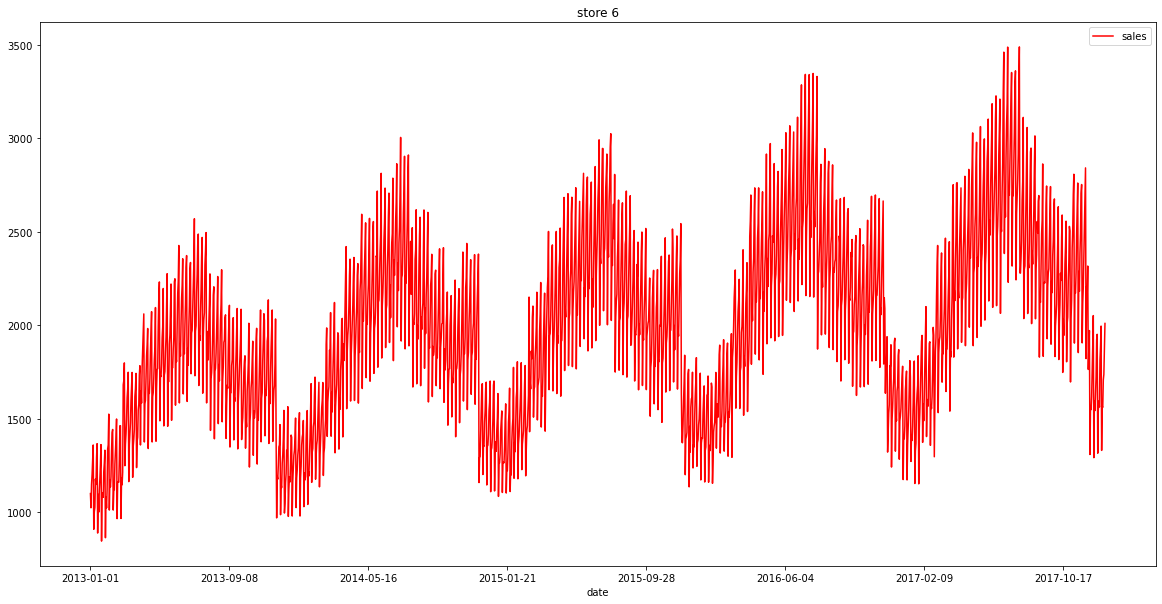

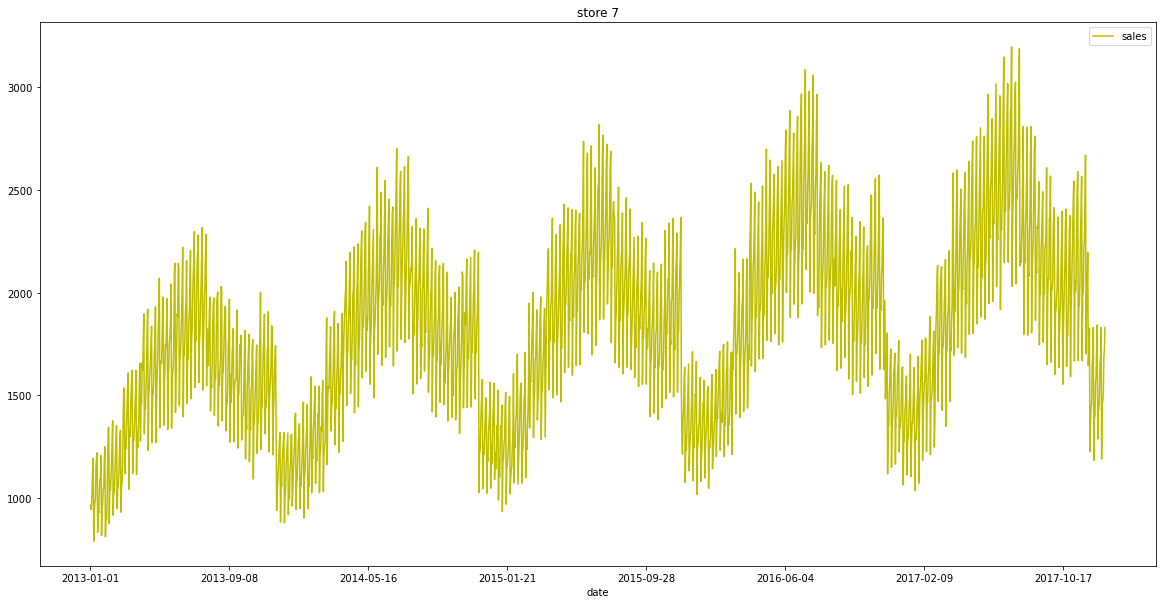

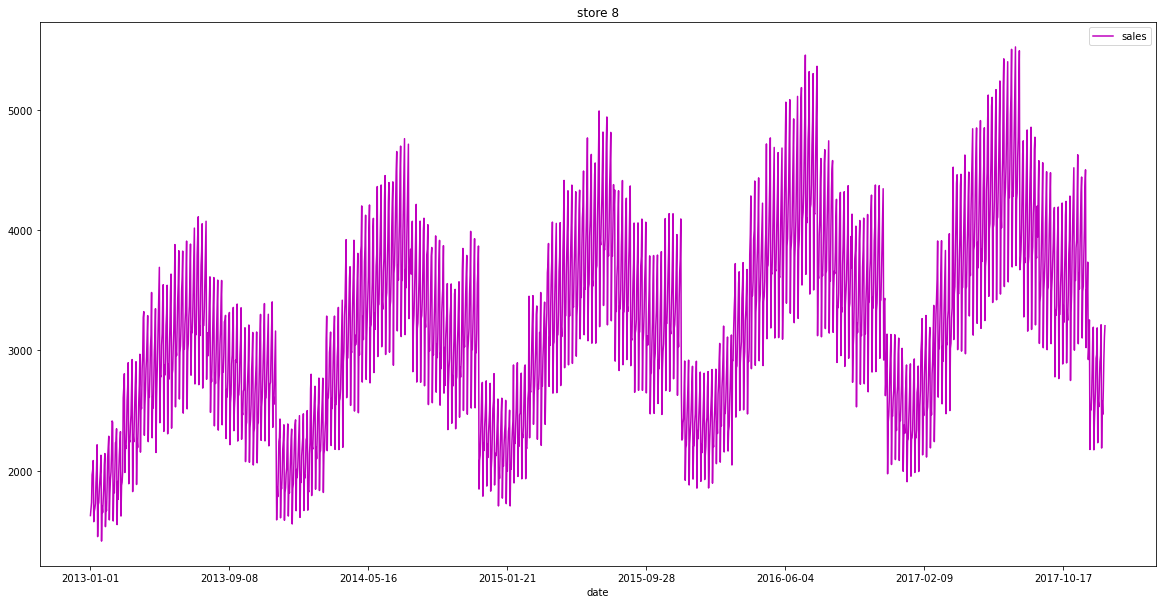

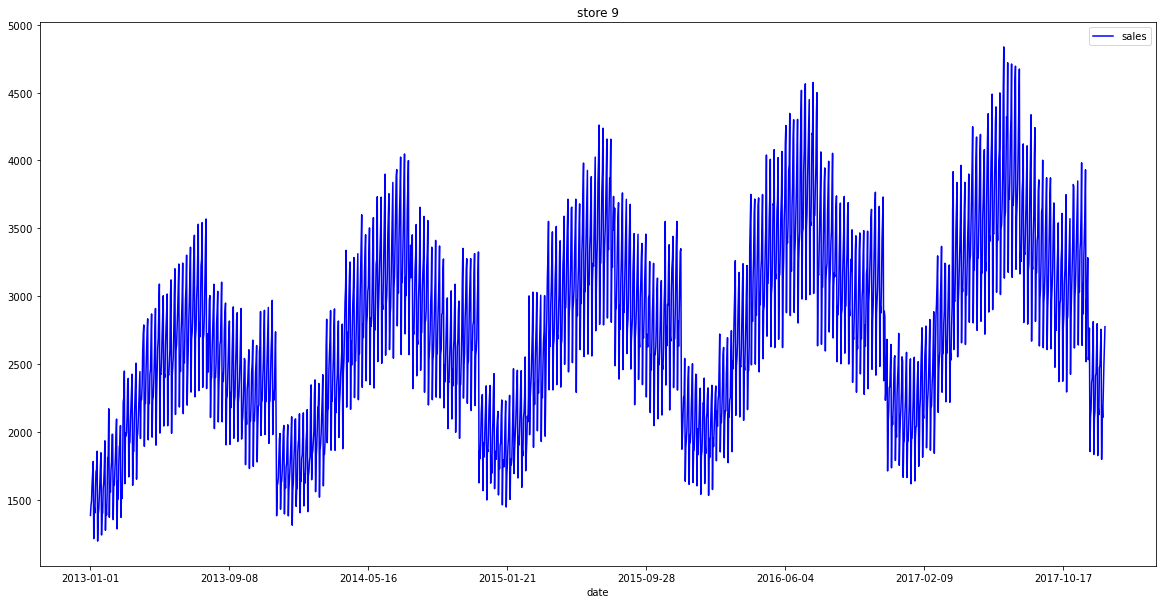

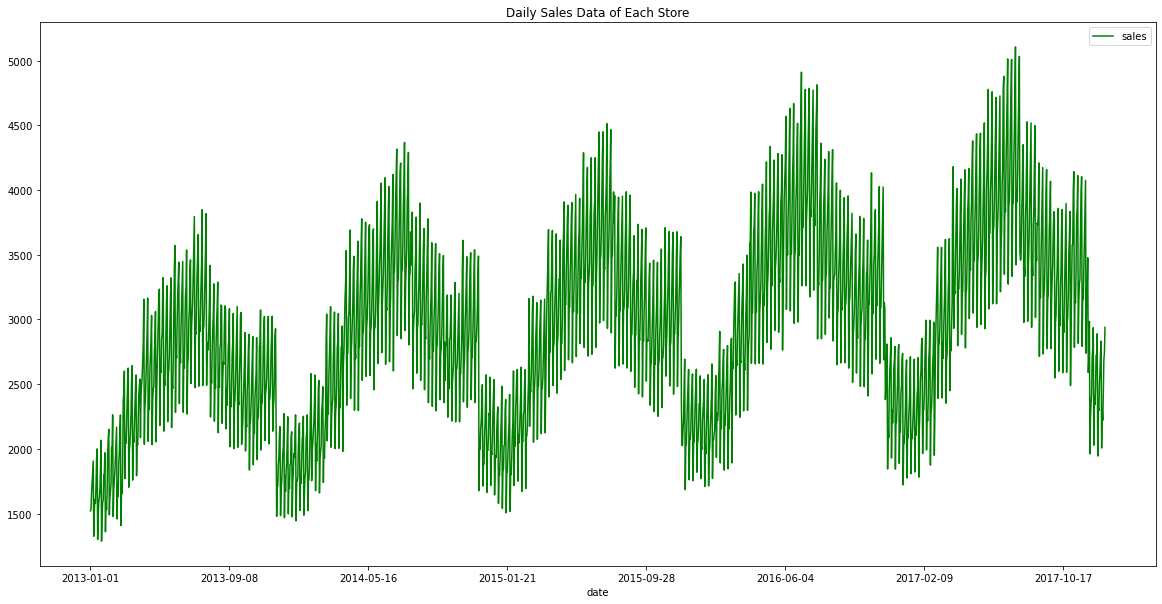

In [17]:
df_day[df_day.store==1].plot(x='date',y='sales',title="store 1",color='b',figsize=(20,10))
df_day[df_day.store==2].plot(x='date',y='sales',title="store 2",color='#77AC30',figsize=(20,10))
df_day[df_day.store==3].plot(x='date',y='sales',title="store 3",color='#D95319',figsize=(20,10))
df_day[df_day.store==4].plot(x='date',y='sales',title="store 4",color='#4DBEEE',figsize=(20,10))
df_day[df_day.store==5].plot(x='date',y='sales',title="store 5",color='#EDB120',figsize=(20,10))
df_day[df_day.store==6].plot(x='date',y='sales',title="store 6",color='r',figsize=(20,10))
df_day[df_day.store==7].plot(x='date',y='sales',title="store 7",color='y',figsize=(20,10))
df_day[df_day.store==8].plot(x='date',y='sales',title="store 8",color='m',figsize=(20,10))
df_day[df_day.store==9].plot(x='date',y='sales',title="store 9",color='b',figsize=(20,10))
df_day[df_day.store==10].plot(x='date',y='sales',title="store 10",color='g',figsize=(20,10))
plt.title("Daily Sales Data of Each Store")

Text(0.5, 1.0, 'Monthly Sales Data of Each Store')

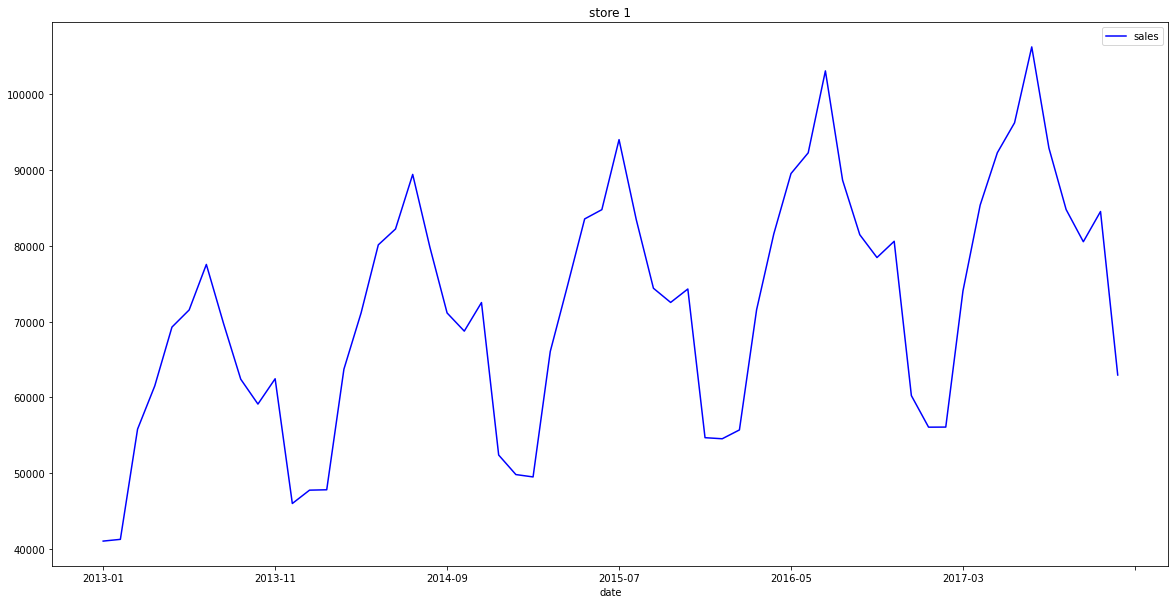

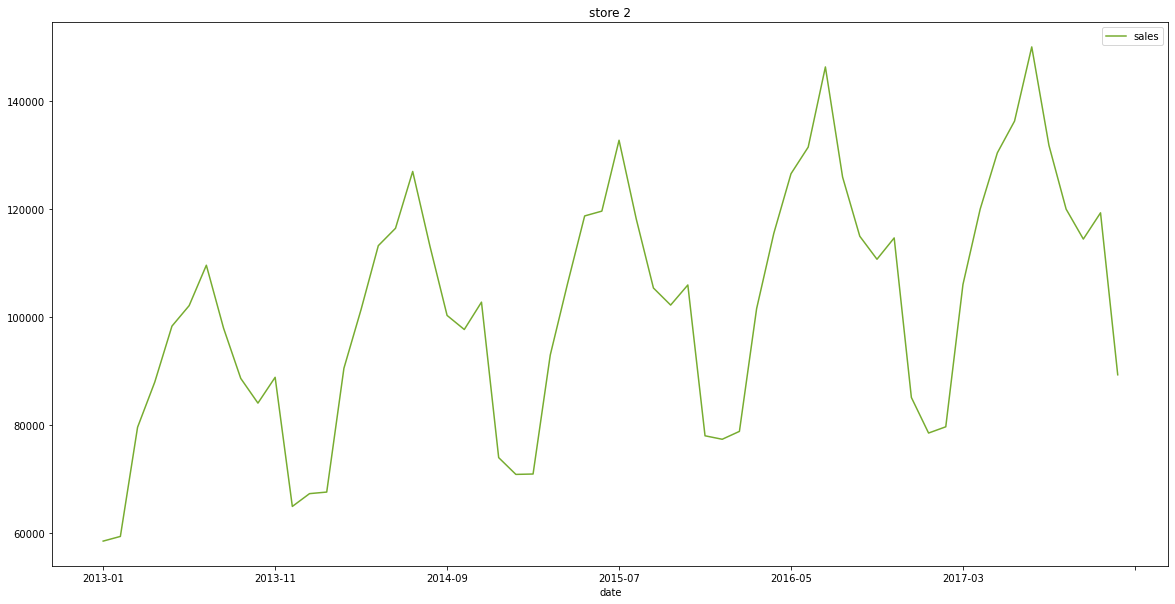

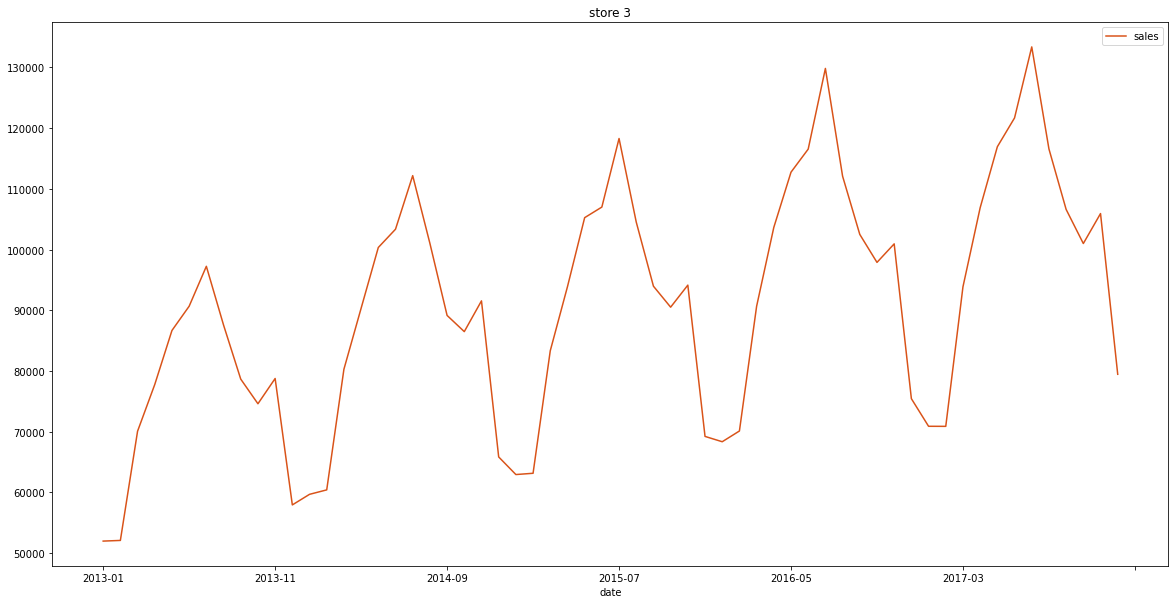

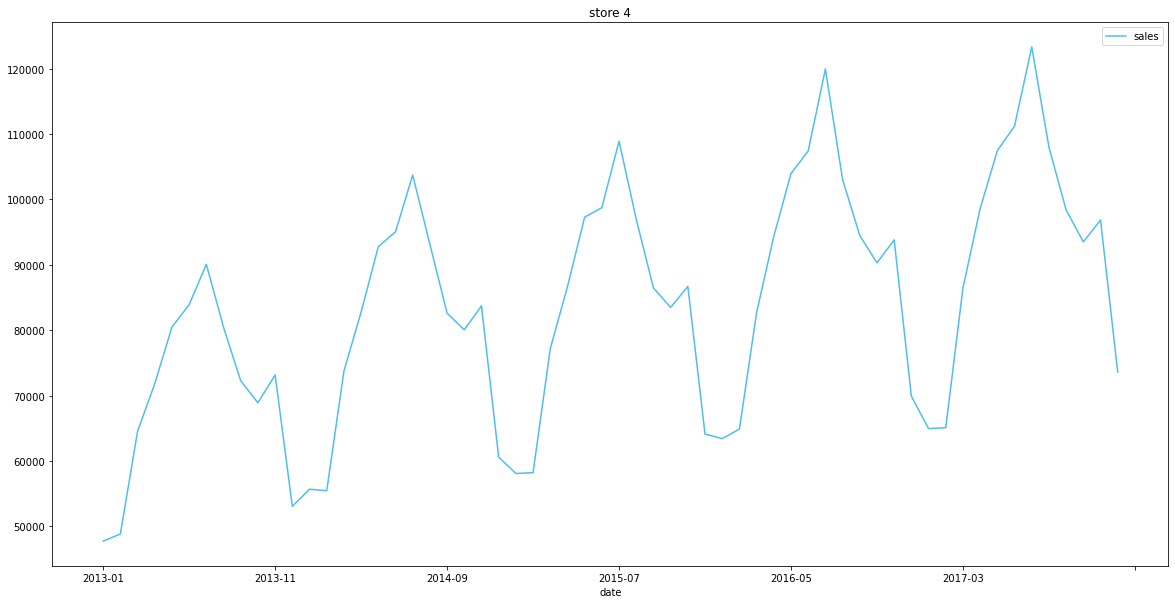

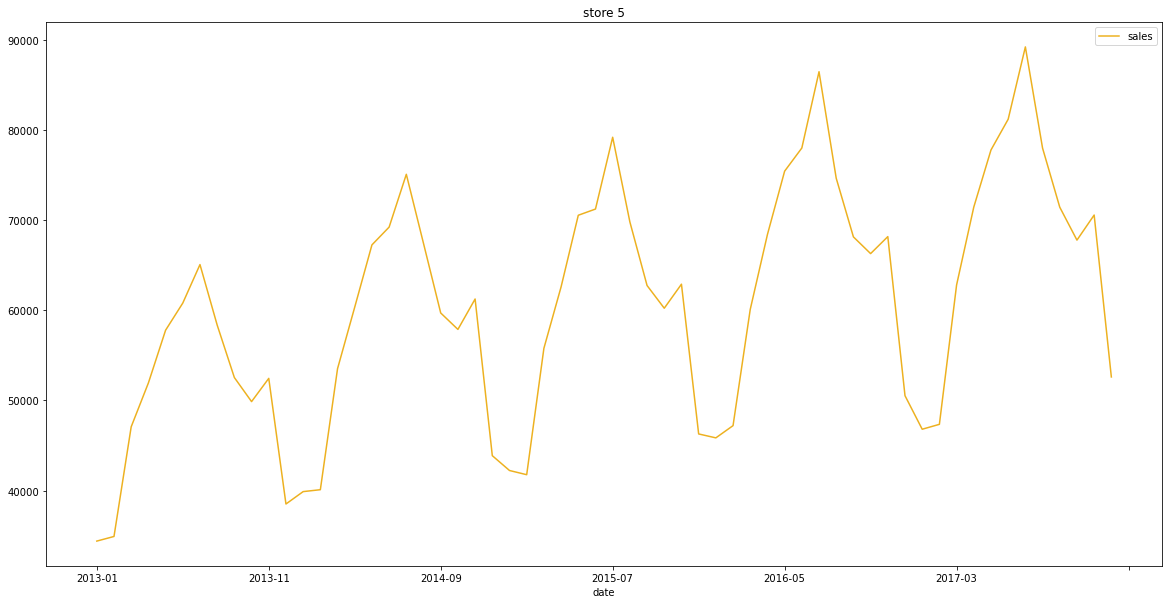

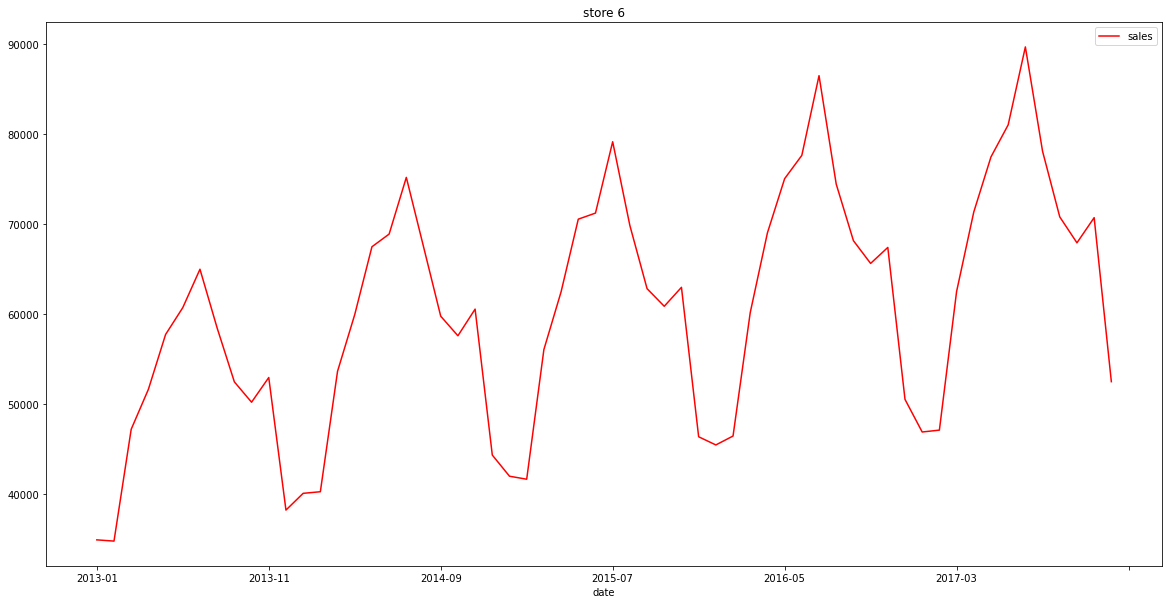

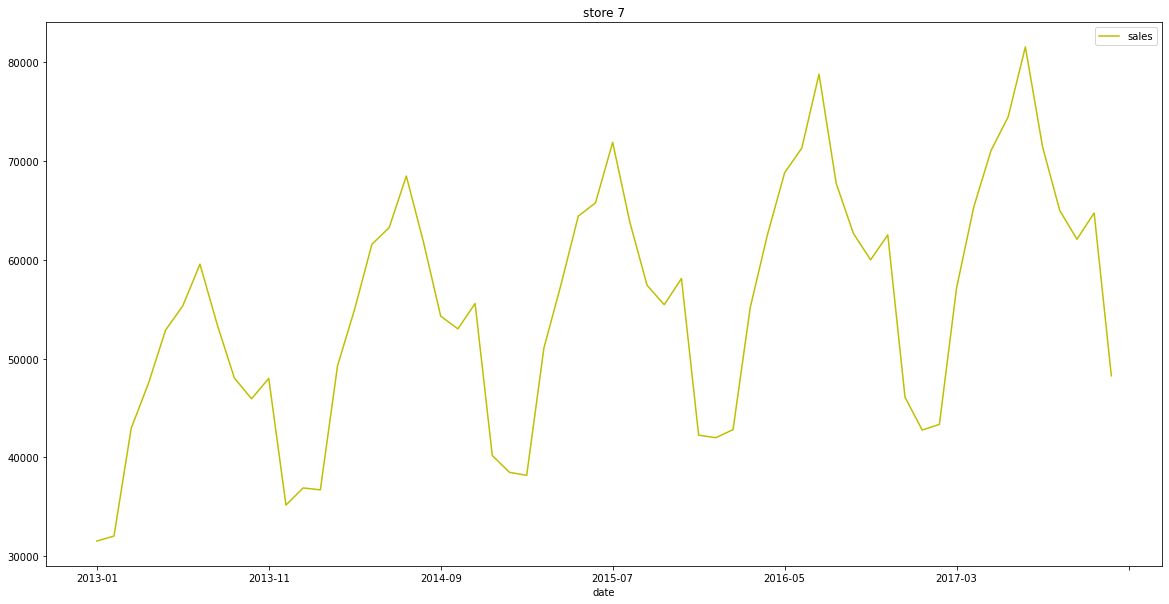

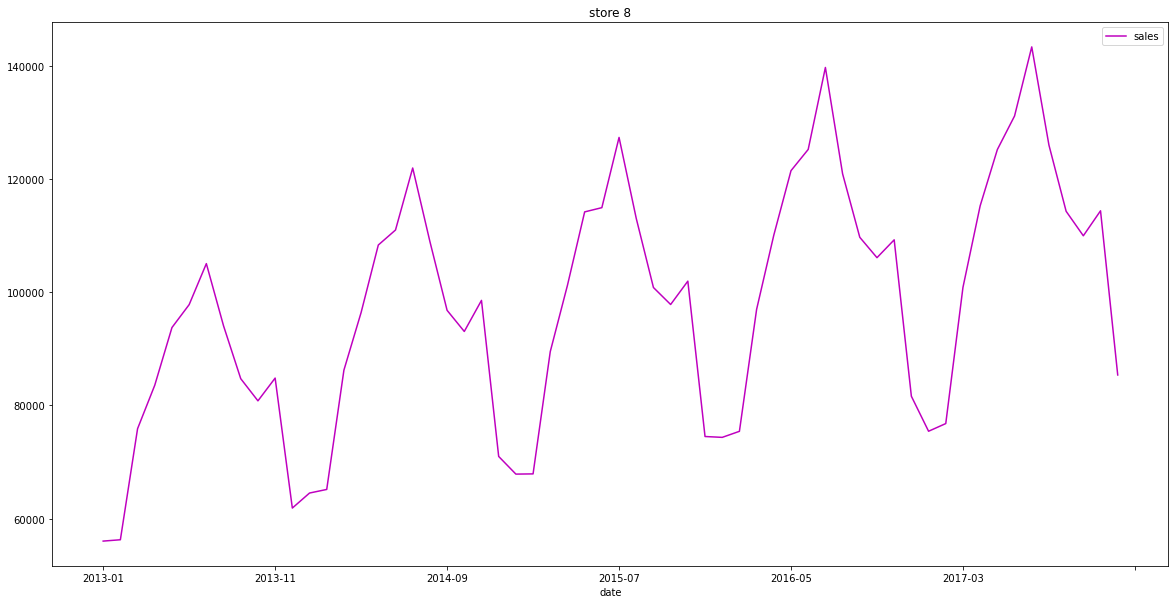

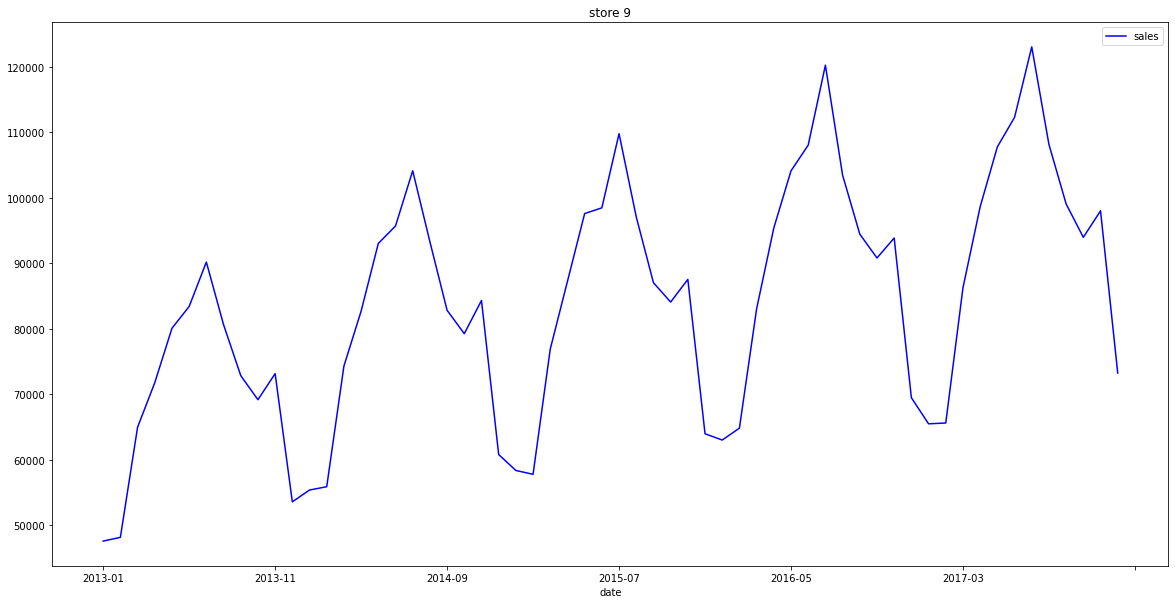

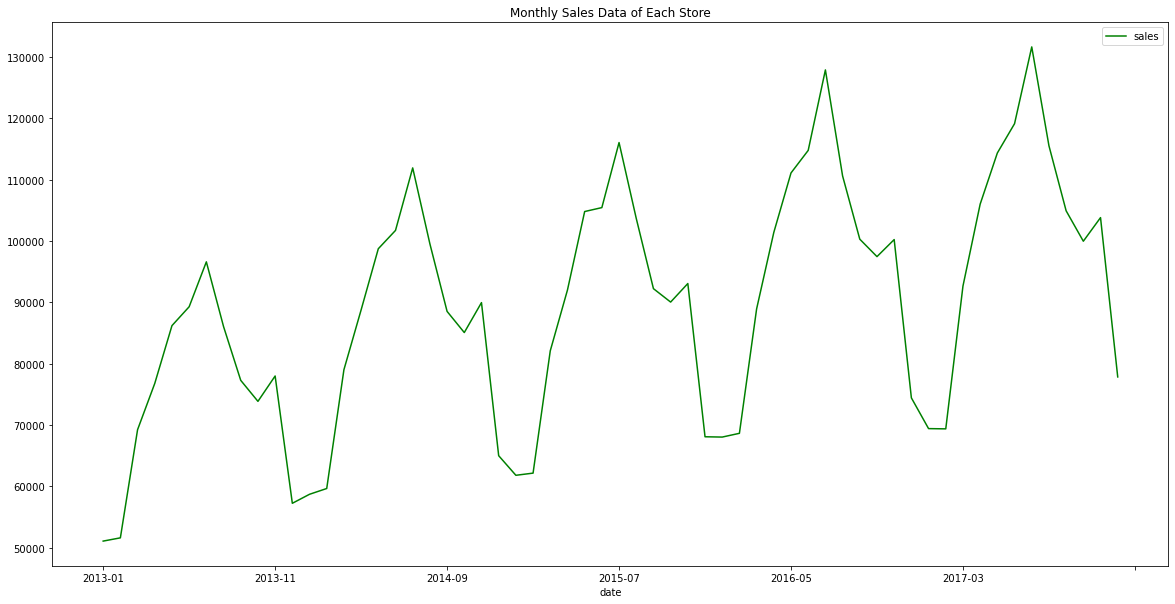

In [18]:
df_month[df_month.store==1].plot(x='date',y='sales',title="store 1",color='b',figsize=(20,10))
df_month[df_month.store==2].plot(x='date',y='sales',title="store 2",color='#77AC30',figsize=(20,10))
df_month[df_month.store==3].plot(x='date',y='sales',title="store 3",color='#D95319',figsize=(20,10))
df_month[df_month.store==4].plot(x='date',y='sales',title="store 4",color='#4DBEEE',figsize=(20,10))
df_month[df_month.store==5].plot(x='date',y='sales',title="store 5",color='#EDB120',figsize=(20,10))
df_month[df_month.store==6].plot(x='date',y='sales',title="store 6",color='r',figsize=(20,10))
df_month[df_month.store==7].plot(x='date',y='sales',title="store 7",color='y',figsize=(20,10))
df_month[df_month.store==8].plot(x='date',y='sales',title="store 8",color='m',figsize=(20,10))
df_month[df_month.store==9].plot(x='date',y='sales',title="store 9",color='b',figsize=(20,10))
df_month[df_month.store==10].plot(x='date',y='sales',title="store 10",color='g',figsize=(20,10))
plt.title("Monthly Sales Data of Each Store")

Text(0.5, 1.0, 'Yealy Sales Data of Each Store')

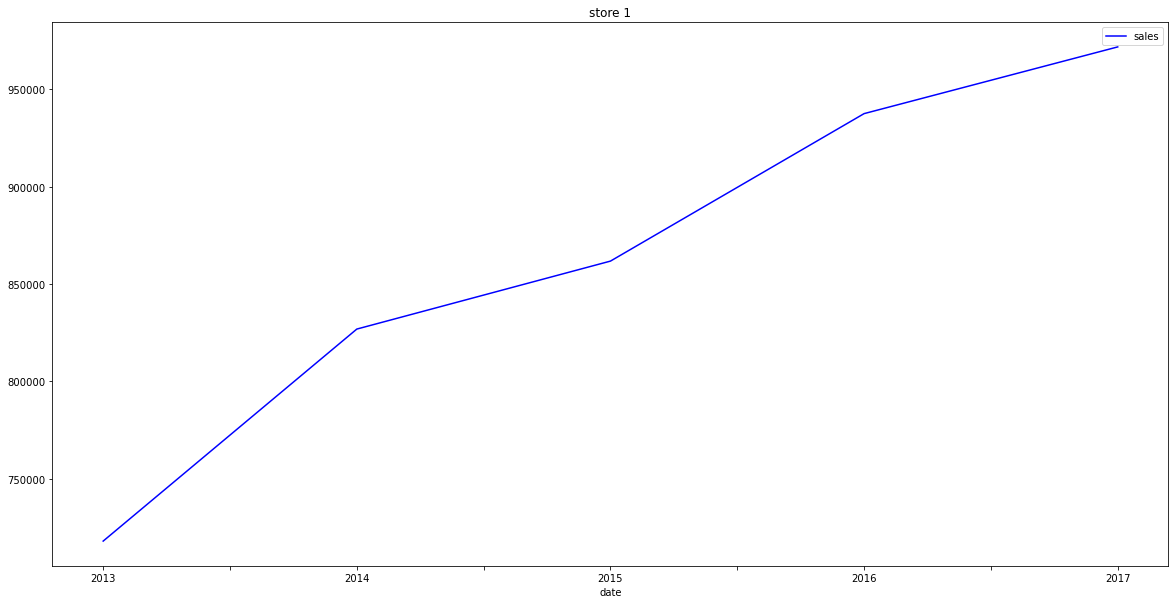

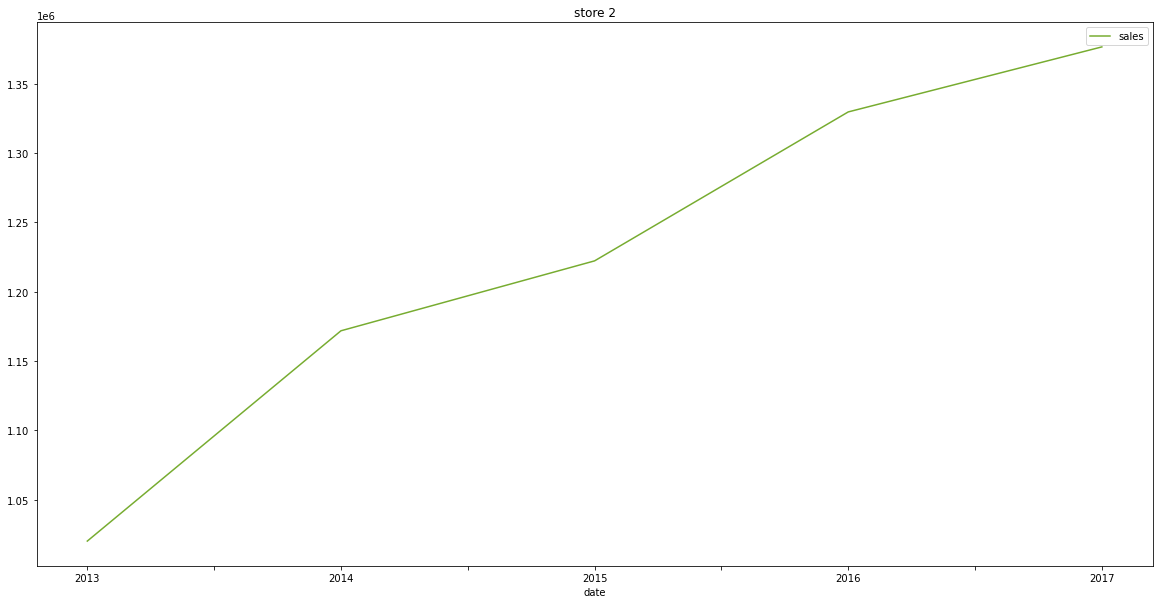

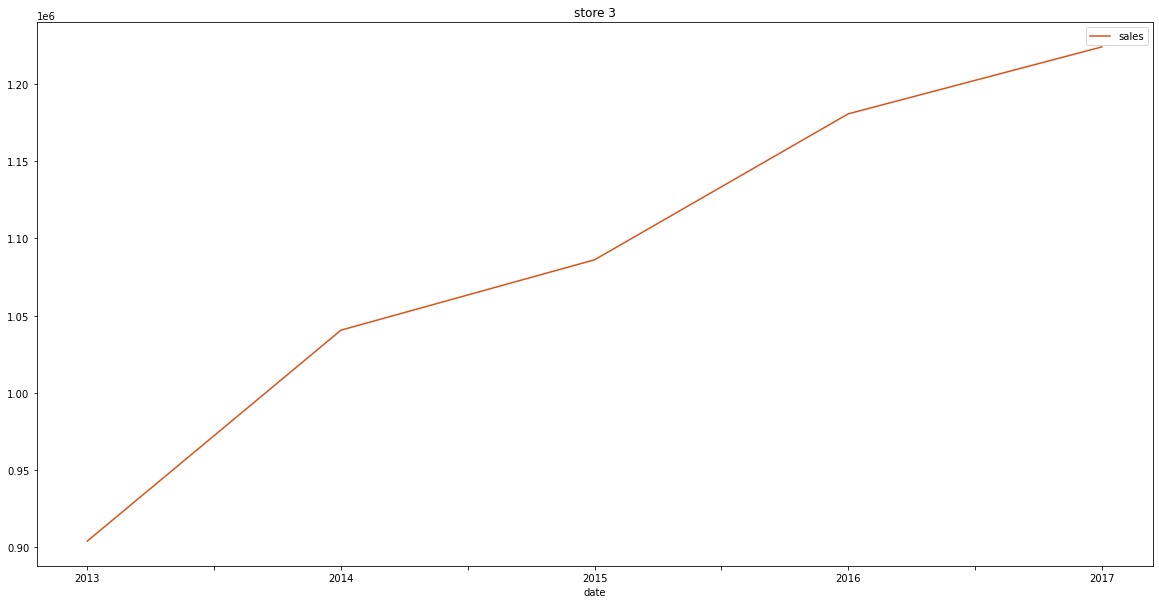

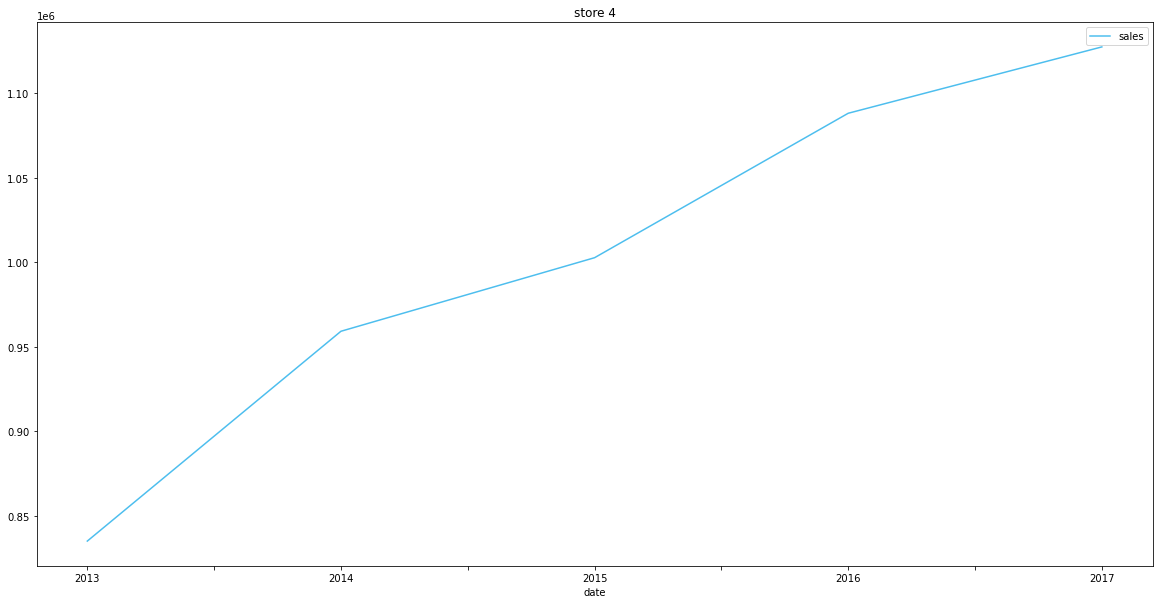

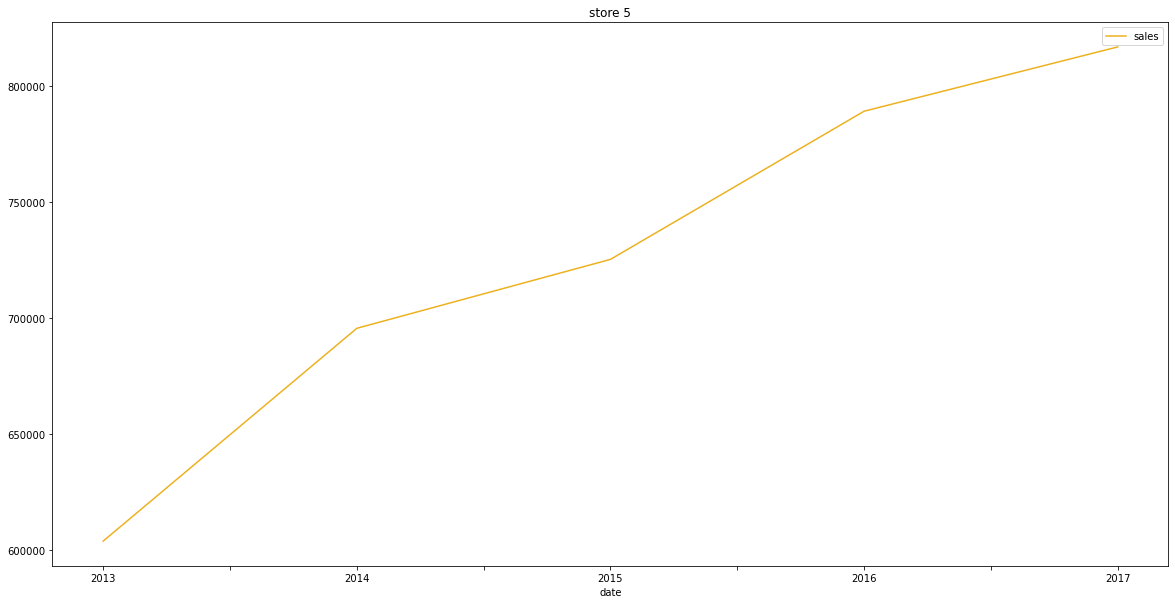

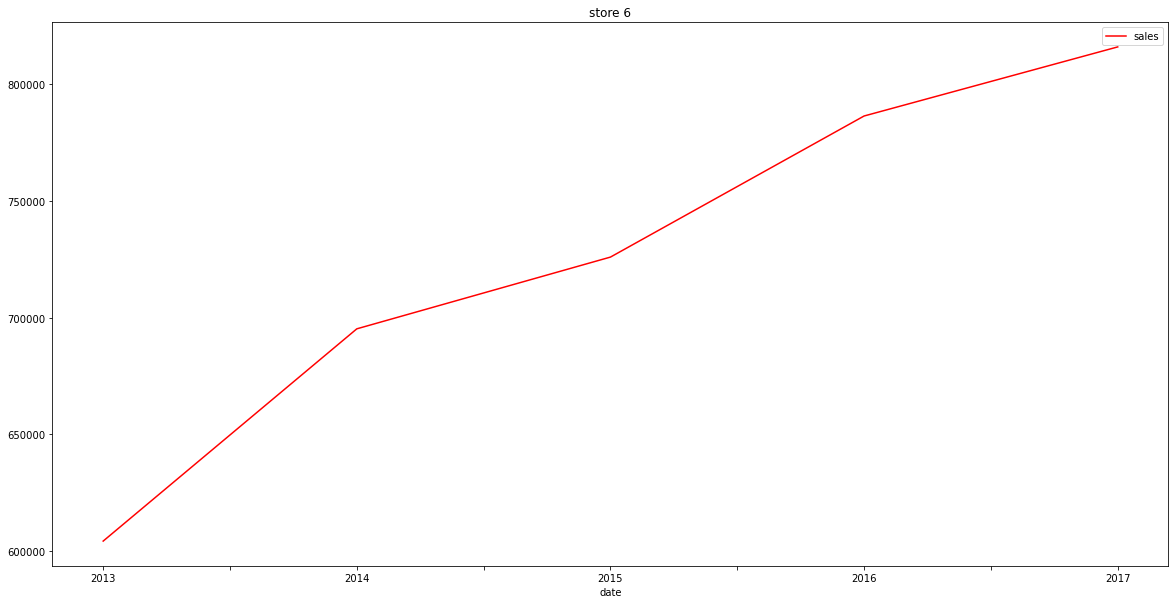

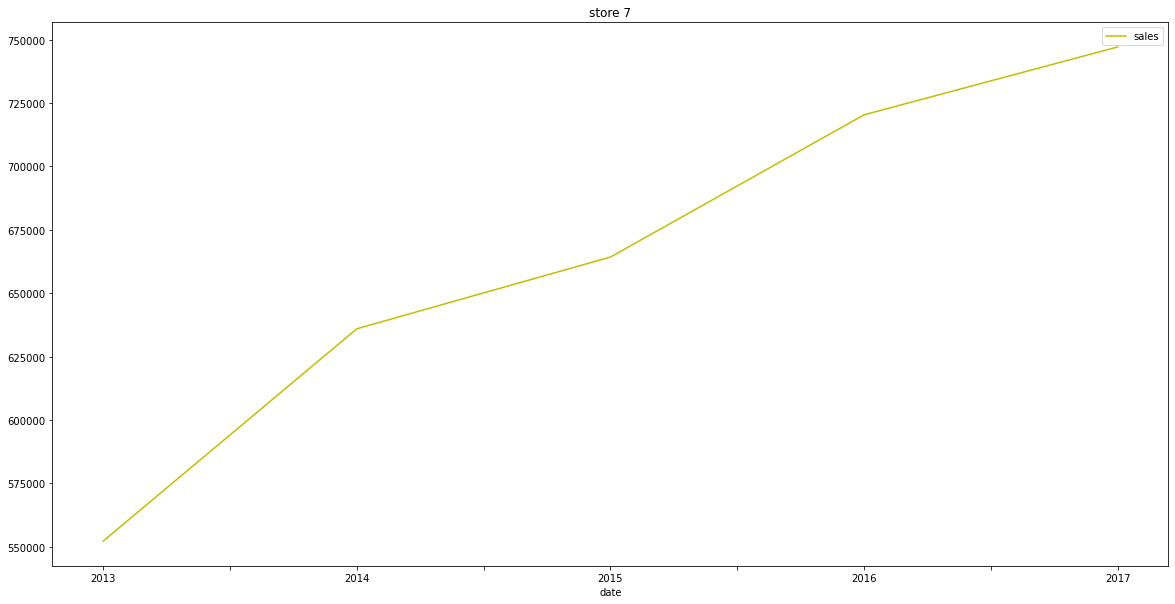

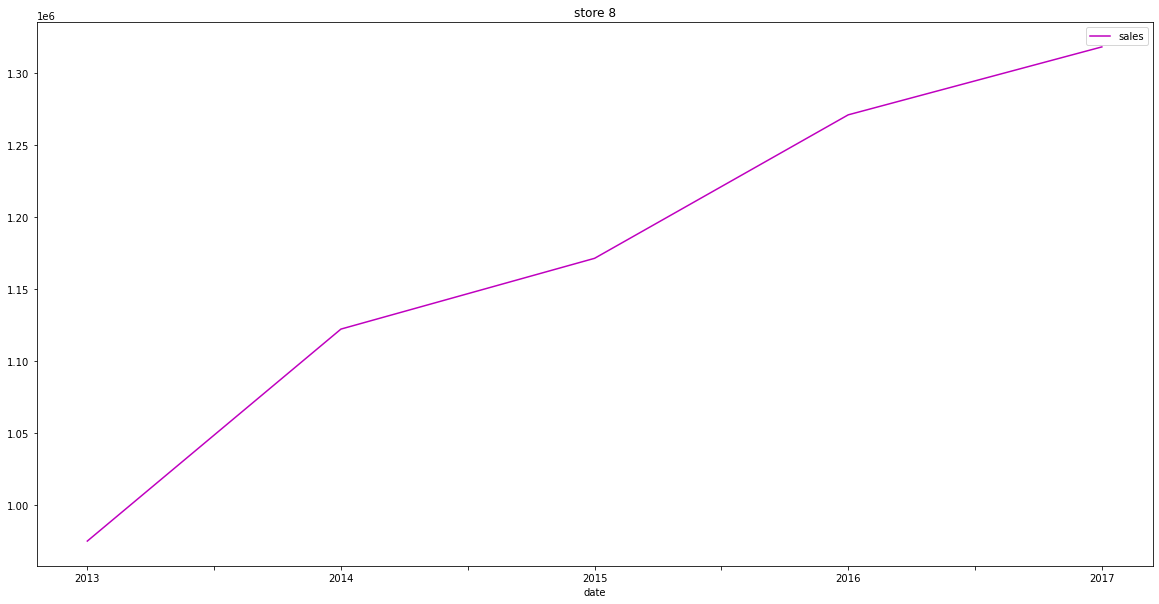

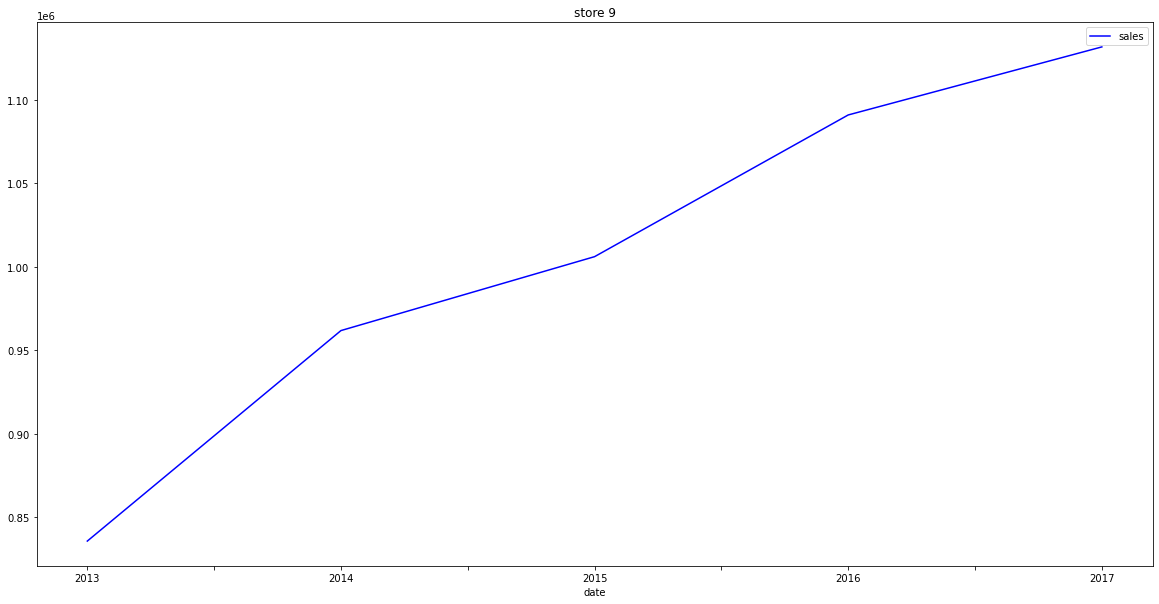

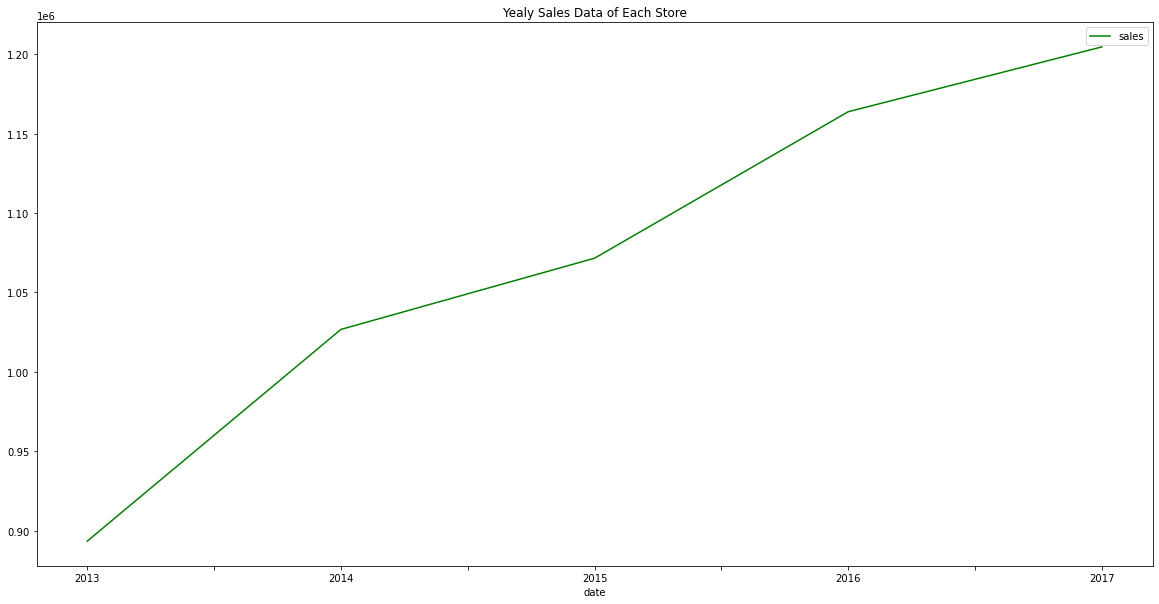

In [19]:
df_year[df_year.store==1].plot(x='date',y='sales',title="store 1",color='b',figsize=(20,10))
df_year[df_year.store==2].plot(x='date',y='sales',title="store 2",color='#77AC30',figsize=(20,10))
df_year[df_year.store==3].plot(x='date',y='sales',title="store 3",color='#D95319',figsize=(20,10))
df_year[df_year.store==4].plot(x='date',y='sales',title="store 4",color='#4DBEEE',figsize=(20,10))
df_year[df_year.store==5].plot(x='date',y='sales',title="store 5",color='#EDB120',figsize=(20,10))
df_year[df_year.store==6].plot(x='date',y='sales',title="store 6",color='r',figsize=(20,10))
df_year[df_year.store==7].plot(x='date',y='sales',title="store 7",color='y',figsize=(20,10))
df_year[df_year.store==8].plot(x='date',y='sales',title="store 8",color='m',figsize=(20,10))
df_year[df_year.store==9].plot(x='date',y='sales',title="store 9",color='b',figsize=(20,10))
df_year[df_year.store==10].plot(x='date',y='sales',title="store 10",color='g',figsize=(20,10))
plt.title("Yealy Sales Data of Each Store")

#                   Auto Regression 

In [20]:
#Sales shape and values

sales=data['sales'].values
print("Sales - ",sales)
print("Shape - ",sales.shape)

Sales -  [13 11 14 ... 74 62 82]
Shape -  (913000,)


In [21]:
# Grouping sales by date,store-wise

abc=data.groupby(['date','store'])['sales'].sum().reset_index()
abc=abc.set_index('date')
abc

store  sales
date                    
2013-01-01      1   1316
2013-01-01      2   1742
2013-01-01      3   1588
2013-01-01      4   1423
2013-01-01      5   1032
...           ...    ...
2017-12-31      6   2009
2017-12-31      7   1831
2017-12-31      8   3205
2017-12-31      9   2774
2017-12-31     10   2939

[18260 rows x 2 columns]

In [22]:
# Store-wise data allocation

S1=abc[abc['store']==1]
S2=abc[abc['store']==2]
S3=abc[abc['store']==3]
S4=abc[abc['store']==4]
S5=abc[abc['store']==5]
S6=abc[abc['store']==6]
S7=abc[abc['store']==7]
S8=abc[abc['store']==8]
S9=abc[abc['store']==9]
S10=abc[abc['store']==10]


In [23]:
#Store 1 data display
S1

store  sales
date                    
2013-01-01      1   1316
2013-01-02      1   1264
2013-01-03      1   1305
2013-01-04      1   1452
2013-01-05      1   1499
...           ...    ...
2017-12-27      1   1837
2017-12-28      1   1951
2017-12-29      1   2116
2017-12-30      1   2304
2017-12-31      1   2388

[1826 rows x 2 columns]

# Seasionality

In [24]:
# Augmented Dickey Fuller Test (ADF Test)

# 1.The p-value
# 2.The value of the test statistic
# 3.Number of lags considered for the test
# 4.The critical value cutoffs.

In [25]:
dftest=adfuller(S1['sales'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value" , dftest[1])
print("3. Num of Lags", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical values Calculation :",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
      print("\t", key, ":", val)


1. ADF:  -2.9840769991201803
2. P-value 0.03640840305195661
3. Num of Lags 22
4. Num of Observations Used For ADF Regression and Critical values Calculation : 1803
5. Critical Values : 
	 1% : -3.4339820768018106
	 5% : -2.8631443597478143
	 10% : -2.567624108684946


In [26]:
dftest=adfuller(S2['sales'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value" , dftest[1])
print("3. Num of Lags", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical values Calculation :",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
      print("\t", key, ":", val)

1. ADF:  -3.012570528609773
2. P-value 0.033737030733330835
3. Num of Lags 23
4. Num of Observations Used For ADF Regression and Critical values Calculation : 1802
5. Critical Values : 
	 1% : -3.4339840952648695
	 5% : -2.8631452508003057
	 10% : -2.567624583142913


In [27]:
dftest=adfuller(S3['sales'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value" , dftest[1])
print("3. Num of Lags", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical values Calculation :",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
      print("\t", key, ":", val)

1. ADF:  -2.8588908502242423
2. P-value 0.05034153178715435
3. Num of Lags 25
4. Num of Observations Used For ADF Regression and Critical values Calculation : 1800
5. Critical Values : 
	 1% : -3.4339881389288407
	 5% : -2.863147035877915
	 10% : -2.567625533641975


In [28]:
dftest=adfuller(S4['sales'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value" , dftest[1])
print("3. Num of Lags", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical values Calculation :",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
      print("\t", key, ":", val)

1. ADF:  -3.1227498779326797
2. P-value 0.024914767159745242
3. Num of Lags 22
4. Num of Observations Used For ADF Regression and Critical values Calculation : 1803
5. Critical Values : 
	 1% : -3.4339820768018106
	 5% : -2.8631443597478143
	 10% : -2.567624108684946


In [29]:
dftest=adfuller(S5['sales'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value" , dftest[1])
print("3. Num of Lags", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical values Calculation :",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
      print("\t", key, ":", val)

1. ADF:  -3.0724842939160175
2. P-value 0.028657628668041342
3. Num of Lags 22
4. Num of Observations Used For ADF Regression and Critical values Calculation : 1803
5. Critical Values : 
	 1% : -3.4339820768018106
	 5% : -2.8631443597478143
	 10% : -2.567624108684946


In [30]:
dftest=adfuller(S6['sales'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value" , dftest[1])
print("3. Num of Lags", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical values Calculation :",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
      print("\t", key, ":", val)

1. ADF:  -2.975559812974878
2. P-value 0.0372407043623115
3. Num of Lags 21
4. Num of Observations Used For ADF Regression and Critical values Calculation : 1804
5. Critical Values : 
	 1% : -3.4339800605797155
	 5% : -2.8631434696839992
	 10% : -2.5676236347535166


In [31]:
dftest=adfuller(S7['sales'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value" , dftest[1])
print("3. Num of Lags", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical values Calculation :",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
      print("\t", key, ":", val)

1. ADF:  -3.029018447510098
2. P-value 0.032271879331692385
3. Num of Lags 22
4. Num of Observations Used For ADF Regression and Critical values Calculation : 1803
5. Critical Values : 
	 1% : -3.4339820768018106
	 5% : -2.8631443597478143
	 10% : -2.567624108684946


In [32]:
dftest=adfuller(S8['sales'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value" , dftest[1])
print("3. Num of Lags", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical values Calculation :",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
      print("\t", key, ":", val)

1. ADF:  -3.0401823051326367
2. P-value 0.03130848578305535
3. Num of Lags 23
4. Num of Observations Used For ADF Regression and Critical values Calculation : 1802
5. Critical Values : 
	 1% : -3.4339840952648695
	 5% : -2.8631452508003057
	 10% : -2.567624583142913


In [33]:
dftest=adfuller(S9['sales'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value" , dftest[1])
print("3. Num of Lags", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical values Calculation :",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
      print("\t", key, ":", val)

1. ADF:  -2.9887536889590303
2. P-value 0.035958095720913526
3. Num of Lags 24
4. Num of Observations Used For ADF Regression and Critical values Calculation : 1801
5. Critical Values : 
	 1% : -3.4339861159726306
	 5% : -2.863146142843122
	 10% : -2.5676250581282964


In [34]:
dftest=adfuller(S10['sales'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value" , dftest[1])
print("3. Num of Lags", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical values Calculation :",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
      print("\t", key, ":", val)

1. ADF:  -3.006267817787808
2. P-value 0.03431319642874384
3. Num of Lags 21
4. Num of Observations Used For ADF Regression and Critical values Calculation : 1804
5. Critical Values : 
	 1% : -3.4339800605797155
	 5% : -2.8631434696839992
	 10% : -2.5676236347535166


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\graphics\

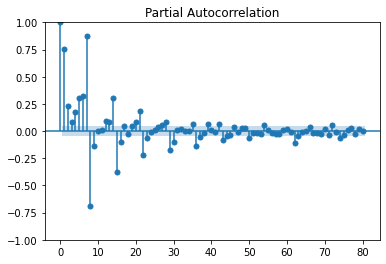

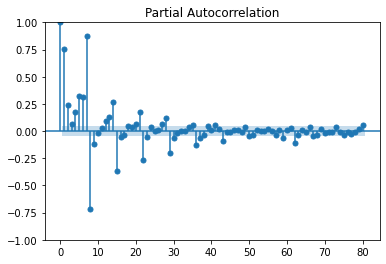

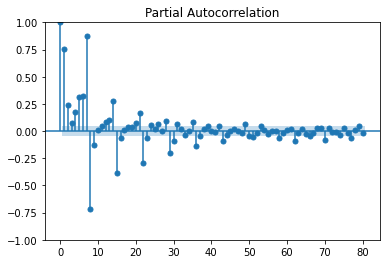

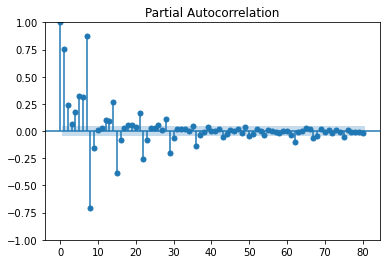

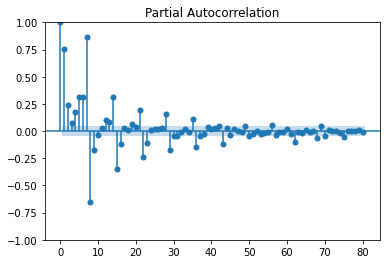

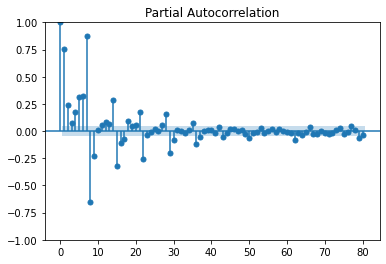

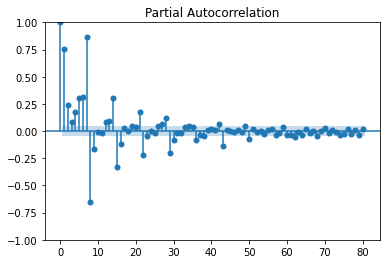

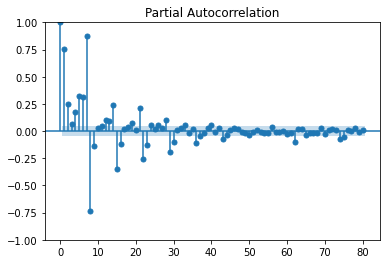

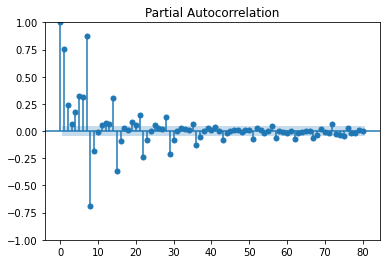

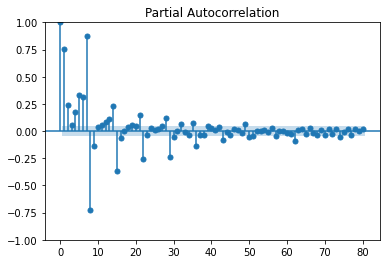

In [35]:
pacf1=plot_pacf(S1['sales'],lags=80)
pacf2=plot_pacf(S2['sales'],lags=80)
pacf3=plot_pacf(S3['sales'],lags=80)
pacf4=plot_pacf(S4['sales'],lags=80)
pacf5=plot_pacf(S5['sales'],lags=80)
pacf6=plot_pacf(S6['sales'],lags=80)
pacf7=plot_pacf(S7['sales'],lags=80)
pacf8=plot_pacf(S8['sales'],lags=80)
pacf9=plot_pacf(S9['sales'],lags=80)
pacf10=plot_pacf(S10['sales'],lags=80)

In [36]:
S2

store  sales
date                    
2013-01-01      2   1742
2013-01-02      2   1808
2013-01-03      2   1887
2013-01-04      2   1983
2013-01-05      2   2087
...           ...    ...
2017-12-27      2   2624
2017-12-28      2   2839
2017-12-29      2   3025
2017-12-30      2   3151
2017-12-31      2   3370

[1826 rows x 2 columns]

In [37]:
X1=S1['sales'].values
X2=S2['sales'].values
X3=S3['sales'].values
X4=S4['sales'].values
X5=S5['sales'].values
X6=S6['sales'].values
X7=S7['sales'].values
X8=S8['sales'].values
X9=S9['sales'].values
X10=S10['sales'].values

In [38]:
X1.shape

(1826,)

In [39]:
train1 = X1[:1440]
test1 = X1[1440:]

train2 = X2[:1440]
test2 = X2[1440:]

train3 = X3[:1440]
test3 = X3[1440:]


train4 = X4[:1440]
test4 = X4[1440:]

train5 = X5[:1440]
test5 = X5[1440:]

train6 = X6[:1440]
test6 = X6[1440:]

train7 = X7[:1440]
test7 = X7[1440:]

train8 = X8[:1440]
test8 = X8[1440:]

train9 = X9[:1440]
test9 = X9[1440:]

train10 = X10[:1440]
test10 = X10[1440:]

In [40]:
model1=AutoReg(train1,lags=24).fit()
model2=AutoReg(train2,lags=23).fit()
model3=AutoReg(train3,lags=25).fit()
model4=AutoReg(train4,lags=22).fit()
model5=AutoReg(train5,lags=22).fit()
model6=AutoReg(train6,lags=21).fit()
model7=AutoReg(train7,lags=22).fit()
model8=AutoReg(train8,lags=23).fit()
model9=AutoReg(train9,lags=24).fit()
model10=AutoReg(train10,lags=21).fit()

model1

In [41]:
pred1 = model1.predict(start=len(train1),end=len(X1)-1,dynamic=False)
pred2 = model2.predict(start=len(train2),end=len(X2)-1,dynamic=False)
pred3 = model3.predict(start=len(train3),end=len(X3)-1,dynamic=False)
pred4 = model4.predict(start=len(train4),end=len(X4)-1,dynamic=False)
pred5 = model5.predict(start=len(train5),end=len(X5)-1,dynamic=False)
pred6 = model6.predict(start=len(train6),end=len(X6)-1,dynamic=False)
pred7 = model7.predict(start=len(train7),end=len(X7)-1,dynamic=False)
pred8 = model8.predict(start=len(train8),end=len(X8)-1,dynamic=False)
pred9 = model9.predict(start=len(train9),end=len(X9)-1,dynamic=False)
pred10 = model10.predict(start=len(train10),end=len(X10)-1,dynamic=False)

[2449.13173053 1534.17690175 1852.78167514 1948.08756154 1800.16466628
 2001.84495106 2180.08190905 2440.01291436 1596.16612894 1912.55278176
 1976.31472816 1813.88402927 2017.58915101 2153.32972721 2407.27286178
 1590.22493771 1858.09920843 1908.46733519 1821.40891264 2038.61945643
 2186.13746069 2443.35721735 1599.80613166 1897.67062008 1972.57774826
 1838.30647572 2045.40386026 2199.72981516 2454.57966292 1634.60656153
 1924.30809262 1988.40963461 1866.5721602  2078.262933   2219.93111569
 2473.77628273 1658.77911944 1939.726613   2003.61929122 1885.10033658
 2095.72593306 2241.65474755 2494.08472119 1679.56238868 1963.68994337
 2031.82798372 1906.13717944 2115.01642291 2258.72071313 2509.27921021
 1704.51467389 1983.85540618 2049.11780051 1926.38445681 2136.19945666
 2276.65150278 2526.01479321 1725.88264814 2002.23372067 2068.33814116
 1944.20973805 2152.80723256 2293.12707694 2540.86721384 1745.70219205
 2020.2488249  2086.83456937 1961.56104559 2169.75083225 2307.90175675
 2554.

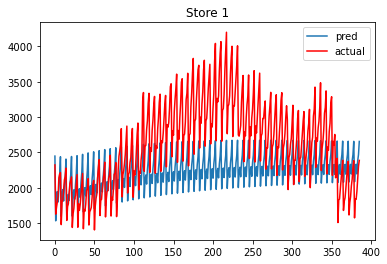

In [42]:
from matplotlib import pyplot

pyplot.plot(pred1)
pyplot.plot(test1,color='red')
plt.title("Store 1")
plt.legend(["pred","actual"],loc="best")
print(pred1)

In [43]:
rmse = sqrt(mean_squared_error(test1,pred1))
print("Store1 RMSE  - ",rmse)
print(" Sales Mean - ",S1['sales'].mean())

Store1 RMSE  -  606.9331130375242
 Sales Mean -  2363.4189485213583


[3418.50743222 2125.42037973 2599.67709553 2649.25925282 2632.05269567
 2799.61017571 3111.70771958 3387.4235392  2165.67692396 2627.99772364
 2713.64933964 2570.11687903 2710.84251552 3055.41877333 3285.53704695
 2120.75251283 2522.79755071 2575.89259921 2631.66090686 2758.74585112
 3070.79229232 3342.47629907 2144.89668601 2591.31273972 2659.45276238
 2635.40439533 2782.29048691 3102.44936391 3369.63665658 2192.61947869
 2627.31762495 2702.9745293  2669.2728105  2810.91759059 3137.31641998
 3393.02574203 2228.95617453 2651.29847686 2715.22837867 2715.39458445
 2853.34983782 3166.49681652 3430.77828954 2267.3075448  2695.26613094
 2763.60006228 2746.01022221 2886.6367625  3200.68316413 3462.79132051
 2308.62065865 2729.87075023 2798.58299584 2781.74680858 2920.48355771
 3233.25426562 3492.30445461 2345.68956438 2762.52312987 2827.78596581
 2816.46588077 2953.8294197  3260.9088797  3521.20713807 2380.44312007
 2795.21400858 2861.05456337 2846.03708211 2983.10209598 3288.40396716
 3547.

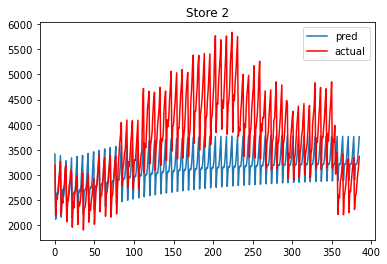

In [44]:
pyplot.plot(pred2)
pyplot.plot(test2,color='red')
plt.title("Store 2")
plt.legend(["pred","actual"],loc="best")
print(pred2)

In [45]:
rmse = sqrt(mean_squared_error(test2,pred2))
print("Store2 RMSE  - ",rmse)
print(" Sales Mean - ",S2['sales'].mean())

Store2 RMSE  -  850.9769948873469
 Sales Mean -  3351.658269441402


[2975.35804522 1958.20002201 2315.85335434 2377.27640071 2319.99434066
 2549.06333981 2771.08929501 3002.02210556 2045.91536041 2413.59013634
 2426.98938957 2271.00949213 2496.92638063 2729.31833494 2942.27249501
 2031.24546378 2337.41321291 2353.54473583 2338.29752389 2557.64666558
 2771.69996032 2984.33083518 2040.2337944  2383.55218507 2420.94910716
 2350.25613699 2572.86975766 2796.0609474  3010.19802788 2088.26724085
 2430.63436028 2452.42512139 2372.57146422 2594.36738363 2819.13654021
 3033.72967624 2118.69931696 2443.47122328 2466.12982338 2410.43332334
 2630.88175182 2848.65468017 3057.12181748 2141.66310116 2475.53395346
 2502.22721956 2433.48990583 2652.17805044 2871.78009242 3079.88999322
 2173.82767733 2504.90309889 2526.7328967  2457.67541228 2675.57582605
 2894.73199305 3102.12353314 2200.68424221 2526.37029988 2548.16522291
 2483.30694559 2700.35059423 2916.88121029 3120.57442834 2223.82869855
 2550.76269648 2572.72133802 2504.66400842 2720.04420763 2936.28624759
 3138.

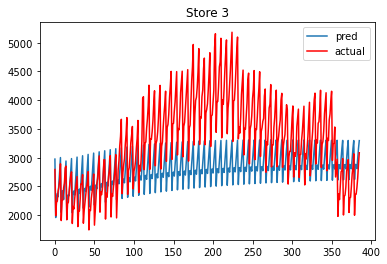

In [46]:
pyplot.plot(pred3)
pyplot.plot(test3,color='red')
plt.title("Store 3")
plt.legend(["pred","actual"],loc="best")
print(pred3)

In [47]:
rmse = sqrt(mean_squared_error(test3,pred3))
print("Store3 RMSE  - ",rmse)
print(" Sales Mean - ",S3['sales'].mean())

Store3 RMSE  -  761.3622568897291
 Sales Mean -  2976.5301204819275


[2775.79119404 1770.43318128 2164.07605596 2229.78933715 2168.05106895
 2335.02379221 2528.70999218 2794.14944054 1837.89984122 2262.34489099
 2298.76522915 2179.79785811 2373.03289304 2513.12576576 2736.21801011
 1839.53329343 2184.93882032 2222.38359175 2236.59614432 2383.82750331
 2545.502001   2786.89916545 1849.70025765 2238.45140682 2284.6550325
 2229.43875624 2396.97233518 2562.693672   2802.58799426 1883.25827406
 2272.39101598 2308.53854236 2258.67922549 2435.54768309 2586.39884533
 2818.45372288 1914.26657495 2283.55777325 2322.58020769 2290.9386401
 2450.54701515 2608.98738355 2843.64086736 1934.49053249 2314.65930123
 2352.1364171  2305.93002319 2473.33702208 2629.17259726 2860.22638618
 1960.03979606 2337.45540271 2371.26476771 2328.66128861 2496.73389916
 2648.13312184 2877.43423786 1984.39844493 2356.59747953 2391.00204358
 2350.08262096 2513.56095526 2666.53486357 2894.44115343 2004.48466427
 2378.45204758 2410.68757058 2366.92906845 2532.55390912 2683.21938998
 2908.78

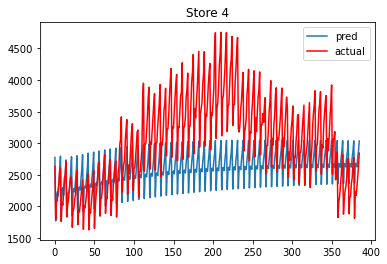

In [48]:
pyplot.plot(pred4)
pyplot.plot(test4,color='red')
plt.title("Store 4")
plt.legend(["pred","actual"],loc="best")
print(pred4)


In [49]:
rmse = sqrt(mean_squared_error(test4,pred4))
print("Store4 RMSE  - ",rmse)
print(" Sales Mean - ",S4['sales'].mean())

Store4 RMSE  -  698.6116114710508
 Sales Mean -  2745.147316538883


[2000.85336902 1228.1210342  1495.00647143 1582.86801933 1464.50084134
 1638.26094783 1809.46597835 1996.19955437 1268.80400076 1571.39340709
 1661.37291642 1505.27270277 1694.65287489 1831.62727471 1994.93673548
 1302.24056921 1544.24536192 1633.83443969 1529.64146551 1718.17107057
 1843.36333481 2031.18162574 1313.70837501 1583.33015529 1671.21702222
 1541.9880034  1723.39853376 1862.62504049 2035.63082813 1335.82396404
 1601.64527835 1687.20754008 1563.49051083 1750.153537   1880.19188361
 2052.05307328 1361.69219337 1615.54939198 1702.83415206 1581.81496715
 1765.39036393 1893.11047651 2068.32979219 1377.75127385 1636.79820365
 1721.81016794 1598.07890255 1781.11828958 1909.22694249 2079.04026282
 1397.67760188 1652.25162241 1735.99387883 1614.36799955 1797.21764167
 1922.03146323 2091.39528984 1416.19058785 1667.25793539 1751.26938747
 1629.29600116 1811.2137286  1934.21166441 2102.68653816 1432.18144953
 1682.54256804 1764.97430571 1643.32567672 1824.72371703 1946.16675261
 2112.

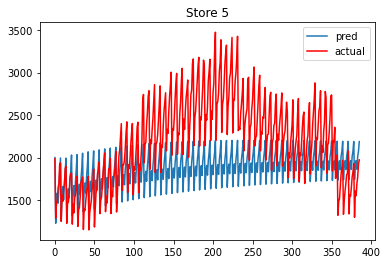

In [50]:
pyplot.plot(pred5)
pyplot.plot(test5,color='red')
plt.title("Store 5")
plt.legend(["pred","actual"],loc="best")
print(pred5)


In [51]:
rmse = sqrt(mean_squared_error(test5,pred5))
print("Store5 RMSE  - ",rmse)
print(" Sales Mean - ",S5['sales'].mean())

Store5 RMSE  -  517.2809918959642
 Sales Mean -  1988.5082146768893


[2009.25715833 1306.75156989 1539.92059956 1573.87166596 1478.54492946
 1649.53905389 1730.57982826 2004.30452148 1344.16973298 1596.86490201
 1726.38588747 1660.33970431 1872.76203538 1902.42951805 2119.86761017
 1467.77448869 1666.73643492 1728.27604635 1657.17046972 1846.85778141
 1895.31079146 2133.75548854 1485.3354044  1699.38018586 1778.00454508
 1703.77193935 1877.68954363 1903.205532   2125.29968445 1472.91542091
 1668.18204686 1742.60458389 1669.7653374  1856.34466522 1896.00459328
 2123.12788845 1490.36137386 1687.74313618 1761.48575188 1689.99252991
 1865.64808773 1898.69840227 2122.22414354 1494.07514953 1686.84885834
 1763.22244524 1697.94084215 1878.06279581 1914.46152074 2138.92335585
 1519.78025647 1706.64970033 1780.24716687 1712.16789217 1886.46189022
 1920.33773604 2141.42982802 1530.29668594 1713.52361143 1787.90385365
 1723.64164946 1897.07455486 1930.78722652 2150.1730144  1545.75486719
 1723.07454125 1795.30314697 1730.92060513 1901.53621288 1934.49568078
 2152.

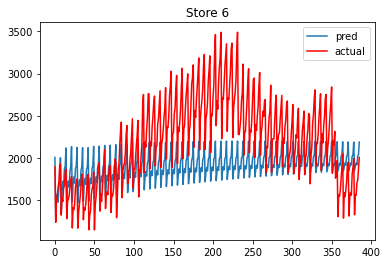

In [52]:
pyplot.plot(pred6)
pyplot.plot(test6,color='red')
plt.title("Store 6")
plt.legend(["pred","actual"],loc="best")
print(pred6)


In [53]:
rmse = sqrt(mean_squared_error(test6,pred6))
print("Store6 RMSE  - ",rmse)
print(" Sales Mean - ",S6['sales'].mean())

Store6 RMSE  -  515.3736814627339
 Sales Mean -  1986.6757940854327


[1851.04685798 1108.26805523 1451.91031261 1469.69051712 1452.35602374
 1521.98652034 1694.68031131 1845.55602506 1169.78522101 1481.34228384
 1507.36423775 1442.65236181 1557.13464814 1672.47820828 1845.63475593
 1157.18785521 1447.55017778 1474.43808808 1488.82621186 1564.82672069
 1695.61392814 1860.43497459 1170.99746248 1487.0773375  1507.14654985
 1488.29432171 1572.48970206 1714.83468058 1871.6990462  1201.3568516
 1500.57848628 1526.08662176 1506.49591144 1599.24479842 1723.72291054
 1888.52845881 1216.63802577 1514.52764623 1539.61769514 1528.54003819
 1610.56350719 1740.83817904 1901.19681504 1234.55446498 1534.92770608
 1556.68015773 1541.1511136  1625.25616801 1755.3737092  1912.44548915
 1254.47856258 1548.14882548 1572.18020512 1556.63073605 1641.12599674
 1766.23830895 1925.00262674 1270.15231302 1562.86244398 1586.10187904
 1571.22965401 1653.03483629 1778.83470184 1935.17483476 1285.96552639
 1577.00820634 1599.16062204 1583.9478762  1665.39614804 1789.77577421
 1944.5

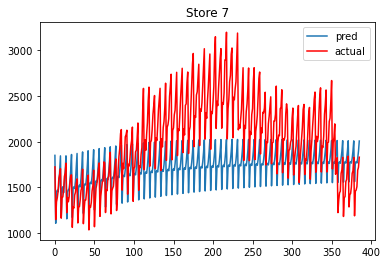

In [54]:
pyplot.plot(pred7)
pyplot.plot(test7,color='red')
plt.title("Store 7")
plt.legend(["pred","actual"],loc="best")
print(pred7)


In [55]:
rmse = sqrt(mean_squared_error(test7,pred7))
print("Store7 RMSE  - ",rmse)
print(" Sales Mean - ",S7['sales'].mean())

Store7 RMSE  -  465.1932609193345
 Sales Mean -  1818.186746987952


[3259.41462748 2012.2660163  2504.0699723  2549.96743805 2487.40721979
 2717.27595558 2925.72078098 3253.75474046 2007.71162456 2501.7298861
 2631.93822988 2410.69996811 2617.32885853 2824.12774142 3106.84179056
 1918.43612507 2407.53003552 2479.19699622 2427.08093154 2668.93958526
 2865.23987109 3169.6943186  1970.72008691 2466.61162707 2547.40233893
 2450.9624585  2682.06922002 2883.15628886 3201.14086049 2007.26024904
 2493.77807901 2601.52488335 2484.77905803 2707.93004941 2913.85691994
 3214.73403605 2034.00658046 2523.99054599 2608.45043691 2517.73667449
 2751.81835061 2952.21810246 3257.28058978 2080.21028763 2567.66096304
 2655.84890804 2556.76523398 2785.71982054 2983.72596863 3291.48761035
 2121.02529733 2601.78057231 2695.27726846 2594.49333936 2820.04915661
 3019.3510723  3322.00032435 2157.33639808 2638.31911081 2725.10500838
 2627.20589302 2854.79214977 3051.36256713 3353.85447261 2194.88446495
 2672.59275485 2759.68929548 2660.40304464 2885.85957458 3080.11634805
 3382.1

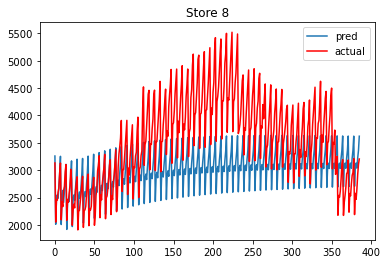

In [56]:
pyplot.plot(pred8)
pyplot.plot(test8,color='red')
plt.title("Store 8")
plt.legend(["pred","actual"],loc="best")
print(pred8)


In [57]:
rmse = sqrt(mean_squared_error(test8,pred8))
print("Store8 RMSE  - ",rmse)
print(" Sales Mean - ",S8['sales'].mean())

Store8 RMSE  -  815.5730665471494
 Sales Mean -  3207.102409638554


[2748.98637531 1638.40758897 2120.49560338 2199.58451793 2152.41232235
 2341.68853985 2559.98201965 2787.78284523 1709.01674609 2184.91520552
 2256.99127506 2151.20708798 2258.51320375 2458.91029526 2696.90153537
 1662.0933076  2104.36805644 2187.11781173 2185.62501603 2296.1590128
 2491.11054081 2734.35289651 1679.33482568 2144.83552205 2230.28064417
 2182.49741976 2321.53079785 2528.02337333 2765.00490918 1727.64013806
 2186.72320492 2268.66013892 2223.24010349 2344.18265602 2542.45181762
 2782.02726608 1753.05168991 2204.27169352 2287.2449192  2252.47166835
 2376.70931003 2573.04890386 2810.58849544 1783.7790602  2236.63666847
 2319.56531092 2276.4295456  2403.87713339 2600.50238411 2836.11476956
 1818.24599837 2266.95545539 2348.59623086 2306.89025794 2430.82845211
 2623.85980498 2859.04377093 1847.11756477 2292.22840473 2373.61521684
 2332.01379841 2456.65847491 2647.89451422 2881.24703286 1875.00592679
 2317.90784782 2398.68560427 2355.34017319 2479.95503525 2669.44820972
 2901.4

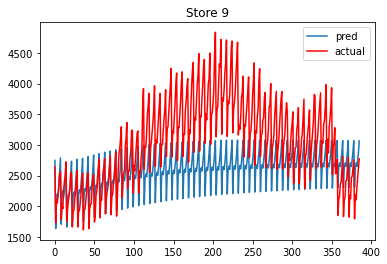

In [58]:
pyplot.plot(pred9)
pyplot.plot(test9,color='red')
plt.title("Store 9")
plt.legend(["pred","actual"],loc="best")
print(pred9)


In [59]:
rmse = sqrt(mean_squared_error(test9,pred9))
print("Store9 RMSE  - ",rmse)
print(" Sales Mean - ",S9['sales'].mean())

Store9 RMSE  -  703.3599843362197
 Sales Mean -  2752.4512595837896


[3020.31065954 1940.58262781 2381.43414499 2330.75595584 2276.51130297
 2477.50757844 2689.86615934 3014.48377319 2045.80215505 2485.76592591
 2509.14917357 2608.50477604 2774.66366283 2929.02506773 3196.45560205
 2175.54838455 2580.45227969 2512.6220577  2551.21243713 2726.02984857
 2892.06229327 3183.81503054 2188.0939463  2593.91275641 2562.21965376
 2603.99645041 2755.02121856 2896.79215336 3164.44394312 2167.17206277
 2558.50544801 2511.48025901 2561.28839218 2728.47028422 2885.5334521
 3169.07373029 2191.15566538 2586.29854638 2545.6246039  2591.29665047
 2749.18524277 2895.89511355 3173.29715642 2203.5455273  2591.57521639
 2551.68756105 2603.48156019 2766.18145811 2915.39861336 3194.58207462
 2234.81852204 2617.10823015 2573.80259794 2621.21334678 2778.10316888
 2921.48072072 3198.3826395  2247.95858909 2625.41284828 2583.28534905
 2633.13666064 2790.4033612  2932.19500508 3208.23857073 2266.76449117
 2638.07714742 2593.98597762 2642.70937233 2797.73150143 2936.86087203
 3212.5

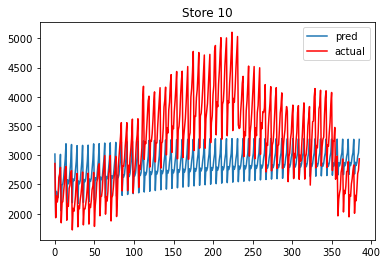

In [60]:
pyplot.plot(pred10)
pyplot.plot(test10,color='red')
plt.title("Store 10")
plt.legend(["pred","actual"],loc="best")
print(pred10)

In [61]:
rmse = sqrt(mean_squared_error(test10,pred10))
print("Store10 RMSE  - ",rmse)
print(" Sales Mean - ",S10['sales'].mean())

Store10 RMSE  -  741.1115693216101
 Sales Mean -  2935.464403066813


# ARIMA Model

In [62]:
#pip install pmdarima

In [63]:
from pmdarima import auto_arima
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [64]:
# Akaike's Information Criterion (AIC)

model1_stepwise_fit = auto_arima(X1,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26259.915, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27134.904, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26929.941, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26498.053, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27132.908, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26264.312, Time=0.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26405.486, Time=0.80 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25689.251, Time=1.86 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26245.422, Time=1.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=25784.812, Time=1.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25995.651, Time=1.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25995.875, Time=1.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=26038.287, Time=1.25 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=25557.393, Time=2.09 sec
 ARIMA(5,1,3)(0,0,0

In [65]:
model2_stepwise_fit = auto_arima(X2,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28406.044, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28190.268, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27764.000, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28404.048, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27690.633, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27677.773, Time=0.99 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=28159.788, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27504.651, Time=1.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=28066.283, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=27283.815, Time=1.47 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=27833.066, Time=0.18 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=27068.487, Time=1.13 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=27626.641, Time=0.28 sec
 ARIMA(5,1,2)(0,0,0)[0] i

In [66]:
model3_stepwise_fit = auto_arima(X3,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27087.420, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27958.536, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27747.107, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27319.014, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27956.541, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27082.288, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=27241.318, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27244.583, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27078.484, Time=1.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=27234.680, Time=1.03 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26791.153, Time=1.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.14 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=26606.019, Time=1.90 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=27051.958, Time=1.66 sec
 ARIMA(3,1,4)(0,0,0)[0] i

In [67]:
model4_stepwise_fit = auto_arima(X4,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26798.607, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27682.331, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27464.597, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27036.672, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27680.336, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26801.306, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26951.523, Time=1.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26519.191, Time=1.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26797.549, Time=1.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=26325.120, Time=1.96 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=26766.950, Time=1.63 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=26325.512, Time=2.45 sec
 ARIMA(2,1,5)(0,0,0)[0] interce

In [68]:
model5_stepwise_fit = auto_arima(X5,trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25619.470, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26489.989, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26274.976, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25848.114, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26487.994, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25624.906, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25761.776, Time=0.88 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25390.716, Time=1.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25620.729, Time=1.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25396.196, Time=1.37 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=25218.152, Time=1.89 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=25436.916, Time=1.95 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=25113.233, Time=2.80 sec
 ARIMA(4,1,4)(0,0,0)[0] i

In [69]:
model6_stepwise_fit = auto_arima(X6,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26495.156, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26277.055, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25842.520, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26493.160, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25772.994, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25759.342, Time=0.83 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=26241.648, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25598.487, Time=1.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=26151.055, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=25385.804, Time=1.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=25934.715, Time=0.16 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=25160.276, Time=1.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=25721.538, Time=0.25 sec
 ARIMA(5,1,2)(0,0,0)[0] i

In [70]:
model7_stepwise_fit = auto_arima(X7,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25310.469, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26187.750, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25968.400, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25529.656, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26185.754, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25314.335, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25448.004, Time=0.76 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24991.242, Time=2.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25292.296, Time=1.21 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=24851.945, Time=2.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=25089.402, Time=1.16 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=24144.739, Time=2.28 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=24866.036, Time=1.02 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=24514.153, Time=2.39 sec
 ARIMA(4,1,3)(0,0,0

In [71]:
model8_stepwise_fit = auto_arima(X8,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27377.158, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28252.997, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28029.812, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27598.994, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28251.002, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27352.315, Time=0.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=27527.484, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27529.646, Time=0.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27350.112, Time=1.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=27519.195, Time=1.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=27059.802, Time=1.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=26857.601, Time=1.96 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=27106.343, Time=1.90 sec
 ARIMA(3,1,4)(0,0,0)[0] i

In [72]:
model9_stepwise_fit = auto_arima(X9,trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26829.366, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27703.763, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27486.561, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27060.418, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27701.768, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26833.675, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26974.854, Time=0.90 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26561.819, Time=1.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26830.530, Time=1.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26565.239, Time=1.97 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=26377.317, Time=1.75 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=26607.444, Time=1.64 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=26341.273, Time=2.34 sec
 ARIMA(4,1,4)(0,0,0)[0] i

In [73]:
model10_stepwise_fit = auto_arima(X10,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27059.641, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27915.722, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27696.428, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27274.946, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27913.726, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27039.824, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=27199.362, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27200.821, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27036.530, Time=1.29 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=27187.747, Time=1.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26726.363, Time=1.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.30 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=26537.782, Time=1.83 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=26791.533, Time=1.74 sec
 ARIMA(3,1,4)(0,0,0)[0] i

 ARIMA Model

In [74]:
from statsmodels.tsa.arima.model import ARIMA

In [75]:
print("Store1 Train data shape : ",train1.shape,"Store1 Test data shape : ",test1.shape)
print("Store2 Train data shape : ",train2.shape,"Store2 Test data shape : ",test2.shape)
print("Store3 Train data shape : ",train3.shape,"Store3 Test data shape : ",test3.shape)
print("Store4 Train data shape : ",train4.shape,"Store4 Test data shape : ",test4.shape)
print("Store5 Train data shape : ",train5.shape,"Store5 Test data shape : ",test5.shape)
print("Store6 Train data shape : ",train6.shape,"Store6 Test data shape : ",test6.shape)
print("Store7 Train data shape : ",train7.shape,"Store7 Test data shape : ",test7.shape)
print("Store8 Train data shape : ",train8.shape,"Store8 Test data shape : ",test8.shape)
print("Store9 Train data shape : ",train9.shape,"Store9 Test data shape : ",test9.shape)
print("Store10 Train data shape : ",train10.shape,"Store10 Test data shape : ",test10.shape)

Store1 Train data shape :  (1440,) Store1 Test data shape :  (386,)
Store2 Train data shape :  (1440,) Store2 Test data shape :  (386,)
Store3 Train data shape :  (1440,) Store3 Test data shape :  (386,)
Store4 Train data shape :  (1440,) Store4 Test data shape :  (386,)
Store5 Train data shape :  (1440,) Store5 Test data shape :  (386,)
Store6 Train data shape :  (1440,) Store6 Test data shape :  (386,)
Store7 Train data shape :  (1440,) Store7 Test data shape :  (386,)
Store8 Train data shape :  (1440,) Store8 Test data shape :  (386,)
Store9 Train data shape :  (1440,) Store9 Test data shape :  (386,)
Store10 Train data shape :  (1440,) Store10 Test data shape :  (386,)


Train Model

In [76]:
ARI_model1=ARIMA(train1,order=(5,1,2))
ari_model1=ARI_model1.fit()
ari_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -9818.534
Date:                Wed, 08 Feb 2023   AIC                          19653.069
Time:                        08:33:10   BIC                          19695.243
Sample:                             0   HQIC                         19668.813
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0311      0.013     -2.325      0.020      -0.057      -0.005
ar.L2         -0.5218      0.015    -34.661      0.000      -0.551      -0.492
ar.L3         -0.4306      0.017    -25.417      0.000      -0.464      -0.397
ar.L4         -0.4320      0.015    -28.866      0.000      -0.461      -0.403
ar.L5         -0.5442      0.015    -36.657      0.000      -0.573      -0.515
ma.L1         -1.1452      0.007   -171.078      0.000      -1.158      -1.132
ma.L2          0.9254      0.006    152.748      0.000       0.913       0.937
sigma2       2.36e+04    418.552     56.393      0.000    2.28e+04    2.44e+04
===================================================================================
Ljung-Box (L1) (Q):                  33.33   Jarque-Bera (JB):               177.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
ARI_model2=ARIMA(train2,order=(5,1,2))
ari_model2=ARI_model2.fit()
ari_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -10340.017
Date:                Wed, 08 Feb 2023   AIC                          20696.035
Time:                        08:33:11   BIC                          20738.208
Sample:                             0   HQIC                         20711.779
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0881      0.013     -6.621      0.000      -0.114      -0.062
ar.L2         -0.4593      0.014    -32.676      0.000      -0.487      -0.432
ar.L3         -0.4972      0.015    -32.142      0.000      -0.528      -0.467
ar.L4         -0.4104      0.014    -29.425      0.000      -0.438      -0.383
ar.L5         -0.5627      0.015    -38.702      0.000      -0.591      -0.534
ma.L1         -1.1284      0.007   -156.379      0.000      -1.143      -1.114
ma.L2          0.9128      0.007    132.666      0.000       0.899       0.926
sigma2      4.453e+04    762.131     58.430      0.000     4.3e+04     4.6e+04
===================================================================================
Ljung-Box (L1) (Q):                  29.74   Jarque-Bera (JB):               137.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
ARI_model3=ARIMA(train3,order=(1,1,5))
ari_model3=ARI_model3.fit()
ari_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(1, 1, 5)   Log Likelihood              -10364.362
Date:                Wed, 08 Feb 2023   AIC                          20742.724
Time:                        08:33:12   BIC                          20779.626
Sample:                             0   HQIC                         20756.500
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7305      0.025    -28.734      0.000      -0.780      -0.681
ma.L1          0.3244      0.020     15.877      0.000       0.284       0.364
ma.L2         -0.8189      0.019    -43.676      0.000      -0.856      -0.782
ma.L3         -0.7787      0.021    -36.383      0.000      -0.821      -0.737
ma.L4          0.1524      0.020      7.741      0.000       0.114       0.191
ma.L5          0.7371      0.016     45.059      0.000       0.705       0.769
sigma2      1.052e+05   4152.291     25.335      0.000    9.71e+04    1.13e+05
===================================================================================
Ljung-Box (L1) (Q):                  16.96   Jarque-Bera (JB):                68.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
ARI_model4=ARIMA(train4,order=(1,1,5))
ari_model4=ARI_model4.fit()
ari_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(1, 1, 5)   Log Likelihood              -10247.315
Date:                Wed, 08 Feb 2023   AIC                          20508.631
Time:                        08:33:13   BIC                          20545.532
Sample:                             0   HQIC                         20522.406
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7172      0.025    -28.170      0.000      -0.767      -0.667
ma.L1          0.3021      0.021     14.662      0.000       0.262       0.343
ma.L2         -0.8062      0.018    -44.627      0.000      -0.842      -0.771
ma.L3         -0.7778      0.020    -38.803      0.000      -0.817      -0.739
ma.L4          0.1281      0.019      6.797      0.000       0.091       0.165
ma.L5          0.7435      0.016     46.279      0.000       0.712       0.775
sigma2      8.913e+04   3569.498     24.969      0.000    8.21e+04    9.61e+04
===================================================================================
Ljung-Box (L1) (Q):                  15.72   Jarque-Bera (JB):                59.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
ARI_model5=ARIMA(train5,order=(5,1,5))
ari_model5=ARI_model5.fit()
ari_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9693.898
Date:                Wed, 08 Feb 2023   AIC                          19409.797
Time:                        08:33:15   BIC                          19467.785
Sample:                             0   HQIC                         19431.444
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3620      0.074     -4.877      0.000      -0.507      -0.217
ar.L2         -0.2772      0.054     -5.156      0.000      -0.383      -0.172
ar.L3         -0.4329      0.040    -10.762      0.000      -0.512      -0.354
ar.L4         -0.7443      0.055    -13.444      0.000      -0.853      -0.636
ar.L5         -0.4230      0.075     -5.626      0.000      -0.570      -0.276
ma.L1         -0.5911      0.062     -9.555      0.000      -0.712      -0.470
ma.L2          0.2370      0.048      4.943      0.000       0.143       0.331
ma.L3         -0.1084      0.047     -2.301      0.021      -0.201      -0.016
ma.L4          0.7943      0.046     17.285      0.000       0.704       0.884
ma.L5         -0.6104      0.062     -9.913      0.000      -0.731      -0.490
sigma2      7.262e+04   4383.263     16.568      0.000     6.4e+04    8.12e+04
===================================================================================
Ljung-Box (L1) (Q):                  38.09   Jarque-Bera (JB):                23.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
ARI_model6=ARIMA(train6,order=(5,1,2))
ari_model6=ARI_model6.fit()
ari_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -9572.721
Date:                Wed, 08 Feb 2023   AIC                          19161.442
Time:                        08:33:16   BIC                          19203.615
Sample:                             0   HQIC                         19177.186
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0883      0.013     -6.738      0.000      -0.114      -0.063
ar.L2         -0.4974      0.014    -35.685      0.000      -0.525      -0.470
ar.L3         -0.4916      0.016    -31.313      0.000      -0.522      -0.461
ar.L4         -0.3965      0.014    -27.613      0.000      -0.425      -0.368
ar.L5         -0.6062      0.014    -42.047      0.000      -0.634      -0.578
ma.L1         -1.1132      0.008   -138.640      0.000      -1.129      -1.097
ma.L2          0.8960      0.008    113.087      0.000       0.881       0.912
sigma2      1.652e+04    295.030     55.999      0.000    1.59e+04    1.71e+04
===================================================================================
Ljung-Box (L1) (Q):                  42.55   Jarque-Bera (JB):               124.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
ARI_model7=ARIMA(train7,order=(5,1,2))
ari_model7=ARI_model7.fit()
ari_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -9464.407
Date:                Wed, 08 Feb 2023   AIC                          18944.814
Time:                        08:33:17   BIC                          18986.987
Sample:                             0   HQIC                         18960.557
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0334      0.014     -2.324      0.020      -0.061      -0.005
ar.L2         -0.4967      0.014    -34.702      0.000      -0.525      -0.469
ar.L3         -0.4621      0.016    -28.230      0.000      -0.494      -0.430
ar.L4         -0.4087      0.015    -27.931      0.000      -0.437      -0.380
ar.L5         -0.5448      0.016    -34.975      0.000      -0.575      -0.514
ma.L1         -1.1469      0.008   -135.272      0.000      -1.164      -1.130
ma.L2          0.9022      0.008    110.876      0.000       0.886       0.918
sigma2      1.424e+04    259.829     54.804      0.000    1.37e+04    1.47e+04
===================================================================================
Ljung-Box (L1) (Q):                  27.40   Jarque-Bera (JB):               143.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
ARI_model8=ARIMA(train8,order=(1,1,5))
ari_model8=ARI_model8.fit()
ari_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(1, 1, 5)   Log Likelihood              -10461.059
Date:                Wed, 08 Feb 2023   AIC                          20936.119
Time:                        08:33:18   BIC                          20973.021
Sample:                             0   HQIC                         20949.895
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7433      0.023    -31.739      0.000      -0.789      -0.697
ma.L1          0.3293      0.019     17.748      0.000       0.293       0.366
ma.L2         -0.8175      0.019    -43.166      0.000      -0.855      -0.780
ma.L3         -0.8097      0.021    -38.805      0.000      -0.851      -0.769
ma.L4          0.1273      0.020      6.503      0.000       0.089       0.166
ma.L5          0.7641      0.016     47.308      0.000       0.732       0.796
sigma2      1.205e+05   4988.888     24.144      0.000    1.11e+05     1.3e+05
===================================================================================
Ljung-Box (L1) (Q):                  12.73   Jarque-Bera (JB):                49.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
ARI_model9=ARIMA(train9,order=(5,1,4))
ari_model9=ARI_model9.fit()
ari_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(5, 1, 4)   Log Likelihood              -10147.341
Date:                Wed, 08 Feb 2023   AIC                          20314.681
Time:                        08:33:20   BIC                          20367.398
Sample:                             0   HQIC                         20334.361
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4704      0.097     -4.871      0.000      -0.660      -0.281
ar.L2         -0.0402      0.077     -0.525      0.599      -0.190       0.110
ar.L3         -0.6498      0.043    -15.126      0.000      -0.734      -0.566
ar.L4         -0.6618      0.069     -9.544      0.000      -0.798      -0.526
ar.L5         -0.4055      0.099     -4.087      0.000      -0.600      -0.211
ma.L1         -0.6694      0.089     -7.509      0.000      -0.844      -0.495
ma.L2         -0.1270      0.043     -2.936      0.003      -0.212      -0.042
ma.L3          1.0106      0.040     25.501      0.000       0.933       1.088
ma.L4         -0.4649      0.088     -5.297      0.000      -0.637      -0.293
sigma2      1.381e+05   8334.947     16.572      0.000    1.22e+05    1.54e+05
===================================================================================
Ljung-Box (L1) (Q):                  10.43   Jarque-Bera (JB):                81.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
ARI_model10=ARIMA(train10,order=(1,1,5))
ari_model10=ARI_model10.fit()
ari_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(1, 1, 5)   Log Likelihood              -10526.260
Date:                Wed, 08 Feb 2023   AIC                          21066.520
Time:                        08:33:21   BIC                          21103.422
Sample:                             0   HQIC                         21080.296
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8201      0.115      7.100      0.000       0.594       1.046
ma.L1         -1.4714      0.106    -13.902      0.000      -1.679      -1.264
ma.L2          0.3074      0.076      4.067      0.000       0.159       0.456
ma.L3         -0.4192      0.054     -7.772      0.000      -0.525      -0.314
ma.L4          1.3054      0.078     16.713      0.000       1.152       1.458
ma.L5         -0.6920      0.073     -9.532      0.000      -0.834      -0.550
sigma2      2.109e+05   1.37e+04     15.349      0.000    1.84e+05    2.38e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                33.17
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Predictions on Test data

In [86]:
#ARI_pred1.index=S1.index[len(train4):len(X4-1)]
#print(len(train1))
#print(len(X1))

In [87]:
ARI_pred1=ari_model1.predict(start=len(train1),end=len(X1)-1,type='levels')
print(ARI_pred1)

[1959.79301562 1758.26396427 1685.2468681  1710.64903401 1870.0669453
 2097.81364584 2137.8252915  1977.85573764 1781.18879298 1668.40689482
 1702.19501949 1892.01324923 2089.06124264 2125.08459862 1986.18510302
 1786.46723945 1661.22028399 1706.34427719 1896.69680618 2083.03200152
 2121.27330758 1989.55151927 1786.66634211 1661.15435896 1709.72041225
 1897.16040794 2079.36621774 2119.61166846 1989.89382914 1787.06370552
 1663.01018337 1712.0207294  1896.7057998  2077.02292572 2117.91324714
 1989.36148512 1787.92009668 1665.25238228 1713.74232241 1896.26775989
 2075.09242828 2116.02583753 1988.65221251 1789.01064001 1667.47366818
 1715.27556309 1895.92493921 2073.26139653 2114.04836234 1987.9455814
 1790.16663716 1669.63553721 1716.76013567 1895.63432423 2071.4500105
 2112.0540386  1987.26010143 1791.32624234 1671.75661476 1718.23157262
 1895.36388162 2069.64934778 2110.07016953 1986.58788795 1792.47379645
 1673.85103205 1719.69406204 1895.10139772 2067.86257302 2108.10364389
 1985.922

In [88]:
ARI_pred2=ari_model2.predict(start=len(train2),end=len(X2)-1,type='levels')
print(ARI_pred2)

[2866.91763323 2530.9761276  2342.04732104 2497.63953697 2683.11755243
 2975.14804511 3053.41754229 2862.60599889 2534.58800742 2388.00021074
 2450.02580054 2709.26724965 2972.80919708 3044.39678575 2845.15659037
 2557.49022388 2384.72993041 2453.48872998 2711.31312881 2973.0836856
 3030.16690139 2845.68552955 2561.05532139 2389.98485475 2456.81065971
 2714.62356235 2966.89255979 3023.37733837 2843.16124893 2564.24712719
 2394.91738034 2462.43513791 2715.13152989 2961.92208045 3016.9649408
 2840.67302261 2566.51011322 2400.80350818 2467.54273441 2715.48184217
 2957.08963045 3011.0010757  2837.83584974 2568.88470533 2406.64911881
 2472.51440906 2715.69807606 2952.50210657 3005.09864078 2835.02601145
 2571.23838775 2412.42839495 2477.32491887 2715.92359046 2948.01397869
 2999.30231385 2832.26002075 2573.57691764 2418.09009087 2482.03147085
 2716.14210728 2943.61423128 2993.60988804 2829.55658263 2575.87963078
 2423.64221203 2486.64065438 2716.3532094  2939.29384959 2988.027414
 2826.9123

In [89]:
ARI_pred3=ari_model3.predict(start=len(train3),end=len(X3)-1,type='levels')
print(ARI_pred3)

[2180.14408766 1697.9330579  1905.63462003 1962.00156508 2131.79951142
 2007.76973114 2098.36791992 2032.19000852 2080.53000313 2045.21980628
 2071.01232057 2052.17204629 2065.93402121 2055.88151609 2063.22441998
 2057.86075819 2061.77867244 2058.9168119  2061.0072726  2059.48028486
 2060.59568088 2059.78093414 2060.37607008 2059.94134998 2060.2588935
 2060.02694221 2060.19637222 2060.0726112  2060.16301307 2060.09697856
 2060.14521381 2060.10998013 2060.13571675 2060.1169173  2060.13064946
 2060.12061873 2060.12794573 2060.12259369 2060.12650311 2060.12364745
 2060.12573338 2060.1242097  2060.12532268 2060.1245097  2060.12510355
 2060.12466977 2060.12498663 2060.12475518 2060.12492424 2060.12480075
 2060.12489095 2060.12482506 2060.12487319 2060.12483804 2060.12486372
 2060.12484496 2060.12485866 2060.12484865 2060.12485596 2060.12485062
 2060.12485452 2060.12485167 2060.12485375 2060.12485223 2060.12485334
 2060.12485253 2060.12485313 2060.12485269 2060.12485301 2060.12485278
 2060.1

In [90]:
ARI_pred4=ari_model4.predict(start=len(train4),end=len(X4)-1,type='levels')
print(ARI_pred4)

[2036.69138876 1551.87931891 1739.03053137 1773.46569069 1997.14377133
 1836.71197154 1951.78074498 1869.24833783 1928.44422587 1885.98632016
 1916.4390056  1894.59699444 1910.26304965 1899.02666285 1907.0858958
 1901.30545793 1905.4514433  1902.47775946 1904.61061687 1903.08083732
 1904.17806278 1903.39108421 1903.95554001 1903.55068738 1903.84106557
 1903.6327935  1903.78217543 1903.67503211 1903.75188003 1903.69676131
 1903.73629489 1903.70793966 1903.72827728 1903.71369024 1903.72415271
 1903.71664857 1903.72203087 1903.71817044 1903.72093931 1903.71895336
 1903.72037777 1903.71935612 1903.72008889 1903.71956332 1903.71994028
 1903.71966991 1903.71986383 1903.71972474 1903.7198245  1903.71975295
 1903.71980427 1903.71976746 1903.71979386 1903.71977493 1903.71978851
 1903.71977877 1903.71978575 1903.71978074 1903.71978434 1903.71978176
 1903.71978361 1903.71978228 1903.71978323 1903.71978255 1903.71978304
 1903.71978269 1903.71978294 1903.71978276 1903.71978289 1903.7197828
 1903.71

In [91]:
ARI_pred5=ari_model5.predict(start=len(train5),end=len(X5)-1,type='levels')
print(ARI_pred5)

[1795.20886653 1536.28955904 1383.13962199 1484.02871301 1589.02875796
 1786.63231551 1865.84685726 1726.6302966  1548.6874311  1425.90308077
 1437.39119975 1614.41443996 1791.64464786 1840.10888338 1740.19087115
 1549.57877442 1418.4928594  1450.9930563  1611.95415427 1785.5719975
 1842.23951436 1735.17886551 1549.50825783 1424.54636878 1451.97412792
 1612.78050977 1784.55312823 1837.47859184 1733.53585029 1550.83384789
 1426.99179577 1455.40737184 1613.52294389 1781.98234787 1834.33613528
 1731.47471443 1551.55900123 1430.26048814 1458.34193479 1614.1041169
 1779.87560757 1830.9275226  1729.47398715 1552.46618854 1433.28458207
 1461.29021888 1614.73696458 1777.69119586 1827.63181204 1727.52481738
 1553.31276878 1436.30339843 1464.18371935 1615.33120473 1775.56153223
 1824.38027016 1725.60420363 1554.16497926 1439.26872193 1467.02662406
 1615.91621229 1773.45612323 1821.18184495 1723.72192446 1555.00636396
 1442.19019502 1469.82201156 1616.48425962 1771.38085034 1818.03500162
 1721.87

In [92]:
ARI_pred6=ari_model6.predict(start=len(train6),end=len(X6)-1,type='levels')
print(ARI_pred6)

[1731.72833475 1498.89740366 1435.37904186 1454.82226197 1620.54154074
 1747.83801909 1810.94897386 1691.38947727 1530.47642865 1422.18446483
 1468.36326718 1606.40402643 1760.77069676 1796.27007916 1695.83273261
 1528.42390179 1430.8147941  1464.41812923 1610.60557982 1756.23948165
 1794.34216906 1692.52341827 1532.6282494  1432.28706604 1467.33525713
 1610.02972859 1754.45474869 1790.2194935  1692.00893835 1534.06152287
 1435.49998553 1469.3082781  1610.25613552 1751.61748417 1787.24454368
 1690.84138658 1535.75327135 1438.3816474  1471.68603705 1610.04767906
 1749.0735636  1784.23566712 1689.78505296 1537.23492515 1441.39052539
 1473.93800995 1609.86680674 1746.54310814 1781.35064413 1688.67028287
 1538.71883081 1444.34531973 1476.16509525 1609.66201168 1744.08826361
 1778.50316053 1687.5690073  1540.17027442 1447.26233518 1478.34430608
 1609.46808408 1741.67953507 1775.70439578 1686.47703599 1541.59870673
 1450.12792988 1480.48765355 1609.28098708 1739.31680445 1772.95014291
 1685.

In [93]:
ARI_pred7=ari_model7.predict(start=len(train7),end=len(X7)-1,type='levels')
print(ARI_pred7)

[1573.94558383 1386.49742786 1282.03918255 1349.19532492 1472.68329567
 1622.21487248 1669.66879506 1566.21423943 1389.94805364 1296.90298429
 1334.50637484 1477.34209481 1625.28968648 1666.08468656 1560.55932271
 1396.59470768 1297.35154203 1333.59238176 1478.34233881 1625.867428
 1662.18651846 1560.06937393 1398.36956461 1298.55583214 1334.17535742
 1479.22854137 1624.53340374 1660.06234856 1559.4990547  1399.38032557
 1299.84928909 1335.4885462  1479.46553421 1623.17318174 1658.30396455
 1558.88251195 1400.09054701 1301.3711097  1336.82954105 1479.54664503
 1621.84683964 1656.6794354  1558.18092648 1400.77002027 1302.94542759
 1338.15019035 1479.57839786 1620.56689047 1655.08257324 1557.45789457
 1401.44628606 1304.5256515  1339.44556366 1479.60323427 1619.30999298
 1653.49939025 1556.73326419 1402.12175607 1306.09472253 1340.72429397
 1479.62773438 1618.06772296 1651.92856791 1556.01398885 1402.79335338
 1307.64975668 1341.98992131 1479.6525109  1616.83710341 1650.37112043
 1555.30

In [94]:
ARI_pred8=ari_model8.predict(start=len(train8),end=len(X8)-1,type='levels')
print(ARI_pred8)

[2468.57577896 1743.66083483 2020.63475335 2092.95521645 2284.75737832
 2142.19360805 2248.15919465 2169.39650815 2227.93967281 2184.42538603
 2216.76892545 2192.72844082 2210.59738502 2197.31565748 2207.18777329
 2199.84997252 2205.30405361 2201.2501141  2204.26334865 2202.02365503
 2203.68838687 2202.45101579 2203.3707358  2202.68712123 2203.19524205
 2202.8175632  2203.09828642 2202.88962891 2203.04472102 2202.9294433
 2203.01512756 2202.95143969 2202.99877796 2202.96359211 2202.98974524
 2202.970306   2202.98475491 2202.97401524 2202.98199788 2202.9760645
 2202.9804747  2202.97719666 2202.97963318 2202.97782215 2202.97916826
 2202.97816772 2202.97891141 2202.97835863 2202.9787695  2202.97846411
 2202.9786911  2202.97852238 2202.97864779 2202.97855458 2202.97862386
 2202.97857236 2202.97861064 2202.97858219 2202.97860334 2202.97858762
 2202.9785993  2202.97859062 2202.97859707 2202.97859227 2202.97859584
 2202.97859319 2202.97859516 2202.97859369 2202.97859478 2202.97859397
 2202.97

In [95]:
ARI_pred9=ari_model9.predict(start=len(train9),end=len(X9)-1,type='levels')
print(ARI_pred9)

[2387.55551937 2000.58879382 1949.05880949 2019.90633711 2244.96477104
 2469.78519488 2499.95854977 2304.48904008 2071.46920755 1929.29705397
 2021.43169579 2252.34706639 2465.8712682  2484.84668148 2313.9618133
 2064.66068146 1941.5351167  2021.38074533 2256.16237593 2456.79048983
 2483.66015797 2307.47708421 2071.15543916 1943.97398835 2028.65363442
 2253.19522771 2454.64053461 2475.81722253 2307.37906986 2071.9283986
 1951.33670803 2031.28477753 2254.40434753 2448.70979382 2471.66286888
 2304.05930247 2075.64387596 1955.85643972 2036.32061682 2253.32085099
 2444.96738448 2465.69690498 2302.55498361 2077.69827273 1961.74324801
 2039.91196501 2253.47447362 2440.17585338 2460.88223736 2300.148947
 2080.5793358  1966.72194317 2044.1467295  2252.95464481 2436.083934
 2455.61319526 2298.30858335 2082.94272051 1972.02677328 2047.89831124
 2252.79529248 2431.74314961 2450.75479661 2296.23832252 2085.51683219
 1976.99339705 2051.77906805 2252.43746485 2427.6640766  2445.83569289
 2294.366724

In [96]:
ARI_pred10=ari_model10.predict(start=len(train10),end=len(X10)-1,type='levels')
print(ARI_pred10)

[2116.80085631 1931.09154935 2150.24707233 2297.11083157 2336.6134673
 2369.00887686 2395.57577655 2417.36281886 2435.22998508 2449.88253058
 2461.89882276 2471.75317043 2479.83454583 2486.46193819 2491.89694488
 2496.35409729 2500.00932877 2503.00691915 2505.46518975 2507.48117378
 2509.13444646 2510.490266   2511.60214952 2512.51398543 2513.26176585
 2513.87500729 2514.3779157  2514.79034194 2515.12856538 2515.40593641
 2515.63340346 2515.81994514 2515.97292467 2516.09838045 2516.20126452
 2516.28563791 2516.35483103 2516.41157507 2516.45810986 2516.49627221
 2516.52756847 2516.55323398 2516.57428181 2516.59154276 2516.60569816
 2516.61730675 2516.62682675 2516.63463393 2516.64103646 2516.64628707
 2516.65059299 2516.65412421 2516.65702009 2516.65939495 2516.66134254
 2516.66293972 2516.66424953 2516.66532369 2516.66620459 2516.666927
 2516.66751943 2516.66800528 2516.66840371 2516.66873046 2516.66899842
 2516.66921817 2516.66939838 2516.66954617 2516.66966737 2516.66976676
 2516.669

Text(0.5, 1.0, 'Store 1')

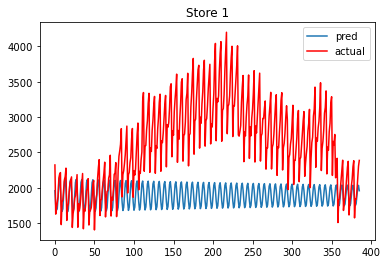

In [97]:
pyplot.plot(ARI_pred1)
pyplot.plot(test1,color="r")
plt.legend(["pred","actual"],loc="best")
plt.title("Store 1")

In [98]:
rmse = sqrt(mean_squared_error(test1,ARI_pred1))
print("Store1 RMSE  - ",rmse)
print(" Sales Mean - ",S1['sales'].mean())

Store1 RMSE  -  920.5855122387214
 Sales Mean -  2363.4189485213583


Text(0.5, 1.0, 'Store 2')

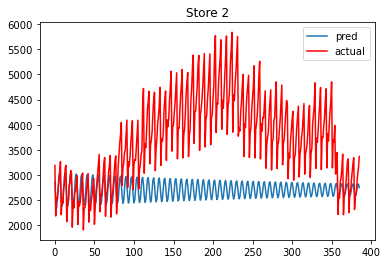

In [99]:
pyplot.plot(ARI_pred2)
pyplot.plot(test2,color="r")
plt.legend(["pred","actual"],loc="best")
plt.title("Store 2")

In [100]:
rmse = sqrt(mean_squared_error(test2,ARI_pred2))
print("Store2 RMSE  - ",rmse)
print(" Sales Mean - ",S2['sales'].mean())

Store2 RMSE  -  1287.6089986305108
 Sales Mean -  3351.658269441402


Text(0.5, 1.0, 'Store 3')

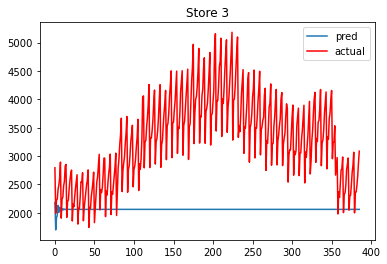

In [101]:
pyplot.plot(ARI_pred3)
pyplot.plot(test3,color="r")
plt.legend(["pred","actual"],loc="best")
plt.title("Store 3")

In [102]:
rmse = sqrt(mean_squared_error(test4,ARI_pred4))
print("Stor4e RMSE  - ",rmse)
print(" Sales Mean - ",S4['sales'].mean())

Stor4e RMSE  -  1334.7331098353459
 Sales Mean -  2745.147316538883


Text(0.5, 1.0, 'Store 4')

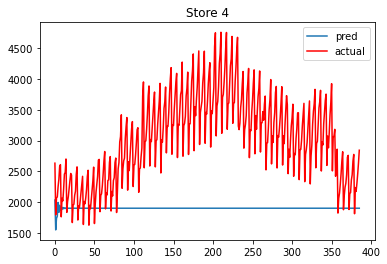

In [103]:
pyplot.plot(ARI_pred4)
pyplot.plot(test4,color="r")
plt.legend(["pred","actual"],loc="best")
plt.title("Store 4")

In [104]:
rmse = sqrt(mean_squared_error(test5,ARI_pred5))
print("Store5 RMSE  - ",rmse)
print(" Sales Mean - ",S5['sales'].mean())

Store5 RMSE  -  745.7731746979679
 Sales Mean -  1988.5082146768893


Text(0.5, 1.0, 'Store 6')

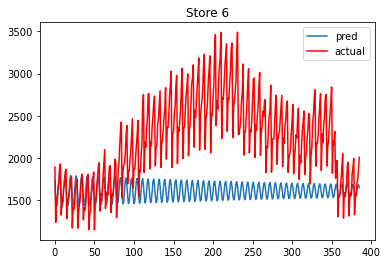

In [105]:
pyplot.plot(ARI_pred6)
pyplot.plot(test6,color="r")
plt.legend(["pred","actual"],loc="best")
plt.title("Store 6")

In [106]:
rmse = sqrt(mean_squared_error(test6,ARI_pred6))
print("Store6 RMSE  - ",rmse)
print(" Sales Mean - ",S6['sales'].mean())

Store6 RMSE  -  759.9476517462679
 Sales Mean -  1986.6757940854327


Text(0.5, 1.0, 'Store 7')

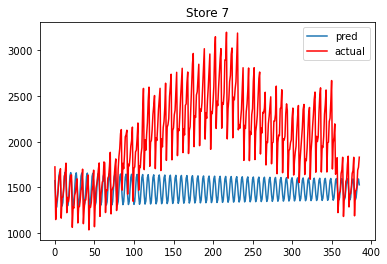

In [107]:
pyplot.plot(ARI_pred7)
pyplot.plot(test7,color="r")
plt.legend(["pred","actual"],loc="best")
plt.title("Store 7")

In [108]:
rmse = sqrt(mean_squared_error(test7,ARI_pred7))
print("Store7 RMSE  - ",rmse)
print(" Sales Mean - ",S7['sales'].mean())

Store7 RMSE  -  689.9272722257298
 Sales Mean -  1818.186746987952


Text(0.5, 1.0, 'Store 8')

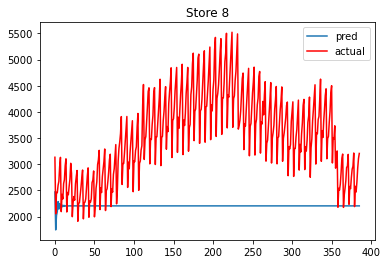

In [109]:
pyplot.plot(ARI_pred8)
pyplot.plot(test8,color="r")
plt.legend(["pred","actual"],loc="best")
plt.title("Store 8")

In [110]:
rmse = sqrt(mean_squared_error(test7,ARI_pred7))
print("Store7 RMSE  - ",rmse)
print(" Sales Mean - ",S7['sales'].mean())

Store7 RMSE  -  689.9272722257298
 Sales Mean -  1818.186746987952


Text(0.5, 1.0, 'Store 8')

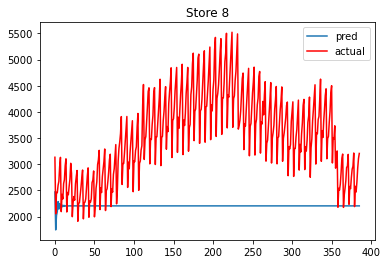

In [111]:
pyplot.plot(ARI_pred8)
pyplot.plot(test8,color="r")
plt.legend(["pred","actual"],loc="best")
plt.title("Store 8")

In [112]:
rmse = sqrt(mean_squared_error(test8,ARI_pred8))
print("Store8 RMSE  - ",rmse)
print(" Sales Mean - ",S8['sales'].mean())

Store8 RMSE  -  1578.2459605099655
 Sales Mean -  3207.102409638554


Text(0.5, 1.0, 'Store 9')

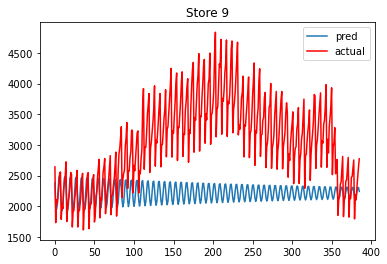

In [113]:
pyplot.plot(ARI_pred9)
pyplot.plot(test9,color="r")
plt.legend(["pred","actual"],loc="best")
plt.title("Store 9")

In [114]:
rmse = sqrt(mean_squared_error(test9,ARI_pred9))
print("Store9 RMSE  - ",rmse)
print(" Sales Mean - ",S9['sales'].mean())

Store9 RMSE  -  1062.7044252227179
 Sales Mean -  2752.4512595837896


Text(0.5, 1.0, 'Store 10')

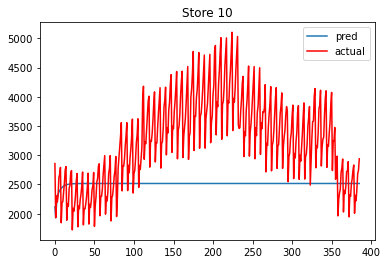

In [115]:
pyplot.plot(ARI_pred10)
pyplot.plot(test10,color="r")
plt.legend(["pred","actual"],loc="best")
plt.title("Store 10")

In [116]:
rmse = sqrt(mean_squared_error(test10,ARI_pred10))
print("Store10 RMSE  - ",rmse)
print(" Sales Mean - ",S10['sales'].mean())

Store10 RMSE  -  1045.1358245428792
 Sales Mean -  2935.464403066813


                                              *****************

Pre Processing the data(Linear Regression,XGB Regressor)

In [117]:
data

date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

[913000 rows x 4 columns]

In [118]:
xgb_data=data.copy()
xgb_data['date']=pd.to_datetime(data['date'])
xgb_data.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [119]:
For_day= xgb_data.date.apply(lambda x: str(x)[:-9])
For_day

0         2013-01-01
1         2013-01-02
2         2013-01-03
3         2013-01-04
4         2013-01-05
             ...    
912995    2017-12-27
912996    2017-12-28
912997    2017-12-29
912998    2017-12-30
912999    2017-12-31
Name: date, Length: 913000, dtype: object

In [120]:
#Funtion to group sales with date and store

def sales_D_M_or_Y(df, time=["daily", 'monthly','yearly']):
    df= df.copy()
    if time == "daily":
        # Drop the hour indicators from date column:
        df.date= df.date.apply(lambda x: str(x)[:])
    elif time == "monthly":
        # Drop the day and hour indicators from the date column:
        df.date= df.date.apply(lambda x: str(x)[:-12])
    else:
        # Drop the Month,day and hour indicators from the date column:
        df.date= df.date.apply(lambda x: str(x)[:4])
        
   
    df= df.groupby(['date','store'])['sales'].sum().reset_index()
    df.date= pd.to_datetime(df.date)
        
    return df

In [121]:
#Daily sales

df_day= sales_D_M_or_Y(xgb_data, "daily")
df_day.head()

date  store  sales
0 2013-01-01      1   1316
1 2013-01-01      2   1742
2 2013-01-01      3   1588
3 2013-01-01      4   1423
4 2013-01-01      5   1032

In [122]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18260 entries, 0 to 18259
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18260 non-null  datetime64[ns]
 1   store   18260 non-null  int64         
 2   sales   18260 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.1 KB


In [123]:
#Store-wise sales

xgb_S1 =df_day[df_day['store']==1]
xgb_S2 =df_day[df_day['store']==2]
xgb_S3 =df_day[df_day['store']==3]
xgb_S4 =df_day[df_day['store']==4]
xgb_S5 =df_day[df_day['store']==5]
xgb_S6 =df_day[df_day['store']==6]
xgb_S7 =df_day[df_day['store']==7]
xgb_S8 =df_day[df_day['store']==8]
xgb_S9 =df_day[df_day['store']==9]
xgb_S10 =df_day[df_day['store']==10]



In [124]:
#Store 1 data 

xgb_S1=xgb_S1.set_index('date')
xgb_S1

store  sales
date                    
2013-01-01      1   1316
2013-01-02      1   1264
2013-01-03      1   1305
2013-01-04      1   1452
2013-01-05      1   1499
...           ...    ...
2017-12-27      1   1837
2017-12-28      1   1951
2017-12-29      1   2116
2017-12-30      1   2304
2017-12-31      1   2388

[1826 rows x 2 columns]

In [125]:

xgb_S2=xgb_S2.set_index('date')
xgb_S2

store  sales
date                    
2013-01-01      2   1742
2013-01-02      2   1808
2013-01-03      2   1887
2013-01-04      2   1983
2013-01-05      2   2087
...           ...    ...
2017-12-27      2   2624
2017-12-28      2   2839
2017-12-29      2   3025
2017-12-30      2   3151
2017-12-31      2   3370

[1826 rows x 2 columns]

In [126]:
xgb_S3=xgb_S3.set_index('date')
xgb_S3

store  sales
date                    
2013-01-01      3   1588
2013-01-02      3   1538
2013-01-03      3   1635
2013-01-04      3   1741
2013-01-05      3   1887
...           ...    ...
2017-12-27      3   2365
2017-12-28      3   2479
2017-12-29      3   2646
2017-12-30      3   2885
2017-12-31      3   3086

[1826 rows x 2 columns]

In [127]:
xgb_S4=xgb_S4.set_index('date')
xgb_S4

store  sales
date                    
2013-01-01      4   1423
2013-01-02      4   1432
2013-01-03      4   1534
2013-01-04      4   1685
2013-01-05      4   1649
...           ...    ...
2017-12-27      4   2176
2017-12-28      4   2306
2017-12-29      4   2460
2017-12-30      4   2637
2017-12-31      4   2844

[1826 rows x 2 columns]

In [128]:
xgb_S5=xgb_S5.set_index('date')
xgb_S5

store  sales
date                    
2013-01-01      5   1032
2013-01-02      5    997
2013-01-03      5   1130
2013-01-04      5   1258
2013-01-05      5   1154
...           ...    ...
2017-12-27      5   1552
2017-12-28      5   1696
2017-12-29      5   1774
2017-12-30      5   1922
2017-12-31      5   1974

[1826 rows x 2 columns]

In [129]:
xgb_S6=xgb_S6.set_index('date')
xgb_S6

store  sales
date                    
2013-01-01      6   1099
2013-01-02      6   1023
2013-01-03      6   1149
2013-01-04      6   1201
2013-01-05      6   1286
...           ...    ...
2017-12-27      6   1560
2017-12-28      6   1707
2017-12-29      6   1737
2017-12-30      6   1877
2017-12-31      6   2009

[1826 rows x 2 columns]

In [130]:
xgb_S7=xgb_S7.set_index('date')
xgb_S7

store  sales
date                    
2013-01-01      7    964
2013-01-02      7    944
2013-01-03      7    966
2013-01-04      7   1040
2013-01-05      7   1131
...           ...    ...
2017-12-27      7   1471
2017-12-28      7   1509
2017-12-29      7   1689
2017-12-30      7   1721
2017-12-31      7   1831

[1826 rows x 2 columns]

In [131]:
xgb_S8=xgb_S8.set_index('date')
xgb_S8

store  sales
date                    
2013-01-01      8   1628
2013-01-02      8   1687
2013-01-03      8   1736
2013-01-04      8   1966
2013-01-05      8   2005
...           ...    ...
2017-12-27      8   2468
2017-12-28      8   2660
2017-12-29      8   2923
2017-12-30      8   3109
2017-12-31      8   3205

[1826 rows x 2 columns]

In [132]:
xgb_S9=xgb_S9.set_index('date')
xgb_S9

store  sales
date                    
2013-01-01      9   1383
2013-01-02      9   1455
2013-01-03      9   1492
2013-01-04      9   1612
2013-01-05      9   1698
...           ...    ...
2017-12-27      9   2104
2017-12-28      9   2309
2017-12-29      9   2478
2017-12-30      9   2640
2017-12-31      9   2774

[1826 rows x 2 columns]

In [133]:
xgb_S10=xgb_S10.set_index('date')
xgb_S10

store  sales
date                    
2013-01-01     10   1521
2013-01-02     10   1530
2013-01-03     10   1654
2013-01-04     10   1739
2013-01-05     10   1841
...           ...    ...
2017-12-27     10   2221
2017-12-28     10   2429
2017-12-29     10   2687
2017-12-30     10   2742
2017-12-31     10   2939

[1826 rows x 2 columns]

In [134]:
#Function to "Recreate dataframe" with more features like- 
#  -"dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear"
def create_date_time_features(df):
    
    """
       Create time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week.astype("int64")
    return df


In [135]:
XGB_S1=create_date_time_features(xgb_S1)
XGB_S2=create_date_time_features(xgb_S2)
XGB_S3=create_date_time_features(xgb_S3)
XGB_S4=create_date_time_features(xgb_S4)
XGB_S5=create_date_time_features(xgb_S5)
XGB_S6=create_date_time_features(xgb_S6)
XGB_S7=create_date_time_features(xgb_S7)
XGB_S8=create_date_time_features(xgb_S8)
XGB_S9=create_date_time_features(xgb_S9)
XGB_S10=create_date_time_features(xgb_S10)

In [136]:
XGB_S1

store  sales  dayofweek  quarter  month  year  dayofyear  \
date                                                                   
2013-01-01      1   1316          1        1      1  2013          1   
2013-01-02      1   1264          2        1      1  2013          2   
2013-01-03      1   1305          3        1      1  2013          3   
2013-01-04      1   1452          4        1      1  2013          4   
2013-01-05      1   1499          5        1      1  2013          5   
...           ...    ...        ...      ...    ...   ...        ...   
2017-12-27      1   1837          2        4     12  2017        361   
2017-12-28      1   1951          3        4     12  2017        362   
2017-12-29      1   2116          4        4     12  2017        363   
2017-12-30      1   2304          5        4     12  2017        364   
2017-12-31      1   2388          6        4     12  2017        365   

            dayofmonth  weekofyear  
date                                
2013-01-01           1           1  
2013-01-02           2           1  
2013-01-03           3           1  
2013-01-04           4           1  
2013-01-05           5           1  
...                ...         ...  
2017-12-27          27          52  
2017-12-28          28          52  
2017-12-29          29          52  
2017-12-30          30          52  
2017-12-31          31          52  

[1826 rows x 9 columns]

In [137]:
def add_lags(df):
    target_map=df['sales'].to_dict()
    df['lag1']=(df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2']=(df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3']=(df.index - pd.Timedelta('1092 days')).map(target_map)
    df['lag4']=(df.index - pd.Timedelta('1456 days')).map(target_map)
    return df

In [138]:
XGB_S1_1=add_lags(XGB_S1)
XGB_S2_1=add_lags(XGB_S2)
XGB_S3_1=add_lags(XGB_S3)
XGB_S4_1=add_lags(XGB_S4)
XGB_S5_1=add_lags(XGB_S5)
XGB_S6_1=add_lags(XGB_S6)
XGB_S7_1=add_lags(XGB_S7)
XGB_S8_1=add_lags(XGB_S8)
XGB_S9_1=add_lags(XGB_S9)
XGB_S10_1=add_lags(XGB_S10)

In [139]:
XGB_S1_1

store  sales  dayofweek  quarter  month  year  dayofyear  \
date                                                                   
2013-01-01      1   1316          1        1      1  2013          1   
2013-01-02      1   1264          2        1      1  2013          2   
2013-01-03      1   1305          3        1      1  2013          3   
2013-01-04      1   1452          4        1      1  2013          4   
2013-01-05      1   1499          5        1      1  2013          5   
...           ...    ...        ...      ...    ...   ...        ...   
2017-12-27      1   1837          2        4     12  2017        361   
2017-12-28      1   1951          3        4     12  2017        362   
2017-12-29      1   2116          4        4     12  2017        363   
2017-12-30      1   2304          5        4     12  2017        364   
2017-12-31      1   2388          6        4     12  2017        365   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  
date                                                                
2013-01-01           1           1     NaN     NaN     NaN     NaN  
2013-01-02           2           1     NaN     NaN     NaN     NaN  
2013-01-03           3           1     NaN     NaN     NaN     NaN  
2013-01-04           4           1     NaN     NaN     NaN     NaN  
2013-01-05           5           1     NaN     NaN     NaN     NaN  
...                ...         ...     ...     ...     ...     ...  
2017-12-27          27          52  1776.0  1619.0  1583.0  1366.0  
2017-12-28          28          52  1943.0  1777.0  1508.0  1559.0  
2017-12-29          29          52  2062.0  1721.0  1681.0  1569.0  
2017-12-30          30          52  2110.0  1937.0  1741.0  1692.0  
2017-12-31          31          52  2155.0  2125.0  1932.0  1946.0  

[1826 rows x 13 columns]

In [140]:
# Droping NaN values

XGB_S1_lags=XGB_S1_1.dropna()
XGB_S2_lags=XGB_S2_1.dropna()
XGB_S3_lags=XGB_S3_1.dropna()
XGB_S4_lags=XGB_S4_1.dropna()
XGB_S5_lags=XGB_S5_1.dropna()
XGB_S6_lags=XGB_S6_1.dropna()
XGB_S7_lags=XGB_S7_1.dropna()
XGB_S8_lags=XGB_S8_1.dropna()
XGB_S9_lags=XGB_S9_1.dropna()
XGB_S10_lags=XGB_S10_1.dropna()

XGB_S1_lags

store  sales  dayofweek  quarter  month  year  dayofyear  \
date                                                                   
2016-12-27      1   1735          1        4     12  2016        362   
2016-12-28      1   1776          2        4     12  2016        363   
2016-12-29      1   1943          3        4     12  2016        364   
2016-12-30      1   2062          4        4     12  2016        365   
2016-12-31      1   2110          5        4     12  2016        366   
...           ...    ...        ...      ...    ...   ...        ...   
2017-12-27      1   1837          2        4     12  2017        361   
2017-12-28      1   1951          3        4     12  2017        362   
2017-12-29      1   2116          4        4     12  2017        363   
2017-12-30      1   2304          5        4     12  2017        364   
2017-12-31      1   2388          6        4     12  2017        365   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  
date                                                                
2016-12-27          27          52  1657.0  1507.0  1331.0  1316.0  
2016-12-28          28          52  1619.0  1583.0  1366.0  1264.0  
2016-12-29          29          52  1777.0  1508.0  1559.0  1305.0  
2016-12-30          30          52  1721.0  1681.0  1569.0  1452.0  
2016-12-31          31          52  1937.0  1741.0  1692.0  1499.0  
...                ...         ...     ...     ...     ...     ...  
2017-12-27          27          52  1776.0  1619.0  1583.0  1366.0  
2017-12-28          28          52  1943.0  1777.0  1508.0  1559.0  
2017-12-29          29          52  2062.0  1721.0  1681.0  1569.0  
2017-12-30          30          52  2110.0  1937.0  1741.0  1692.0  
2017-12-31          31          52  2155.0  2125.0  1932.0  1946.0  

[370 rows x 13 columns]

In [141]:
XGB_S2_lags.columns

Index(['store', 'sales', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4'],
      dtype='object')

In [142]:
XGB_S1_lags=XGB_S1_lags.loc[:,['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4','sales']]
XGB_S2_lags=XGB_S2_lags.loc[:,['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4','sales']]
XGB_S3_lags=XGB_S3_lags.loc[:,['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4','sales']]
XGB_S4_lags=XGB_S4_lags.loc[:,['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4','sales']]
XGB_S5_lags=XGB_S5_lags.loc[:,['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4','sales']]
XGB_S6_lags=XGB_S6_lags.loc[:,['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4','sales']]
XGB_S7_lags=XGB_S7_lags.loc[:,['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4','sales']]
XGB_S8_lags=XGB_S8_lags.loc[:,['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4','sales']]
XGB_S9_lags=XGB_S9_lags.loc[:,['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4','sales']]
XGB_S10_lags=XGB_S10_lags.loc[:,['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4','sales']]

XGB_S1_lags

store  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
date                                                                        
2016-12-27      1          1        4     12  2016        362          27   
2016-12-28      1          2        4     12  2016        363          28   
2016-12-29      1          3        4     12  2016        364          29   
2016-12-30      1          4        4     12  2016        365          30   
2016-12-31      1          5        4     12  2016        366          31   
...           ...        ...      ...    ...   ...        ...         ...   
2017-12-27      1          2        4     12  2017        361          27   
2017-12-28      1          3        4     12  2017        362          28   
2017-12-29      1          4        4     12  2017        363          29   
2017-12-30      1          5        4     12  2017        364          30   
2017-12-31      1          6        4     12  2017        365          31   

            weekofyear    lag1    lag2    lag3    lag4  sales  
date                                                           
2016-12-27          52  1657.0  1507.0  1331.0  1316.0   1735  
2016-12-28          52  1619.0  1583.0  1366.0  1264.0   1776  
2016-12-29          52  1777.0  1508.0  1559.0  1305.0   1943  
2016-12-30          52  1721.0  1681.0  1569.0  1452.0   2062  
2016-12-31          52  1937.0  1741.0  1692.0  1499.0   2110  
...                ...     ...     ...     ...     ...    ...  
2017-12-27          52  1776.0  1619.0  1583.0  1366.0   1837  
2017-12-28          52  1943.0  1777.0  1508.0  1559.0   1951  
2017-12-29          52  2062.0  1721.0  1681.0  1569.0   2116  
2017-12-30          52  2110.0  1937.0  1741.0  1692.0   2304  
2017-12-31          52  2155.0  2125.0  1932.0  1946.0   2388  

[370 rows x 13 columns]

In [143]:
x_train1,y_train1,x_test1,y_test1=XGB_S1_lags.iloc[:-74,:-1],XGB_S1_lags.iloc[:-74,-1:],XGB_S1_lags.iloc[295:,:-1],XGB_S1_lags.iloc[295:,-1:]
x_train2,y_train2,x_test2,y_test2=XGB_S2_lags.iloc[:-74,:-1],XGB_S2_lags.iloc[:-74,-1:],XGB_S2_lags.iloc[295:,:-1],XGB_S2_lags.iloc[295:,-1:]
x_train3,y_train3,x_test3,y_test3=XGB_S3_lags.iloc[:-74,:-1],XGB_S3_lags.iloc[:-74,-1:],XGB_S3_lags.iloc[295:,:-1],XGB_S3_lags.iloc[295:,-1:]
x_train4,y_train4,x_test4,y_test4=XGB_S4_lags.iloc[:-74,:-1],XGB_S4_lags.iloc[:-74,-1:],XGB_S4_lags.iloc[295:,:-1],XGB_S4_lags.iloc[295:,-1:]
x_train5,y_train5,x_test5,y_test5=XGB_S5_lags.iloc[:-74,:-1],XGB_S5_lags.iloc[:-74,-1:],XGB_S5_lags.iloc[295:,:-1],XGB_S5_lags.iloc[295:,-1:]
x_train6,y_train6,x_test6,y_test6=XGB_S6_lags.iloc[:-74,:-1],XGB_S6_lags.iloc[:-74,-1:],XGB_S6_lags.iloc[295:,:-1],XGB_S6_lags.iloc[295:,-1:]
x_train7,y_train7,x_test7,y_test7=XGB_S7_lags.iloc[:-74,:-1],XGB_S7_lags.iloc[:-74,-1:],XGB_S7_lags.iloc[295:,:-1],XGB_S7_lags.iloc[295:,-1:]
x_train8,y_train8,x_test8,y_test8=XGB_S8_lags.iloc[:-74,:-1],XGB_S8_lags.iloc[:-74,-1:],XGB_S8_lags.iloc[295:,:-1],XGB_S8_lags.iloc[295:,-1:]
x_train9,y_train9,x_test9,y_test9=XGB_S9_lags.iloc[:-74,:-1],XGB_S9_lags.iloc[:-74,-1:],XGB_S9_lags.iloc[295:,:-1],XGB_S9_lags.iloc[295:,-1:]
x_train10,y_train10,x_test10,y_test10=XGB_S10_lags.iloc[:-74,:-1],XGB_S10_lags.iloc[:-74,-1:],XGB_S10_lags.iloc[295:,:-1],XGB_S10_lags.iloc[295:,-1:]

x_train1

store  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
date                                                                        
2016-12-27      1          1        4     12  2016        362          27   
2016-12-28      1          2        4     12  2016        363          28   
2016-12-29      1          3        4     12  2016        364          29   
2016-12-30      1          4        4     12  2016        365          30   
2016-12-31      1          5        4     12  2016        366          31   
...           ...        ...      ...    ...   ...        ...         ...   
2017-10-14      1          5        4     10  2017        287          14   
2017-10-15      1          6        4     10  2017        288          15   
2017-10-16      1          0        4     10  2017        289          16   
2017-10-17      1          1        4     10  2017        290          17   
2017-10-18      1          2        4     10  2017        291          18   

            weekofyear    lag1    lag2    lag3    lag4  
date                                                    
2016-12-27          52  1657.0  1507.0  1331.0  1316.0  
2016-12-28          52  1619.0  1583.0  1366.0  1264.0  
2016-12-29          52  1777.0  1508.0  1559.0  1305.0  
2016-12-30          52  1721.0  1681.0  1569.0  1452.0  
2016-12-31          52  1937.0  1741.0  1692.0  1499.0  
...                ...     ...     ...     ...     ...  
2017-10-14          41  2882.0  2658.0  2524.0  2163.0  
2017-10-15          41  2983.0  2796.0  2707.0  2260.0  
2017-10-16          42  2024.0  1911.0  1761.0  1533.0  
2017-10-17          42  2318.0  2071.0  2082.0  1819.0  
2017-10-18          42  2325.0  2177.0  2054.0  1825.0  

[296 rows x 12 columns]

# XGB Regressor

In [144]:
import xgboost as xgb

In [145]:
xgb_model=xgb.XGBRegressor()

In [146]:
S1_xgb_model=xgb_model.fit(x_train1,y_train1,verbose=100)
S2_xgb_model=xgb_model.fit(x_train2,y_train2,verbose=100)
S3_xgb_model=xgb_model.fit(x_train3,y_train3,verbose=100)
S4_xgb_model=xgb_model.fit(x_train4,y_train4,verbose=100)
S5_xgb_model=xgb_model.fit(x_train5,y_train5,verbose=100)
S6_xgb_model=xgb_model.fit(x_train6,y_train6,verbose=100)
S7_xgb_model=xgb_model.fit(x_train7,y_train7,verbose=100)
S8_xgb_model=xgb_model.fit(x_train8,y_train8,verbose=100)
S9_xgb_model=xgb_model.fit(x_train9,y_train9,verbose=100)
S10_xgb_model=xgb_model.fit(x_train10,y_train10,verbose=100)

S1_xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [147]:
S1_xgb_predict=S1_xgb_model.predict(x_test1)
S2_xgb_predict=S2_xgb_model.predict(x_test2)
S3_xgb_predict=S3_xgb_model.predict(x_test3)
S4_xgb_predict=S4_xgb_model.predict(x_test4)
S5_xgb_predict=S5_xgb_model.predict(x_test5)
S6_xgb_predict=S6_xgb_model.predict(x_test6)
S7_xgb_predict=S7_xgb_model.predict(x_test7)
S8_xgb_predict=S8_xgb_model.predict(x_test8)
S9_xgb_predict=S9_xgb_model.predict(x_test9)
S10_xgb_predict=S10_xgb_model.predict(x_test10)

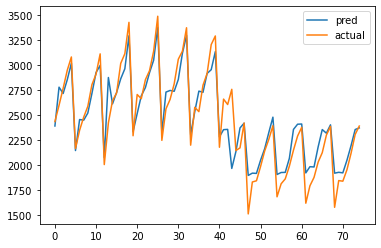

In [148]:
#Store 1
pyplot.plot(S1_xgb_predict)
y_test1_values=y_test1['sales'].to_numpy()
pyplot.plot(y_test1_values)
plt.legend(['pred','actual'],loc='best')

In [149]:
rmse = sqrt(mean_squared_error(y_test1_values,S1_xgb_predict))
print("Store1 RMSE  - ",rmse)
print(" Sales Mean - ",S1['sales'].mean())

Store1 RMSE  -  170.2559492885693
 Sales Mean -  2363.4189485213583


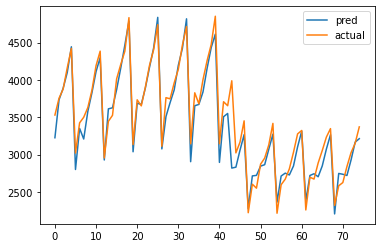

In [150]:
#Store 2
pyplot.plot(S2_xgb_predict)
y_test2_values=y_test2['sales'].to_numpy()
pyplot.plot(y_test2_values)
plt.legend(['pred','actual'],loc='best')

In [151]:
rmse = sqrt(mean_squared_error(y_test2_values,S2_xgb_predict))
print("Store2 RMSE  - ",rmse)
print(" Sales Mean - ",S2['sales'].mean())

Store2 RMSE  -  186.6041995013706
 Sales Mean -  3351.658269441402


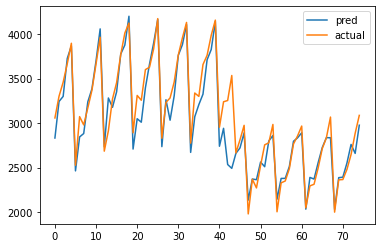

In [152]:
#Store 3
pyplot.plot(S3_xgb_predict)
y_test3_values=y_test3['sales'].to_numpy()
pyplot.plot(y_test3_values)
plt.legend(['pred','actual'],loc='best')

In [153]:
rmse = sqrt(mean_squared_error(y_test3_values,S3_xgb_predict))
print("Store3 RMSE  - ",rmse)
print(" Sales Mean - ",S3['sales'].mean())

Store3 RMSE  -  197.90946400264437
 Sales Mean -  2976.5301204819275


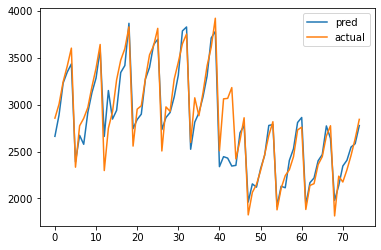

In [154]:
#Store 4
pyplot.plot(S4_xgb_predict)
y_test4_values=y_test4['sales'].to_numpy()
pyplot.plot(y_test4_values)
plt.legend(['pred','actual'],loc='best')


In [155]:
rmse = sqrt(mean_squared_error(y_test4_values,S4_xgb_predict))
print("Store4 RMSE  - ",rmse)
print(" Sales Mean - ",S4['sales'].mean())

Store4 RMSE  -  191.73587089784743
 Sales Mean -  2745.147316538883


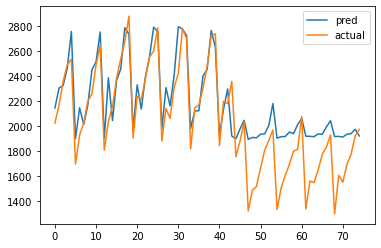

In [156]:
#Store 5
pyplot.plot(S5_xgb_predict)
y_test5_values=y_test5['sales'].to_numpy()
pyplot.plot(y_test5_values)
plt.legend(['pred','actual'],loc='best')

In [157]:
rmse = sqrt(mean_squared_error(y_test5_values,S5_xgb_predict))
print("Store5 RMSE  - ",rmse)
print(" Sales Mean - ",S5['sales'].mean())

Store5 RMSE  -  228.87797223748393
 Sales Mean -  1988.5082146768893


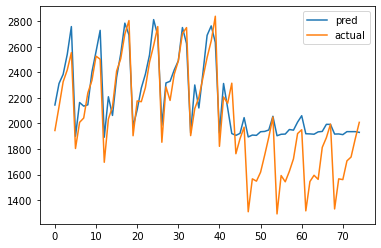

In [158]:
#Store 6
pyplot.plot(S6_xgb_predict)
y_test6_values=y_test6['sales'].to_numpy()
pyplot.plot(y_test6_values)
plt.legend(['pred','actual'],loc='best')

In [159]:
rmse = sqrt(mean_squared_error(y_test6_values,S6_xgb_predict))
print("Store6 RMSE  - ",rmse)
print(" Sales Mean - ",S6['sales'].mean())

Store6 RMSE  -  225.50710445286643
 Sales Mean -  1986.6757940854327


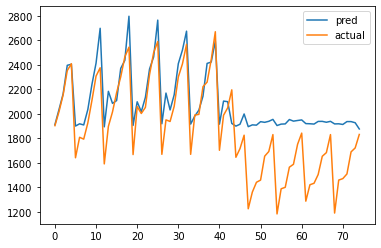

In [160]:
#Store 7
pyplot.plot(S7_xgb_predict)
y_test7_values=y_test7['sales'].to_numpy()
pyplot.plot(y_test7_values)
plt.legend(['pred','actual'],loc='best')

In [161]:
rmse = sqrt(mean_squared_error(y_test7_values,S7_xgb_predict))
print("Store7 RMSE  - ",rmse)
print(" Sales Mean - ",S7['sales'].mean())

Store7 RMSE  -  289.8389053930183
 Sales Mean -  1818.186746987952


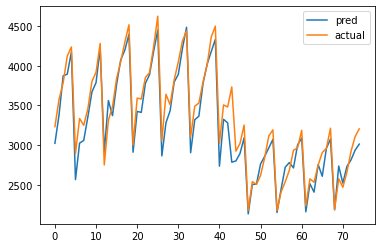

In [162]:
#Store 8
pyplot.plot(S8_xgb_predict)
y_test8_values=y_test8['sales'].to_numpy()
pyplot.plot(y_test8_values)
plt.legend(['pred','actual'],loc='best')

In [163]:
rmse = sqrt(mean_squared_error(y_test8_values,S8_xgb_predict))
print("Store8 RMSE  - ",rmse)
print(" Sales Mean - ",S8['sales'].mean())

Store8 RMSE  -  184.83543988493048
 Sales Mean -  3207.102409638554


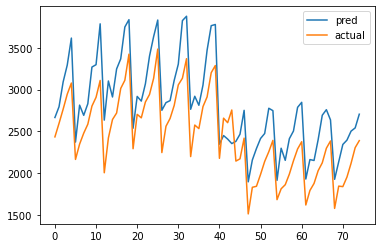

In [164]:
#Store 9
pyplot.plot(S9_xgb_predict)
y_test9_values=y_test9['sales'].to_numpy()
pyplot.plot(y_test1_values)
plt.legend(['pred','actual'],loc='best')

In [165]:
rmse = sqrt(mean_squared_error(y_test9_values,S9_xgb_predict))
print("Store9 RMSE  - ",rmse)
print(" Sales Mean - ",S9['sales'].mean())

Store9 RMSE  -  195.17032810821988
 Sales Mean -  2752.4512595837896


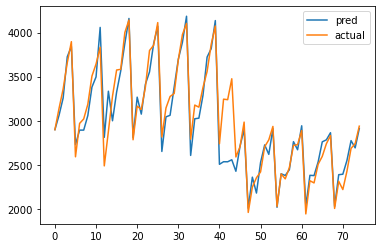

In [166]:
#Store 10
pyplot.plot(S10_xgb_predict)
y_test10_values=y_test10['sales'].to_numpy()
pyplot.plot(y_test10_values)
plt.legend(['pred','actual'],loc='best')

In [167]:
y_test10

sales
date             
2017-10-18   2899
2017-10-19   3140
2017-10-20   3360
2017-10-21   3657
2017-10-22   3896
...           ...
2017-12-27   2221
2017-12-28   2429
2017-12-29   2687
2017-12-30   2742
2017-12-31   2939

[75 rows x 1 columns]

In [168]:
rmse = sqrt(mean_squared_error(y_test10_values,S10_xgb_predict))
print("Store10 RMSE  - ",rmse)
print(" Sales Mean - ",S10['sales'].mean())

Store10 RMSE  -  201.95590598525712
 Sales Mean -  2935.464403066813


 Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [170]:
Lin_M1=lin_model.fit(x_train1,y_train1)
Lin_M2=lin_model.fit(x_train2,y_train2)
Lin_M3=lin_model.fit(x_train3,y_train3)
Lin_M4=lin_model.fit(x_train4,y_train4)
Lin_M5=lin_model.fit(x_train5,y_train5)
Lin_M6=lin_model.fit(x_train6,y_train6)
Lin_M7=lin_model.fit(x_train7,y_train7)
Lin_M8=lin_model.fit(x_train8,y_train8)
Lin_M9=lin_model.fit(x_train9,y_train9)
Lin_M10=lin_model.fit(x_train10,y_train10)

Lin_M1

LinearRegression()

In [171]:
Lin_pred1=Lin_M1.predict(x_test1)
Lin_pred2=Lin_M2.predict(x_test2)
Lin_pred3=Lin_M3.predict(x_test3)
Lin_pred4=Lin_M4.predict(x_test4)
Lin_pred5=Lin_M5.predict(x_test5)
Lin_pred6=Lin_M6.predict(x_test6)
Lin_pred7=Lin_M7.predict(x_test7)
Lin_pred8=Lin_M8.predict(x_test8)
Lin_pred9=Lin_M9.predict(x_test9)
Lin_pred10=Lin_M10.predict(x_test10)

Lin_pred1

array([[2515.11244254],
       [2666.16664802],
       [2811.11169416],
       [3058.44076993],
       [3250.37155474],
       [2131.24534234],
       [2521.76378356],
       [2531.05323574],
       [2696.65952543],
       [2915.7425147 ],
       [3116.67694419],
       [3238.31537012],
       [2185.0953558 ],
       [2688.22099667],
       [2742.09244584],
       [2776.55021359],
       [3021.57156092],
       [3173.69437081],
       [3397.42972764],
       [2277.84556595],
       [2611.66511934],
       [2716.77119462],
       [2809.42006477],
       [3079.5973624 ],
       [3251.32559332],
       [3495.16578713],
       [2279.68739492],
       [2689.55051444],
       [2656.23387799],
       [2895.72143125],
       [3024.30352374],
       [3221.47110409],
       [3384.9105832 ],
       [2239.40626434],
       [2597.18734029],
       [2724.03040844],
       [2847.47984202],
       [3041.86451532],
       [3153.07355925],
       [3264.68644416],
       [2186.55108086],
       [2429.103

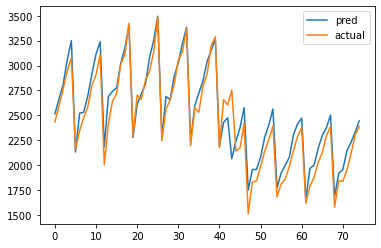

In [172]:
#Store 1
pyplot.plot(Lin_pred1)
y_test1_values=y_test1['sales'].to_numpy()
pyplot.plot(y_test1_values)
plt.legend(['pred','actual'],loc='best')

In [173]:
rmse = sqrt(mean_squared_error(y_test1_values,Lin_pred1))
print("Store1 RMSE  - ",rmse)
print(" Sales Mean - ",S1['sales'].mean())

Store1 RMSE  -  143.0417869286107
 Sales Mean -  2363.4189485213583


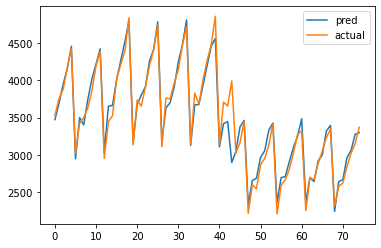

In [174]:
#Store 2
pyplot.plot(Lin_pred2)
y_test2_values=y_test2['sales'].to_numpy()
pyplot.plot(y_test2_values)
plt.legend(['pred','actual'],loc='best')

In [175]:
rmse = sqrt(mean_squared_error(y_test2_values,Lin_pred2))
print("Store2 RMSE  - ",rmse)
print(" Sales Mean - ",S2['sales'].mean())

Store2 RMSE  -  162.04528208741885
 Sales Mean -  3351.658269441402


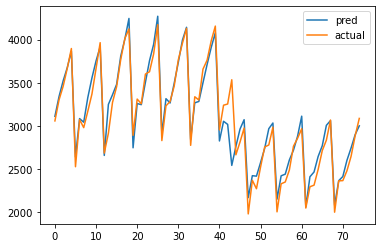

In [176]:
#Store 3
pyplot.plot(Lin_pred3)
y_test3_values=y_test3['sales'].to_numpy()
pyplot.plot(y_test3_values)
plt.legend(['pred','actual'],loc='best')

In [177]:
rmse = sqrt(mean_squared_error(y_test3_values,Lin_pred3))
print("Store3 RMSE  - ",rmse)
print(" Sales Mean - ",S3['sales'].mean())

Store3 RMSE  -  155.46189656945612
 Sales Mean -  2976.5301204819275


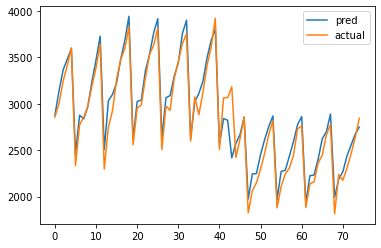

In [178]:
#Store 4
pyplot.plot(Lin_pred4)
y_test4_values=y_test4['sales'].to_numpy()
pyplot.plot(y_test4_values)
plt.legend(['pred','actual'],loc='best')


In [179]:
rmse = sqrt(mean_squared_error(y_test4_values,Lin_pred4))
print("Store4 RMSE  - ",rmse)
print(" Sales Mean - ",S4['sales'].mean())

Store4 RMSE  -  143.98988662414368
 Sales Mean -  2745.147316538883


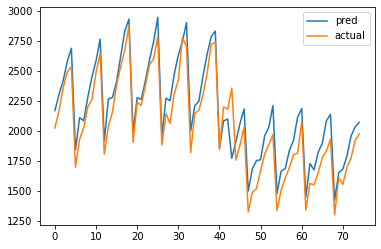

In [180]:
#Store 5
pyplot.plot(Lin_pred5)
y_test5_values=y_test5['sales'].to_numpy()
pyplot.plot(y_test5_values)
plt.legend(['pred','actual'],loc='best')

In [181]:
rmse = sqrt(mean_squared_error(y_test5_values,Lin_pred5))
print("Store5 RMSE  - ",rmse)
print(" Sales Mean - ",S5['sales'].mean())

Store5 RMSE  -  155.55373255516935
 Sales Mean -  1988.5082146768893


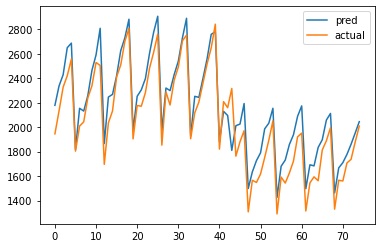

In [182]:
#Store 6
pyplot.plot(Lin_pred6)
y_test6_values=y_test6['sales'].to_numpy()
pyplot.plot(y_test6_values)
plt.legend(['pred','actual'],loc='best')

In [183]:
rmse = sqrt(mean_squared_error(y_test6_values,Lin_pred6))
print("Store6 RMSE  - ",rmse)
print(" Sales Mean - ",S6['sales'].mean())

Store6 RMSE  -  151.2657690242057
 Sales Mean -  1986.6757940854327


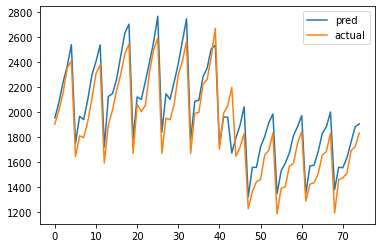

In [184]:
#Store 7
pyplot.plot(Lin_pred7)
y_test7_values=y_test7['sales'].to_numpy()
pyplot.plot(y_test7_values)
plt.legend(['pred','actual'],loc='best')

In [185]:
rmse = sqrt(mean_squared_error(y_test7_values,Lin_pred7))
print("Store7 RMSE  - ",rmse)
print(" Sales Mean - ",S7['sales'].mean())

Store7 RMSE  -  153.61353230461924
 Sales Mean -  1818.186746987952


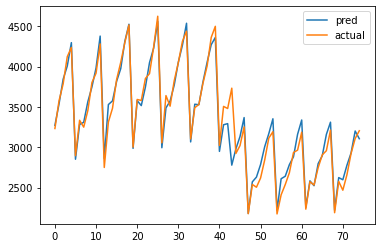

In [186]:
#Store 8
pyplot.plot(Lin_pred8)
y_test8_values=y_test8['sales'].to_numpy()
pyplot.plot(y_test8_values)
plt.legend(['pred','actual'],loc='best')

In [187]:
rmse = sqrt(mean_squared_error(y_test8_values,Lin_pred8))
print("Store8 RMSE  - ",rmse)
print(" Sales Mean - ",S8['sales'].mean())

Store8 RMSE  -  146.8274824125286
 Sales Mean -  3207.102409638554


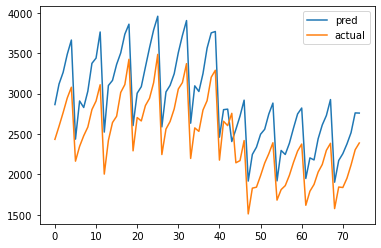

In [188]:
#Store 9
pyplot.plot(Lin_pred9)
y_test9_values=y_test9['sales'].to_numpy()
pyplot.plot(y_test1_values)
plt.legend(['pred','actual'],loc='best')

In [189]:
rmse = sqrt(mean_squared_error(y_test9_values,Lin_pred9))
print("Store9 RMSE  - ",rmse)
print(" Sales Mean - ",S9['sales'].mean())

Store9 RMSE  -  148.19396246419873
 Sales Mean -  2752.4512595837896


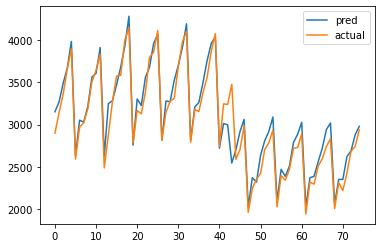

In [190]:
#Store 10
pyplot.plot(Lin_pred10)
y_test10_values=y_test10['sales'].to_numpy()
pyplot.plot(y_test10_values)
plt.legend(['pred','actual'],loc='best')

In [191]:
rmse = sqrt(mean_squared_error(y_test10_values,Lin_pred10))
print("Store10 RMSE  - ",rmse)
print(" Sales Mean - ",S10['sales'].mean())

Store10 RMSE  -  162.22998965438487
 Sales Mean -  2935.464403066813


# R2 Scores

In [192]:
from sklearn.metrics import r2_score,accuracy_score

ARIMA Model

In [193]:
ar1=r2_score(test1,ARI_pred1)
ar2=r2_score(test2,ARI_pred2)
ar3=r2_score(test3,ARI_pred3)
ar4=r2_score(test4,ARI_pred4)
ar5=r2_score(test5,ARI_pred5)
ar6=r2_score(test6,ARI_pred6)
ar7=r2_score(test7,ARI_pred7)
ar8=r2_score(test8,ARI_pred8)
ar9=r2_score(test9,ARI_pred9)
ar10=r2_score(test10,ARI_pred10)

list2=[ar1,ar2,ar3,ar4,ar5,ar6,ar7,ar8,ar9,ar10]
list2

[-1.344118600864317,
 -1.2833261788041996,
 -2.717717601606429,
 -2.682758073750884,
 -1.1761858532873668,
 -1.2426147362912716,
 -1.204625669352863,
 -2.78047630466854,
 -1.3035996261150076,
 -0.9732616234582143]

Auto regression

In [194]:
a1=r2_score(test1,pred1)
a2=r2_score(test1,pred2)
a3=r2_score(test1,pred3)
a4=r2_score(test1,pred4)
a5=r2_score(test1,pred5)
a6=r2_score(test1,pred6)
a7=r2_score(test1,pred7)
a8=r2_score(test1,pred8)
a9=r2_score(test1,pred9)
a10=r2_score(test1,pred10)

list3=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]
list3

[-0.018903312204268108,
 -0.27381844359694063,
 0.345788590390815,
 0.4228576939540377,
 -1.2059601948497698,
 -1.151544733778088,
 -1.9042345532645077,
 0.09519996745938275,
 0.4583218482072082,
 0.25525232559167965]

XGB Regressor

In [195]:
x1=r2_score(y_test1_values,S1_xgb_predict)
x2=r2_score(y_test2_values,S2_xgb_predict)
x3=r2_score(y_test3_values,S3_xgb_predict)
x4=r2_score(y_test4_values,S4_xgb_predict)
x5=r2_score(y_test5_values,S5_xgb_predict)
x6=r2_score(y_test6_values,S6_xgb_predict)
x7=r2_score(y_test7_values,S7_xgb_predict)
x8=r2_score(y_test8_values,S8_xgb_predict)
x9=r2_score(y_test9_values,S9_xgb_predict)
x10=r2_score(y_test10_values,S10_xgb_predict)

list4=[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]
list4

[0.872709162426609,
 0.9218256861610687,
 0.884153929287472,
 0.8733527918274395,
 0.6721759415175494,
 0.6796849023776552,
 0.3917539964461211,
 0.9162401543217933,
 0.8756829355272207,
 0.8772472660200994]

Linear Regression

In [196]:
l1=r2_score(y_test1_values,Lin_pred1)
l2=r2_score(y_test2_values,Lin_pred2)
l3=r2_score(y_test3_values,Lin_pred3)
l4=r2_score(y_test4_values,Lin_pred4)
l5=r2_score(y_test5_values,Lin_pred5)
l6=r2_score(y_test6_values,Lin_pred6)
l7=r2_score(y_test7_values,Lin_pred7)
l8=r2_score(y_test8_values,Lin_pred8)
l9=r2_score(y_test9_values,Lin_pred9)
l10=r2_score(y_test10_values,Lin_pred10)

list1=[l1,l2,l3,l4,l5,l6,l7,l8,l9,l10]
list1

[0.9101499330891009,
 0.9410486121538981,
 0.9285180969860594,
 0.9285745707286979,
 0.8485763531352701,
 0.8558753481754418,
 0.8291461168342457,
 0.947145729613955,
 0.9283255806953058,
 0.9207899407304333]

In [197]:
models=['AR','ARIMA','XGB','Linear']

S1_score=[a1,ar1,x1,l1]
S2_score=[a2,ar2,x2,l2]
S3_score=[a3,ar3,x3,l3]
S4_score=[a4,ar4,x4,l4]
S5_score=[a5,ar5,x5,l5]
S6_score=[a6,ar6,x6,l6]
S7_score=[a7,ar7,x7,l7]
S8_score=[a8,ar8,x8,l8]
S9_score=[a9,ar9,x9,l9]
S10_score=[a10,ar10,x10,l10]



<BarContainer object of 4 artists>

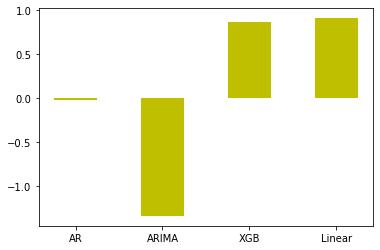

In [198]:
barWidth=0.5
plt.bar(models,S1_score,width = barWidth,color='y')

<BarContainer object of 4 artists>

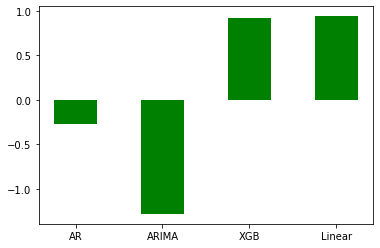

In [199]:
plt.bar(models,S2_score,width = barWidth,color='g')

<BarContainer object of 4 artists>

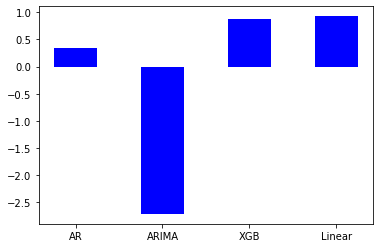

In [200]:
plt.bar(models,S3_score,width = barWidth,color='b')

<BarContainer object of 4 artists>

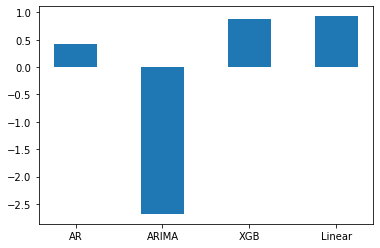

In [201]:
plt.bar(models,S4_score,width = barWidth)

<BarContainer object of 4 artists>

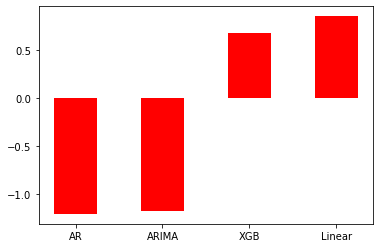

In [202]:
plt.bar(models,S5_score,width = barWidth,color='r')

<BarContainer object of 4 artists>

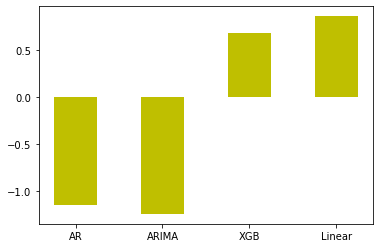

In [203]:
plt.bar(models,S6_score,width = barWidth,color='y')

<BarContainer object of 4 artists>

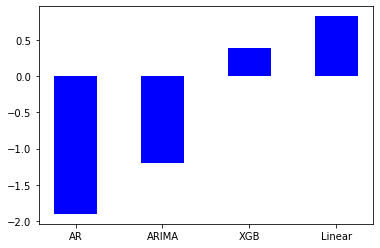

In [204]:
plt.bar(models,S7_score,width = barWidth,color='b')

<BarContainer object of 4 artists>

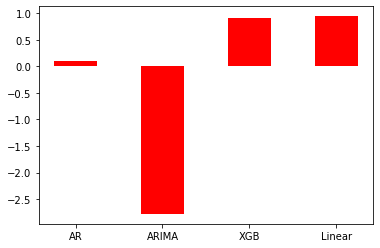

In [205]:
plt.bar(models,S8_score,width = barWidth,color='r')

<BarContainer object of 4 artists>

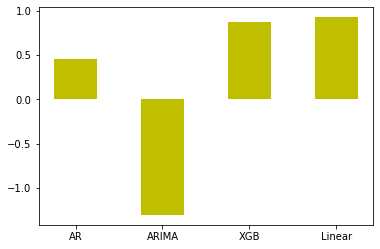

In [206]:
plt.bar(models,S9_score,width = barWidth,color='y')

<BarContainer object of 4 artists>

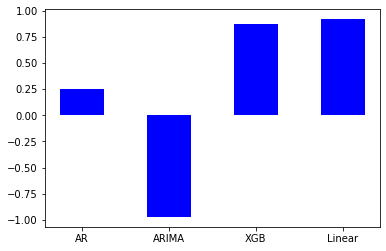

In [227]:
plt.bar(models,S10_score,width = barWidth,color='b')

                                           *******

#                           Future Prediction ( Linear Regression) 

In [208]:
Features=['store', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3', 'lag4']
Target = [ 'sales']

In [209]:
t_train1=XGB_S1_lags[Features]
t_test1=XGB_S1_lags [ Target]
S1_Model=lin_model.fit(t_train1,t_test1)

t_train2=XGB_S2_lags[Features]
t_test2=XGB_S2_lags [ Target]
S2_Model=lin_model.fit(t_train2,t_test2)

t_train3=XGB_S3_lags[Features]
t_test3=XGB_S3_lags [ Target]
S3_Model=lin_model.fit(t_train3,t_test3)

t_train4=XGB_S4_lags[Features]
t_test4=XGB_S4_lags [ Target]
S4_Model=lin_model.fit(t_train4,t_test4)

t_train5=XGB_S5_lags[Features]
t_test5=XGB_S5_lags [ Target]
S5_Model=lin_model.fit(t_train5,t_test5)

t_train6=XGB_S6_lags[Features]
t_test6=XGB_S6_lags [ Target]
S6_Model=lin_model.fit(t_train6,t_test6)

t_train7=XGB_S7_lags[Features]
t_test7=XGB_S7_lags [ Target]
S7_Model=lin_model.fit(t_train7,t_test7)

t_train8=XGB_S8_lags[Features]
t_test8=XGB_S8_lags [ Target]
S8_Model=lin_model.fit(t_train8,t_test8)

t_train9=XGB_S9_lags[Features]
t_test9=XGB_S9_lags [ Target]
S9_Model=lin_model.fit(t_train9,t_test9)

t_train10=XGB_S10_lags[Features]
t_test10=XGB_S10_lags [ Target]
S10_Model=lin_model.fit(t_train10,t_test10)

S1_Model

LinearRegression()

In [210]:
XGB_S1_lags.index.max()

Timestamp('2017-12-31 00:00:00')

In [211]:
# Create future dates

Fut_dates=pd.date_range('2018-01-01','2018-01-30')
Fut_dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30'],
              dtype='datetime64[ns]', freq='D')

In [212]:
# Future Engeneering

Fut_df=pd.DataFrame(index=Fut_dates)
Fut_df['isFuture']=True


XGB_S1['isFuture']=False
XGB_S1_Fut_df=pd.concat([XGB_S1,Fut_df])

XGB_S2['isFuture']=False
XGB_S2_Fut_df=pd.concat([XGB_S2,Fut_df])

XGB_S3['isFuture']=False
XGB_S3_Fut_df=pd.concat([XGB_S3,Fut_df])

XGB_S4['isFuture']=False
XGB_S4_Fut_df=pd.concat([XGB_S4,Fut_df])

XGB_S5['isFuture']=False
XGB_S5_Fut_df=pd.concat([XGB_S5,Fut_df])

XGB_S6['isFuture']=False
XGB_S6_Fut_df=pd.concat([XGB_S6,Fut_df])

XGB_S7['isFuture']=False
XGB_S7_Fut_df=pd.concat([XGB_S7,Fut_df])

XGB_S8['isFuture']=False
XGB_S8_Fut_df=pd.concat([XGB_S8,Fut_df])

XGB_S9['isFuture']=False
XGB_S9_Fut_df=pd.concat([XGB_S9,Fut_df])

XGB_S10['isFuture']=False
XGB_S10_Fut_df=pd.concat([XGB_S10,Fut_df])

In [213]:
XGB_S1_Fut_df['store']=1.0
XGB_S2_Fut_df['store']=2.0
XGB_S3_Fut_df['store']=3.0
XGB_S4_Fut_df['store']=4.0
XGB_S5_Fut_df['store']=5.0
XGB_S6_Fut_df['store']=6.0
XGB_S7_Fut_df['store']=7.0
XGB_S8_Fut_df['store']=8.0
XGB_S9_Fut_df['store']=9.0
XGB_S10_Fut_df['store']=10.0

XGB_S1_Fut_df

store   sales  dayofweek  quarter  month    year  dayofyear  \
2013-01-01    1.0  1316.0        1.0      1.0    1.0  2013.0        1.0   
2013-01-02    1.0  1264.0        2.0      1.0    1.0  2013.0        2.0   
2013-01-03    1.0  1305.0        3.0      1.0    1.0  2013.0        3.0   
2013-01-04    1.0  1452.0        4.0      1.0    1.0  2013.0        4.0   
2013-01-05    1.0  1499.0        5.0      1.0    1.0  2013.0        5.0   
...           ...     ...        ...      ...    ...     ...        ...   
2018-01-26    1.0     NaN        NaN      NaN    NaN     NaN        NaN   
2018-01-27    1.0     NaN        NaN      NaN    NaN     NaN        NaN   
2018-01-28    1.0     NaN        NaN      NaN    NaN     NaN        NaN   
2018-01-29    1.0     NaN        NaN      NaN    NaN     NaN        NaN   
2018-01-30    1.0     NaN        NaN      NaN    NaN     NaN        NaN   

            dayofmonth  weekofyear  lag1  lag2  lag3  lag4  isFuture  
2013-01-01         1.0         1.0   NaN   NaN   NaN   NaN     False  
2013-01-02         2.0         1.0   NaN   NaN   NaN   NaN     False  
2013-01-03         3.0         1.0   NaN   NaN   NaN   NaN     False  
2013-01-04         4.0         1.0   NaN   NaN   NaN   NaN     False  
2013-01-05         5.0         1.0   NaN   NaN   NaN   NaN     False  
...                ...         ...   ...   ...   ...   ...       ...  
2018-01-26         NaN         NaN   NaN   NaN   NaN   NaN      True  
2018-01-27         NaN         NaN   NaN   NaN   NaN   NaN      True  
2018-01-28         NaN         NaN   NaN   NaN   NaN   NaN      True  
2018-01-29         NaN         NaN   NaN   NaN   NaN   NaN      True  
2018-01-30         NaN         NaN   NaN   NaN   NaN   NaN      True  

[1856 rows x 14 columns]

In [214]:
XGB_S1_lags_Fut_df=add_lags(XGB_S1_Fut_df)
XGB_S1_lags_Fut_df=create_date_time_features(XGB_S1_lags_Fut_df)

XGB_S2_lags_Fut_df=add_lags(XGB_S2_Fut_df)
XGB_S2_lags_Fut_df=create_date_time_features(XGB_S2_lags_Fut_df)

XGB_S3_lags_Fut_df=add_lags(XGB_S3_Fut_df)
XGB_S3_lags_Fut_df=create_date_time_features(XGB_S3_lags_Fut_df)

XGB_S4_lags_Fut_df=add_lags(XGB_S4_Fut_df)
XGB_S4_lags_Fut_df=create_date_time_features(XGB_S4_lags_Fut_df)

XGB_S5_lags_Fut_df=add_lags(XGB_S5_Fut_df)
XGB_S5_lags_Fut_df=create_date_time_features(XGB_S5_lags_Fut_df)

XGB_S6_lags_Fut_df=add_lags(XGB_S6_Fut_df)
XGB_S6_lags_Fut_df=create_date_time_features(XGB_S6_lags_Fut_df)

XGB_S7_lags_Fut_df=add_lags(XGB_S7_Fut_df)
XGB_S7_lags_Fut_df=create_date_time_features(XGB_S7_lags_Fut_df)

XGB_S8_lags_Fut_df=add_lags(XGB_S8_Fut_df)
XGB_S8_lags_Fut_df=create_date_time_features(XGB_S8_lags_Fut_df)

XGB_S9_lags_Fut_df=add_lags(XGB_S9_Fut_df)
XGB_S9_lags_Fut_df=create_date_time_features(XGB_S9_lags_Fut_df)

XGB_S10_lags_Fut_df=add_lags(XGB_S10_Fut_df)
XGB_S10_lags_Fut_df=create_date_time_features(XGB_S10_lags_Fut_df)


XGB_S1_lags_Fut_df

store   sales  dayofweek  quarter  month  year  dayofyear  \
2013-01-01    1.0  1316.0          1        1      1  2013          1   
2013-01-02    1.0  1264.0          2        1      1  2013          2   
2013-01-03    1.0  1305.0          3        1      1  2013          3   
2013-01-04    1.0  1452.0          4        1      1  2013          4   
2013-01-05    1.0  1499.0          5        1      1  2013          5   
...           ...     ...        ...      ...    ...   ...        ...   
2018-01-26    1.0     NaN          4        1      1  2018         26   
2018-01-27    1.0     NaN          5        1      1  2018         27   
2018-01-28    1.0     NaN          6        1      1  2018         28   
2018-01-29    1.0     NaN          0        1      1  2018         29   
2018-01-30    1.0     NaN          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2013-01-01           1           1     NaN     NaN     NaN     NaN     False  
2013-01-02           2           1     NaN     NaN     NaN     NaN     False  
2013-01-03           3           1     NaN     NaN     NaN     NaN     False  
2013-01-04           4           1     NaN     NaN     NaN     NaN     False  
2013-01-05           5           1     NaN     NaN     NaN     NaN     False  
...                ...         ...     ...     ...     ...     ...       ...  
2018-01-26          26           4  1859.0  1863.0  1665.0  1639.0      True  
2018-01-27          27           4  2045.0  1949.0  1822.0  1890.0      True  
2018-01-28          28           4  2105.0  2089.0  2127.0  2010.0      True  
2018-01-29          29           5  1406.0  1562.0  1410.0  1382.0      True  
2018-01-30          30           5  1737.0  1762.0  1574.0  1567.0      True  

[1856 rows x 14 columns]

In [215]:
S1_fut_pred_data=XGB_S1_lags_Fut_df.query('isFuture').copy()
S2_fut_pred_data=XGB_S2_lags_Fut_df.query('isFuture').copy()
S3_fut_pred_data=XGB_S3_lags_Fut_df.query('isFuture').copy()
S4_fut_pred_data=XGB_S4_lags_Fut_df.query('isFuture').copy()
S5_fut_pred_data=XGB_S5_lags_Fut_df.query('isFuture').copy()
S6_fut_pred_data=XGB_S6_lags_Fut_df.query('isFuture').copy()
S7_fut_pred_data=XGB_S7_lags_Fut_df.query('isFuture').copy()
S8_fut_pred_data=XGB_S8_lags_Fut_df.query('isFuture').copy()
S9_fut_pred_data=XGB_S9_lags_Fut_df.query('isFuture').copy()
S10_fut_pred_data=XGB_S10_lags_Fut_df.query('isFuture').copy()


S1_fut_pred_data

store  sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01    1.0    NaN          0        1      1  2018          1   
2018-01-02    1.0    NaN          1        1      1  2018          2   
2018-01-03    1.0    NaN          2        1      1  2018          3   
2018-01-04    1.0    NaN          3        1      1  2018          4   
2018-01-05    1.0    NaN          4        1      1  2018          5   
2018-01-06    1.0    NaN          5        1      1  2018          6   
2018-01-07    1.0    NaN          6        1      1  2018          7   
2018-01-08    1.0    NaN          0        1      1  2018          8   
2018-01-09    1.0    NaN          1        1      1  2018          9   
2018-01-10    1.0    NaN          2        1      1  2018         10   
2018-01-11    1.0    NaN          3        1      1  2018         11   
2018-01-12    1.0    NaN          4        1      1  2018         12   
2018-01-13    1.0    NaN          5        1      1  2018         13   
2018-01-14    1.0    NaN          6        1      1  2018         14   
2018-01-15    1.0    NaN          0        1      1  2018         15   
2018-01-16    1.0    NaN          1        1      1  2018         16   
2018-01-17    1.0    NaN          2        1      1  2018         17   
2018-01-18    1.0    NaN          3        1      1  2018         18   
2018-01-19    1.0    NaN          4        1      1  2018         19   
2018-01-20    1.0    NaN          5        1      1  2018         20   
2018-01-21    1.0    NaN          6        1      1  2018         21   
2018-01-22    1.0    NaN          0        1      1  2018         22   
2018-01-23    1.0    NaN          1        1      1  2018         23   
2018-01-24    1.0    NaN          2        1      1  2018         24   
2018-01-25    1.0    NaN          3        1      1  2018         25   
2018-01-26    1.0    NaN          4        1      1  2018         26   
2018-01-27    1.0    NaN          5        1      1  2018         27   
2018-01-28    1.0    NaN          6        1      1  2018         28   
2018-01-29    1.0    NaN          0        1      1  2018         29   
2018-01-30    1.0    NaN          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1441.0  1347.0  1337.0  1179.0      True  
2018-01-02           2           1  1635.0  1608.0  1430.0  1444.0      True  
2018-01-03           3           1  1713.0  1622.0  1501.0  1460.0      True  
2018-01-04           4           1  1858.0  1784.0  1617.0  1599.0      True  
2018-01-05           5           1  1890.0  1860.0  1650.0  1642.0      True  
2018-01-06           6           1  2043.0  1914.0  1808.0  1723.0      True  
2018-01-07           7           1  2187.0  2045.0  1904.0  1806.0      True  
2018-01-08           8           2  1444.0  1389.0  1296.0  1217.0      True  
2018-01-09           9           2  1775.0  1646.0  1444.0  1484.0      True  
2018-01-10          10           2  1682.0  1600.0  1462.0  1362.0      True  
2018-01-11          11           2  1768.0  1782.0  1573.0  1535.0      True  
2018-01-12          12           2  1897.0  1880.0  1679.0  1642.0      True  
2018-01-13          13           2  2052.0  1958.0  1799.0  1738.0      True  
2018-01-14          14           2  2203.0  2167.0  1873.0  1853.0      True  
2018-01-15          15           3  1422.0  1346.0  1294.0  1238.0      True  
2018-01-16          16           3  1695.0  1529.0  1519.0  1369.0      True  
2018-01-17          17           3  1670.0  1610.0  1479.0  1433.0      True  
2018-01-18          18           3  1773.0  1723.0  1568.0  1507.0      True  
2018-01-19          19           3  1961.0  1851.0  1738.0  1654.0      True  
2018-01-20          20           3  1993.0  1907.0  1828.0  1733.0      True  
2018-01-21          21           3  2130.0  2071.0  1874.0  1851.0      True  
2018-01-22          22           4  1475.

Future sales prediction of each store

In [216]:
S1_fut_pred_data['sales']=lin_model.predict(S1_fut_pred_data[Features])
S1_fut_pred_data

store        sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01    1.0  1435.587830          0        1      1  2018          1   
2018-01-02    1.0  1651.063567          1        1      1  2018          2   
2018-01-03    1.0  1726.146397          2        1      1  2018          3   
2018-01-04    1.0  1882.413403          3        1      1  2018          4   
2018-01-05    1.0  1926.968492          4        1      1  2018          5   
2018-01-06    1.0  2076.264953          5        1      1  2018          6   
2018-01-07    1.0  2222.669165          6        1      1  2018          7   
2018-01-08    1.0  1439.315327          0        1      1  2018          8   
2018-01-09    1.0  1767.337960          1        1      1  2018          9   
2018-01-10    1.0  1684.016846          2        1      1  2018         10   
2018-01-11    1.0  1797.658584          3        1      1  2018         11   
2018-01-12    1.0  1931.677468          4        1      1  2018         12   
2018-01-13    1.0  2084.382809          5        1      1  2018         13   
2018-01-14    1.0  2245.564820          6        1      1  2018         14   
2018-01-15    1.0  1415.368495          0        1      1  2018         15   
2018-01-16    1.0  1680.915098          1        1      1  2018         16   
2018-01-17    1.0  1678.592035          2        1      1  2018         17   
2018-01-18    1.0  1789.206412          3        1      1  2018         18   
2018-01-19    1.0  1980.217898          4        1      1  2018         19   
2018-01-20    1.0  2029.017506          5        1      1  2018         20   
2018-01-21    1.0  2173.724802          6        1      1  2018         21   
2018-01-22    1.0  1442.994341          0        1      1  2018         22   
2018-01-23    1.0  1666.344485          1        1      1  2018         23   
2018-01-24    1.0  1689.704143          2        1      1  2018         24   
2018-01-25    1.0  1738.736263          3        1      1  2018         25   
2018-01-26    1.0  1890.304640          4        1      1  2018         26   
2018-01-27    1.0  2084.919288          5        1      1  2018         27   
2018-01-28    1.0  2178.122328          6        1      1  2018         28   
2018-01-29    1.0  1433.195550          0        1      1  2018         29   
2018-01-30    1.0  1749.048573          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1441.0  1347.0  1337.0  1179.0      True  
2018-01-02           2           1  1635.0  1608.0  1430.0  1444.0      True  
2018-01-03           3           1  1713.0  1622.0  1501.0  1460.0      True  
2018-01-04           4           1  1858.0  1784.0  1617.0  1599.0      True  
2018-01-05           5           1  1890.0  1860.0  1650.0  1642.0      True  
2018-01-06           6           1  2043.0  1914.0  1808.0  1723.0      True  
2018-01-07           7           1  2187.0  2045.0  1904.0  1806.0      True  
2018-01-08           8           2  1444.0  1389.0  1296.0  1217.0      True  
2018-01-09           9           2  1775.0  1646.0  1444.0  1484.0      True  
2018-01-10          10           2  1682.0  1600.0  1462.0  1362.0      True  
2018-01-11          11           2  1768.0  1782.0  1573.0  1535.0      True  
2018-01-12          12           2  1897.0  1880.0  1679.0  1642.0      True  
2018-01-13          13           2  2052.0  1958.0  1799.0  1738.0      True  
2018-01-14          14           2  2203.0  2167.0  1873.0  1853.0      True  
2018-01-15          15           3  1422.0  1346.0  1294.0  1238.0      True  
2018-01-16          16           3  1695.0  1529.0  1519.0  1369.0      True  
2018-01-17          17           3  1670.0  1610.0  1479.0  1433.0      True  
2018-01-18          18           3  1773.0  1723.0  1568.0  1507.0      True  
2018-01-19          19           3  1961.0  1851.0  1738.0  1654.0      True  
2018-01-20   

In [217]:
S2_fut_pred_data['sales']=lin_model.predict(S2_fut_pred_data[Features])
S2_fut_pred_data

store        sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01    2.0  1984.507850          0        1      1  2018          1   
2018-01-02    2.0  2486.616381          1        1      1  2018          2   
2018-01-03    2.0  2365.043063          2        1      1  2018          3   
2018-01-04    2.0  2666.470965          3        1      1  2018          4   
2018-01-05    2.0  2729.003161          4        1      1  2018          5   
2018-01-06    2.0  2916.989847          5        1      1  2018          6   
2018-01-07    2.0  3057.358052          6        1      1  2018          7   
2018-01-08    2.0  2027.603072          0        1      1  2018          8   
2018-01-09    2.0  2460.981202          1        1      1  2018          9   
2018-01-10    2.0  2393.061964          2        1      1  2018         10   
2018-01-11    2.0  2496.099963          3        1      1  2018         11   
2018-01-12    2.0  2703.065433          4        1      1  2018         12   
2018-01-13    2.0  2900.586886          5        1      1  2018         13   
2018-01-14    2.0  3095.944424          6        1      1  2018         14   
2018-01-15    2.0  1940.266440          0        1      1  2018         15   
2018-01-16    2.0  2357.741549          1        1      1  2018         16   
2018-01-17    2.0  2369.080319          2        1      1  2018         17   
2018-01-18    2.0  2501.963041          3        1      1  2018         18   
2018-01-19    2.0  2740.903310          4        1      1  2018         19   
2018-01-20    2.0  2924.233226          5        1      1  2018         20   
2018-01-21    2.0  3087.751734          6        1      1  2018         21   
2018-01-22    2.0  2056.727936          0        1      1  2018         22   
2018-01-23    2.0  2418.375105          1        1      1  2018         23   
2018-01-24    2.0  2336.305841          2        1      1  2018         24   
2018-01-25    2.0  2517.657926          3        1      1  2018         25   
2018-01-26    2.0  2644.218479          4        1      1  2018         26   
2018-01-27    2.0  2870.333998          5        1      1  2018         27   
2018-01-28    2.0  3052.250539          6        1      1  2018         28   
2018-01-29    2.0  2057.688519          0        1      1  2018         29   
2018-01-30    2.0  2437.499707          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1967.0  1940.0  1820.0  1695.0      True  
2018-01-02           2           1  2481.0  2365.0  2116.0  2009.0      True  
2018-01-03           3           1  2348.0  2226.0  2032.0  1966.0      True  
2018-01-04           4           1  2648.0  2431.0  2257.0  2227.0      True  
2018-01-05           5           1  2677.0  2593.0  2530.0  2280.0      True  
2018-01-06           6           1  2861.0  2846.0  2564.0  2375.0      True  
2018-01-07           7           1  2988.0  2960.0  2694.0  2539.0      True  
2018-01-08           8           2  2018.0  1965.0  1805.0  1745.0      True  
2018-01-09           9           2  2471.0  2259.0  2083.0  1987.0      True  
2018-01-10          10           2  2386.0  2206.0  2097.0  1970.0      True  
2018-01-11          11           2  2458.0  2412.0  2300.0  2079.0      True  
2018-01-12          12           2  2641.0  2676.0  2437.0  2322.0      True  
2018-01-13          13           2  2835.0  2841.0  2602.0  2453.0      True  
2018-01-14          14           2  3042.0  2931.0  2672.0  2572.0      True  
2018-01-15          15           3  1912.0  1945.0  1823.0  1777.0      True  
2018-01-16          16           3  2350.0  2290.0  2008.0  1975.0      True  
2018-01-17          17           3  2355.0  2253.0  2089.0  1982.0      True  
2018-01-18          18           3  2456.0  2474.0  2263.0  2161.0      True  
2018-01-19          19           3  2701.0  2616.0  2382.0  2343.0      True  
2018-01-20   

In [218]:
S3_fut_pred_data['sales']=lin_model.predict(S3_fut_pred_data[Features])
S3_fut_pred_data

store        sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01    3.0  1847.985472          0        1      1  2018          1   
2018-01-02    3.0  2156.711529          1        1      1  2018          2   
2018-01-03    3.0  2130.757026          2        1      1  2018          3   
2018-01-04    3.0  2315.212232          3        1      1  2018          4   
2018-01-05    3.0  2472.318893          4        1      1  2018          5   
2018-01-06    3.0  2598.929982          5        1      1  2018          6   
2018-01-07    3.0  2733.899833          6        1      1  2018          7   
2018-01-08    3.0  1804.919085          0        1      1  2018          8   
2018-01-09    3.0  2090.174085          1        1      1  2018          9   
2018-01-10    3.0  2095.476931          2        1      1  2018         10   
2018-01-11    3.0  2305.158460          3        1      1  2018         11   
2018-01-12    3.0  2548.176543          4        1      1  2018         12   
2018-01-13    3.0  2579.892220          5        1      1  2018         13   
2018-01-14    3.0  2755.774101          6        1      1  2018         14   
2018-01-15    3.0  1845.639254          0        1      1  2018         15   
2018-01-16    3.0  2089.943992          1        1      1  2018         16   
2018-01-17    3.0  2206.835942          2        1      1  2018         17   
2018-01-18    3.0  2338.893174          3        1      1  2018         18   
2018-01-19    3.0  2496.622730          4        1      1  2018         19   
2018-01-20    3.0  2607.683982          5        1      1  2018         20   
2018-01-21    3.0  2785.427438          6        1      1  2018         21   
2018-01-22    3.0  1745.087507          0        1      1  2018         22   
2018-01-23    3.0  2091.604715          1        1      1  2018         23   
2018-01-24    3.0  2097.720337          2        1      1  2018         24   
2018-01-25    3.0  2297.249592          3        1      1  2018         25   
2018-01-26    3.0  2426.538904          4        1      1  2018         26   
2018-01-27    3.0  2588.798102          5        1      1  2018         27   
2018-01-28    3.0  2782.985902          6        1      1  2018         28   
2018-01-29    3.0  1853.427403          0        1      1  2018         29   
2018-01-30    3.0  2118.625964          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1855.0  1714.0  1658.0  1504.0      True  
2018-01-02           2           1  2152.0  2004.0  1863.0  1795.0      True  
2018-01-03           3           1  2107.0  2060.0  1891.0  1768.0      True  
2018-01-04           4           1  2287.0  2168.0  2056.0  1936.0      True  
2018-01-05           5           1  2431.0  2343.0  2189.0  2071.0      True  
2018-01-06           6           1  2552.0  2443.0  2259.0  2184.0      True  
2018-01-07           7           1  2671.0  2618.0  2400.0  2293.0      True  
2018-01-08           8           2  1801.0  1760.0  1575.0  1549.0      True  
2018-01-09           9           2  2078.0  2049.0  1805.0  1749.0      True  
2018-01-10          10           2  2073.0  2021.0  1846.0  1789.0      True  
2018-01-11          11           2  2283.0  2136.0  1974.0  1981.0      True  
2018-01-12          12           2  2547.0  2266.0  2103.0  2050.0      True  
2018-01-13          13           2  2535.0  2418.0  2274.0  2188.0      True  
2018-01-14          14           2  2705.0  2600.0  2478.0  2257.0      True  
2018-01-15          15           3  1860.0  1725.0  1654.0  1516.0      True  
2018-01-16          16           3  2079.0  2056.0  1843.0  1756.0      True  
2018-01-17          17           3  2212.0  2059.0  1860.0  1785.0      True  
2018-01-18          18           3  2338.0  2199.0  1984.0  1846.0      True  
2018-01-19          19           3  2488.0  2321.0  2120.0  1987.0      True  
2018-01-20   

In [219]:
S4_fut_pred_data['sales']=lin_model.predict(S4_fut_pred_data[Features])
S4_fut_pred_data

store        sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01    4.0  1675.437136          0        1      1  2018          1   
2018-01-02    4.0  1966.564798          1        1      1  2018          2   
2018-01-03    4.0  1983.379919          2        1      1  2018          3   
2018-01-04    4.0  2143.630482          3        1      1  2018          4   
2018-01-05    4.0  2211.295869          4        1      1  2018          5   
2018-01-06    4.0  2479.972418          5        1      1  2018          6   
2018-01-07    4.0  2613.549060          6        1      1  2018          7   
2018-01-08    4.0  1702.977979          0        1      1  2018          8   
2018-01-09    4.0  1950.560098          1        1      1  2018          9   
2018-01-10    4.0  1936.444230          2        1      1  2018         10   
2018-01-11    4.0  2064.694846          3        1      1  2018         11   
2018-01-12    4.0  2197.668626          4        1      1  2018         12   
2018-01-13    4.0  2357.798420          5        1      1  2018         13   
2018-01-14    4.0  2468.721539          6        1      1  2018         14   
2018-01-15    4.0  1645.442681          0        1      1  2018         15   
2018-01-16    4.0  2005.629961          1        1      1  2018         16   
2018-01-17    4.0  1990.733622          2        1      1  2018         17   
2018-01-18    4.0  2094.256209          3        1      1  2018         18   
2018-01-19    4.0  2241.930599          4        1      1  2018         19   
2018-01-20    4.0  2445.969438          5        1      1  2018         20   
2018-01-21    4.0  2557.182872          6        1      1  2018         21   
2018-01-22    4.0  1630.779059          0        1      1  2018         22   
2018-01-23    4.0  1946.465761          1        1      1  2018         23   
2018-01-24    4.0  1914.364814          2        1      1  2018         24   
2018-01-25    4.0  2060.348156          3        1      1  2018         25   
2018-01-26    4.0  2225.821633          4        1      1  2018         26   
2018-01-27    4.0  2400.760923          5        1      1  2018         27   
2018-01-28    4.0  2642.180365          6        1      1  2018         28   
2018-01-29    4.0  1681.104440          0        1      1  2018         29   
2018-01-30    4.0  2006.320627          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1671.0  1580.0  1462.0  1473.0      True  
2018-01-02           2           1  1953.0  1897.0  1702.0  1660.0      True  
2018-01-03           3           1  1969.0  1870.0  1752.0  1637.0      True  
2018-01-04           4           1  2114.0  2054.0  1856.0  1803.0      True  
2018-01-05           5           1  2180.0  2055.0  1942.0  1848.0      True  
2018-01-06           6           1  2452.0  2237.0  2134.0  2039.0      True  
2018-01-07           7           1  2574.0  2417.0  2223.0  2129.0      True  
2018-01-08           8           2  1712.0  1599.0  1446.0  1449.0      True  
2018-01-09           9           2  1943.0  1815.0  1732.0  1685.0      True  
2018-01-10          10           2  1914.0  1844.0  1746.0  1681.0      True  
2018-01-11          11           2  2027.0  1994.0  1843.0  1817.0      True  
2018-01-12          12           2  2164.0  2095.0  1953.0  1839.0      True  
2018-01-13          13           2  2316.0  2171.0  2091.0  2033.0      True  
2018-01-14          14           2  2421.0  2333.0  2148.0  2061.0      True  
2018-01-15          15           3  1640.0  1621.0  1499.0  1448.0      True  
2018-01-16          16           3  2013.0  1928.0  1767.0  1587.0      True  
2018-01-17          17           3  1976.0  1926.0  1752.0  1689.0      True  
2018-01-18          18           3  2072.0  1964.0  1885.0  1799.0      True  
2018-01-19          19           3  2205.0  2160.0  1889.0  1973.0      True  
2018-01-20   

In [220]:
S5_fut_pred_data['sales']=lin_model.predict(S5_fut_pred_data[Features])
S5_fut_pred_data

store        sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01    5.0  1213.026678          0        1      1  2018          1   
2018-01-02    5.0  1448.394887          1        1      1  2018          2   
2018-01-03    5.0  1381.726917          2        1      1  2018          3   
2018-01-04    5.0  1538.346914          3        1      1  2018          4   
2018-01-05    5.0  1598.127846          4        1      1  2018          5   
2018-01-06    5.0  1726.711216          5        1      1  2018          6   
2018-01-07    5.0  1832.400081          6        1      1  2018          7   
2018-01-08    5.0  1180.162032          0        1      1  2018          8   
2018-01-09    5.0  1390.853154          1        1      1  2018          9   
2018-01-10    5.0  1419.963334          2        1      1  2018         10   
2018-01-11    5.0  1553.941097          3        1      1  2018         11   
2018-01-12    5.0  1707.102244          4        1      1  2018         12   
2018-01-13    5.0  1761.170591          5        1      1  2018         13   
2018-01-14    5.0  1818.726128          6        1      1  2018         14   
2018-01-15    5.0  1153.618726          0        1      1  2018         15   
2018-01-16    5.0  1398.367760          1        1      1  2018         16   
2018-01-17    5.0  1392.070837          2        1      1  2018         17   
2018-01-18    5.0  1520.274092          3        1      1  2018         18   
2018-01-19    5.0  1618.031505          4        1      1  2018         19   
2018-01-20    5.0  1695.631057          5        1      1  2018         20   
2018-01-21    5.0  1814.115561          6        1      1  2018         21   
2018-01-22    5.0  1138.389454          0        1      1  2018         22   
2018-01-23    5.0  1361.040489          1        1      1  2018         23   
2018-01-24    5.0  1415.957227          2        1      1  2018         24   
2018-01-25    5.0  1503.118091          3        1      1  2018         25   
2018-01-26    5.0  1634.614561          4        1      1  2018         26   
2018-01-27    5.0  1733.345716          5        1      1  2018         27   
2018-01-28    5.0  1904.105220          6        1      1  2018         28   
2018-01-29    5.0  1196.211670          0        1      1  2018         29   
2018-01-30    5.0  1414.051100          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1218.0  1144.0  1062.0  1057.0      True  
2018-01-02           2           1  1456.0  1331.0  1254.0  1179.0      True  
2018-01-03           3           1  1350.0  1385.0  1272.0  1248.0      True  
2018-01-04           4           1  1529.0  1416.0  1355.0  1245.0      True  
2018-01-05           5           1  1568.0  1495.0  1409.0  1377.0      True  
2018-01-06           6           1  1698.0  1598.0  1498.0  1421.0      True  
2018-01-07           7           1  1781.0  1782.0  1626.0  1524.0      True  
2018-01-08           8           2  1191.0  1160.0  1033.0   981.0      True  
2018-01-09           9           2  1388.0  1334.0  1255.0  1189.0      True  
2018-01-10          10           2  1413.0  1339.0  1265.0  1209.0      True  
2018-01-11          11           2  1537.0  1514.0  1397.0  1269.0      True  
2018-01-12          12           2  1710.0  1526.0  1432.0  1324.0      True  
2018-01-13          13           2  1738.0  1656.0  1484.0  1440.0      True  
2018-01-14          14           2  1771.0  1792.0  1566.0  1529.0      True  
2018-01-15          15           3  1155.0  1154.0  1148.0   998.0      True  
2018-01-16          16           3  1398.0  1386.0  1248.0  1180.0      True  
2018-01-17          17           3  1378.0  1416.0  1245.0  1190.0      True  
2018-01-18          18           3  1492.0  1502.0  1362.0  1370.0      True  
2018-01-19          19           3  1593.0  1561.0  1457.0  1374.0      True  
2018-01-20   

In [221]:
S6_fut_pred_data['sales']=lin_model.predict(S6_fut_pred_data[Features])
S6_fut_pred_data

store        sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01    6.0  1178.228088          0        1      1  2018          1   
2018-01-02    6.0  1415.461619          1        1      1  2018          2   
2018-01-03    6.0  1414.149778          2        1      1  2018          3   
2018-01-04    6.0  1484.363665          3        1      1  2018          4   
2018-01-05    6.0  1667.878472          4        1      1  2018          5   
2018-01-06    6.0  1741.090331          5        1      1  2018          6   
2018-01-07    6.0  1797.479180          6        1      1  2018          7   
2018-01-08    6.0  1168.248157          0        1      1  2018          8   
2018-01-09    6.0  1369.220038          1        1      1  2018          9   
2018-01-10    6.0  1457.204151          2        1      1  2018         10   
2018-01-11    6.0  1555.650050          3        1      1  2018         11   
2018-01-12    6.0  1684.309766          4        1      1  2018         12   
2018-01-13    6.0  1814.861305          5        1      1  2018         13   
2018-01-14    6.0  1770.406393          6        1      1  2018         14   
2018-01-15    6.0  1248.086416          0        1      1  2018         15   
2018-01-16    6.0  1408.340534          1        1      1  2018         16   
2018-01-17    6.0  1387.798808          2        1      1  2018         17   
2018-01-18    6.0  1457.871596          3        1      1  2018         18   
2018-01-19    6.0  1608.860960          4        1      1  2018         19   
2018-01-20    6.0  1800.936572          5        1      1  2018         20   
2018-01-21    6.0  1838.880009          6        1      1  2018         21   
2018-01-22    6.0  1150.053552          0        1      1  2018         22   
2018-01-23    6.0  1329.521474          1        1      1  2018         23   
2018-01-24    6.0  1379.158202          2        1      1  2018         24   
2018-01-25    6.0  1563.791431          3        1      1  2018         25   
2018-01-26    6.0  1639.916996          4        1      1  2018         26   
2018-01-27    6.0  1710.308387          5        1      1  2018         27   
2018-01-28    6.0  1883.215612          6        1      1  2018         28   
2018-01-29    6.0  1176.111271          0        1      1  2018         29   
2018-01-30    6.0  1460.783764          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1174.0  1172.0  1084.0  1024.0      True  
2018-01-02           2           1  1410.0  1369.0  1257.0  1183.0      True  
2018-01-03           3           1  1392.0  1397.0  1264.0  1226.0      True  
2018-01-04           4           1  1460.0  1394.0  1313.0  1304.0      True  
2018-01-05           5           1  1653.0  1532.0  1434.0  1343.0      True  
2018-01-06           6           1  1709.0  1614.0  1493.0  1467.0      True  
2018-01-07           7           1  1754.0  1675.0  1541.0  1532.0      True  
2018-01-08           8           2  1172.0  1161.0  1105.0   979.0      True  
2018-01-09           9           2  1362.0  1330.0  1259.0  1183.0      True  
2018-01-10          10           2  1454.0  1348.0  1267.0  1245.0      True  
2018-01-11          11           2  1542.0  1467.0  1264.0  1359.0      True  
2018-01-12          12           2  1666.0  1626.0  1351.0  1401.0      True  
2018-01-13          13           2  1810.0  1628.0  1492.0  1419.0      True  
2018-01-14          14           2  1722.0  1728.0  1579.0  1490.0      True  
2018-01-15          15           3  1271.0  1160.0  1102.0  1029.0      True  
2018-01-16          16           3  1414.0  1338.0  1220.0  1211.0      True  
2018-01-17          17           3  1383.0  1357.0  1221.0  1172.0      True  
2018-01-18          18           3  1458.0  1329.0  1313.0  1191.0      True  
2018-01-19          19           3  1584.0  1514.0  1480.0  1388.0      True  
2018-01-20   

In [222]:
S7_fut_pred_data['sales']=lin_model.predict(S7_fut_pred_data[Features])
S7_fut_pred_data

store        sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01    7.0  1069.432677          0        1      1  2018          1   
2018-01-02    7.0  1286.075058          1        1      1  2018          2   
2018-01-03    7.0  1285.234772          2        1      1  2018          3   
2018-01-04    7.0  1430.603455          3        1      1  2018          4   
2018-01-05    7.0  1487.929395          4        1      1  2018          5   
2018-01-06    7.0  1571.011871          5        1      1  2018          6   
2018-01-07    7.0  1639.221021          6        1      1  2018          7   
2018-01-08    7.0  1103.021644          0        1      1  2018          8   
2018-01-09    7.0  1285.027522          1        1      1  2018          9   
2018-01-10    7.0  1299.016065          2        1      1  2018         10   
2018-01-11    7.0  1380.922766          3        1      1  2018         11   
2018-01-12    7.0  1484.332908          4        1      1  2018         12   
2018-01-13    7.0  1547.702684          5        1      1  2018         13   
2018-01-14    7.0  1730.304104          6        1      1  2018         14   
2018-01-15    7.0  1085.330586          0        1      1  2018         15   
2018-01-16    7.0  1266.723209          1        1      1  2018         16   
2018-01-17    7.0  1356.079601          2        1      1  2018         17   
2018-01-18    7.0  1376.268337          3        1      1  2018         18   
2018-01-19    7.0  1467.349486          4        1      1  2018         19   
2018-01-20    7.0  1588.727437          5        1      1  2018         20   
2018-01-21    7.0  1678.095678          6        1      1  2018         21   
2018-01-22    7.0  1041.918169          0        1      1  2018         22   
2018-01-23    7.0  1285.614600          1        1      1  2018         23   
2018-01-24    7.0  1279.096786          2        1      1  2018         24   
2018-01-25    7.0  1347.055066          3        1      1  2018         25   
2018-01-26    7.0  1474.187538          4        1      1  2018         26   
2018-01-27    7.0  1556.739591          5        1      1  2018         27   
2018-01-28    7.0  1736.636986          6        1      1  2018         28   
2018-01-29    7.0  1081.363480          0        1      1  2018         29   
2018-01-30    7.0  1335.906320          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1064.0  1081.0   990.0   944.0      True  
2018-01-02           2           1  1288.0  1180.0  1192.0  1068.0      True  
2018-01-03           3           1  1275.0  1228.0  1100.0  1104.0      True  
2018-01-04           4           1  1417.0  1344.0  1233.0  1189.0      True  
2018-01-05           5           1  1449.0  1460.0  1350.0  1286.0      True  
2018-01-06           6           1  1543.0  1454.0  1327.0  1318.0      True  
2018-01-07           7           1  1594.0  1573.0  1452.0  1361.0      True  
2018-01-08           8           2  1112.0  1097.0   934.0   948.0      True  
2018-01-09           9           2  1285.0  1210.0  1181.0  1103.0      True  
2018-01-10          10           2  1290.0  1290.0  1185.0  1062.0      True  
2018-01-11          11           2  1365.0  1332.0  1264.0  1145.0      True  
2018-01-12          12           2  1467.0  1416.0  1291.0  1211.0      True  
2018-01-13          13           2  1505.0  1526.0  1449.0  1306.0      True  
2018-01-14          14           2  1700.0  1542.0  1515.0  1467.0      True  
2018-01-15          15           3  1104.0  1047.0   970.0   903.0      True  
2018-01-16          16           3  1265.0  1257.0  1146.0  1095.0      True  
2018-01-17          17           3  1365.0  1245.0  1161.0  1129.0      True  
2018-01-18          18           3  1363.0  1280.0  1212.0  1235.0      True  
2018-01-19          19           3  1452.0  1357.0  1262.0  1276.0      True  
2018-01-20   

In [223]:
S8_fut_pred_data['sales']=lin_model.predict(S8_fut_pred_data[Features])
S8_fut_pred_data

store        sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01    8.0  1997.333768          0        1      1  2018          1   
2018-01-02    8.0  2298.471458          1        1      1  2018          2   
2018-01-03    8.0  2377.830992          2        1      1  2018          3   
2018-01-04    8.0  2361.938205          3        1      1  2018          4   
2018-01-05    8.0  2647.303452          4        1      1  2018          5   
2018-01-06    8.0  2804.132903          5        1      1  2018          6   
2018-01-07    8.0  2943.958237          6        1      1  2018          7   
2018-01-08    8.0  1922.625260          0        1      1  2018          8   
2018-01-09    8.0  2264.023429          1        1      1  2018          9   
2018-01-10    8.0  2285.470850          2        1      1  2018         10   
2018-01-11    8.0  2456.656717          3        1      1  2018         11   
2018-01-12    8.0  2599.738192          4        1      1  2018         12   
2018-01-13    8.0  2781.763959          5        1      1  2018         13   
2018-01-14    8.0  2948.869544          6        1      1  2018         14   
2018-01-15    8.0  1952.082717          0        1      1  2018         15   
2018-01-16    8.0  2271.928175          1        1      1  2018         16   
2018-01-17    8.0  2296.532564          2        1      1  2018         17   
2018-01-18    8.0  2386.481979          3        1      1  2018         18   
2018-01-19    8.0  2614.693570          4        1      1  2018         19   
2018-01-20    8.0  2798.683435          5        1      1  2018         20   
2018-01-21    8.0  2977.829511          6        1      1  2018         21   
2018-01-22    8.0  1975.909603          0        1      1  2018         22   
2018-01-23    8.0  2293.564050          1        1      1  2018         23   
2018-01-24    8.0  2275.720908          2        1      1  2018         24   
2018-01-25    8.0  2392.629384          3        1      1  2018         25   
2018-01-26    8.0  2671.595489          4        1      1  2018         26   
2018-01-27    8.0  2777.451243          5        1      1  2018         27   
2018-01-28    8.0  2972.772044          6        1      1  2018         28   
2018-01-29    8.0  2013.627130          0        1      1  2018         29   
2018-01-30    8.0  2254.181629          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1996.0  1912.0  1708.0  1668.0      True  
2018-01-02           2           1  2269.0  2220.0  2021.0  2011.0      True  
2018-01-03           3           1  2381.0  2150.0  1937.0  1943.0      True  
2018-01-04           4           1  2312.0  2299.0  2162.0  2037.0      True  
2018-01-05           5           1  2620.0  2420.0  2306.0  2182.0      True  
2018-01-06           6           1  2760.0  2615.0  2489.0  2303.0      True  
2018-01-07           7           1  2879.0  2810.0  2603.0  2458.0      True  
2018-01-08           8           2  1909.0  1927.0  1773.0  1613.0      True  
2018-01-09           9           2  2249.0  2126.0  2052.0  1936.0      True  
2018-01-10          10           2  2264.0  2201.0  2038.0  1903.0      True  
2018-01-11          11           2  2411.0  2394.0  2214.0  2123.0      True  
2018-01-12          12           2  2561.0  2443.0  2312.0  2199.0      True  
2018-01-13          13           2  2737.0  2697.0  2387.0  2277.0      True  
2018-01-14          14           2  2888.0  2824.0  2585.0  2473.0      True  
2018-01-15          15           3  1955.0  1857.0  1727.0  1670.0      True  
2018-01-16          16           3  2264.0  2099.0  2036.0  1971.0      True  
2018-01-17          17           3  2274.0  2263.0  1996.0  1940.0      True  
2018-01-18          18           3  2338.0  2383.0  2189.0  2068.0      True  
2018-01-19          19           3  2570.0  2503.0  2329.0  2258.0      True  
2018-01-20   

In [224]:
S9_fut_pred_data['sales']=lin_model.predict(S9_fut_pred_data[Features])
S9_fut_pred_data

store        sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01    9.0  1667.318647          0        1      1  2018          1   
2018-01-02    9.0  1924.606258          1        1      1  2018          2   
2018-01-03    9.0  1947.390293          2        1      1  2018          3   
2018-01-04    9.0  2146.462047          3        1      1  2018          4   
2018-01-05    9.0  2266.996234          4        1      1  2018          5   
2018-01-06    9.0  2444.715661          5        1      1  2018          6   
2018-01-07    9.0  2621.160839          6        1      1  2018          7   
2018-01-08    9.0  1661.778516          0        1      1  2018          8   
2018-01-09    9.0  1945.667223          1        1      1  2018          9   
2018-01-10    9.0  1947.640617          2        1      1  2018         10   
2018-01-11    9.0  2090.007022          3        1      1  2018         11   
2018-01-12    9.0  2226.962000          4        1      1  2018         12   
2018-01-13    9.0  2453.071420          5        1      1  2018         13   
2018-01-14    9.0  2572.089315          6        1      1  2018         14   
2018-01-15    9.0  1615.710075          0        1      1  2018         15   
2018-01-16    9.0  1957.202774          1        1      1  2018         16   
2018-01-17    9.0  1954.648202          2        1      1  2018         17   
2018-01-18    9.0  2089.831836          3        1      1  2018         18   
2018-01-19    9.0  2258.923888          4        1      1  2018         19   
2018-01-20    9.0  2509.172439          5        1      1  2018         20   
2018-01-21    9.0  2583.541499          6        1      1  2018         21   
2018-01-22    9.0  1631.166045          0        1      1  2018         22   
2018-01-23    9.0  1968.972701          1        1      1  2018         23   
2018-01-24    9.0  2032.578887          2        1      1  2018         24   
2018-01-25    9.0  2063.683703          3        1      1  2018         25   
2018-01-26    9.0  2305.073824          4        1      1  2018         26   
2018-01-27    9.0  2479.523013          5        1      1  2018         27   
2018-01-28    9.0  2578.801020          6        1      1  2018         28   
2018-01-29    9.0  1764.523948          0        1      1  2018         29   
2018-01-30    9.0  1914.787388          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1664.0  1539.0  1534.0  1450.0      True  
2018-01-02           2           1  1915.0  1820.0  1782.0  1573.0      True  
2018-01-03           3           1  1934.0  1854.0  1728.0  1581.0      True  
2018-01-04           4           1  2116.0  1997.0  1898.0  1851.0      True  
2018-01-05           5           1  2224.0  2211.0  1921.0  1922.0      True  
2018-01-06           6           1  2422.0  2208.0  2127.0  1952.0      True  
2018-01-07           7           1  2585.0  2395.0  2234.0  2132.0      True  
2018-01-08           8           2  1663.0  1618.0  1461.0  1403.0      True  
2018-01-09           9           2  1927.0  1906.0  1783.0  1654.0      True  
2018-01-10          10           2  1931.0  1840.0  1792.0  1635.0      True  
2018-01-11          11           2  2054.0  2097.0  1741.0  1806.0      True  
2018-01-12          12           2  2200.0  2138.0  1899.0  1828.0      True  
2018-01-13          13           2  2427.0  2276.0  2093.0  1993.0      True  
2018-01-14          14           2  2537.0  2323.0  2227.0  2139.0      True  
2018-01-15          15           3  1616.0  1531.0  1445.0  1453.0      True  
2018-01-16          16           3  1944.0  1951.0  1678.0  1685.0      True  
2018-01-17          17           3  1952.0  1810.0  1758.0  1621.0      True  
2018-01-18          18           3  2073.0  1961.0  1887.0  1745.0      True  
2018-01-19          19           3  2234.0  2100.0  1957.0  1930.0      True  
2018-01-20   

In [225]:
S10_fut_pred_data['sales']=lin_model.predict(S10_fut_pred_data[Features])
S10_fut_pred_data

store        sales  dayofweek  quarter  month  year  dayofyear  \
2018-01-01   10.0  1736.941847          0        1      1  2018          1   
2018-01-02   10.0  2100.795607          1        1      1  2018          2   
2018-01-03   10.0  2065.563544          2        1      1  2018          3   
2018-01-04   10.0  2193.380816          3        1      1  2018          4   
2018-01-05   10.0  2353.248067          4        1      1  2018          5   
2018-01-06   10.0  2587.556405          5        1      1  2018          6   
2018-01-07   10.0  2734.411410          6        1      1  2018          7   
2018-01-08   10.0  1775.293994          0        1      1  2018          8   
2018-01-09   10.0  2134.370262          1        1      1  2018          9   
2018-01-10   10.0  2093.437864          2        1      1  2018         10   
2018-01-11   10.0  2266.942353          3        1      1  2018         11   
2018-01-12   10.0  2376.940736          4        1      1  2018         12   
2018-01-13   10.0  2536.339819          5        1      1  2018         13   
2018-01-14   10.0  2753.835375          6        1      1  2018         14   
2018-01-15   10.0  1793.127041          0        1      1  2018         15   
2018-01-16   10.0  2079.829912          1        1      1  2018         16   
2018-01-17   10.0  2094.493487          2        1      1  2018         17   
2018-01-18   10.0  2194.996720          3        1      1  2018         18   
2018-01-19   10.0  2328.352802          4        1      1  2018         19   
2018-01-20   10.0  2501.296515          5        1      1  2018         20   
2018-01-21   10.0  2744.937792          6        1      1  2018         21   
2018-01-22   10.0  1809.433158          0        1      1  2018         22   
2018-01-23   10.0  2151.629484          1        1      1  2018         23   
2018-01-24   10.0  2112.503672          2        1      1  2018         24   
2018-01-25   10.0  2233.995626          3        1      1  2018         25   
2018-01-26   10.0  2425.714745          4        1      1  2018         26   
2018-01-27   10.0  2534.204529          5        1      1  2018         27   
2018-01-28   10.0  2780.534774          6        1      1  2018         28   
2018-01-29   10.0  1819.287734          0        1      1  2018         29   
2018-01-30   10.0  2181.265289          1        1      1  2018         30   

            dayofmonth  weekofyear    lag1    lag2    lag3    lag4  isFuture  
2018-01-01           1           1  1722.0  1770.0  1580.0  1444.0      True  
2018-01-02           2           1  2091.0  2012.0  1807.0  1742.0      True  
2018-01-03           3           1  2041.0  1997.0  1796.0  1749.0      True  
2018-01-04           4           1  2154.0  2220.0  1940.0  1784.0      True  
2018-01-05           5           1  2302.0  2296.0  2085.0  2006.0      True  
2018-01-06           6           1  2551.0  2380.0  2240.0  2143.0      True  
2018-01-07           7           1  2687.0  2536.0  2484.0  2199.0      True  
2018-01-08           8           2  1775.0  1709.0  1540.0  1524.0      True  
2018-01-09           9           2  2130.0  2046.0  1824.0  1768.0      True  
2018-01-10          10           2  2084.0  1960.0  1844.0  1734.0      True  
2018-01-11          11           2  2239.0  2159.0  2026.0  1901.0      True  
2018-01-12          12           2  2333.0  2288.0  2033.0  2072.0      True  
2018-01-13          13           2  2479.0  2494.0  2296.0  2117.0      True  
2018-01-14          14           2  2712.0  2573.0  2382.0  2252.0      True  
2018-01-15          15           3  1808.0  1714.0  1506.0  1488.0      True  
2018-01-16          16           3  2088.0  1970.0  1844.0  1655.0      True  
2018-01-17          17           3  2080.0  2013.0  1820.0  1784.0      True  
2018-01-18          18           3  2167.0  2160.0  1967.0  1824.0      True  
2018-01-19          19           3  2276.0  2260.0  2106.0  2077.0      True  
2018-01-20   